# STEPS FOR REGRESSION PREDICTIVE ANALYSIS

**********************************

* **LOADING DATA**

    - Loading both train and test dataset and applying preprocessing steps together
    
********************

* **SUMMARY OF DATA**

    - Total Samples
    - Total Features
    - Total Categorical Features
    - Total Numerical Features
    - Stats of Numerical Features
    - Value Count of Categorical Features
    - Unique Values DataFrame
    - Null Values DataFrame
    
***********************

*  **PREPROCESSING**

    * Drop Duplicates
    * Drop Columns with more than 80% null values
    * Drop uninformative columns
    * Drop Columns with single unique values
    * Inpute Null Values
    * Create New Features
    * Outlier Analysis and Removal
    * Drop Columns with single unique values again after outlier analysis
    
*************************

* **VISUALIZE**

    - Scatterplot of numerical features
    - Distribution of numerical features
    - BarCharts of categorical features
    - Box plots to check the outliers
    
***********************

* **FEATURE TRANSFORMATION**

    - Changing the distribution of numerical features to Gaussian (Normal)
    
****************

*  **ENCODING**

    - Some of the categorical features are nominal and some are ordinal. We need to encode them separately.
    - For **ordinal** features, we will do **label encoding**
    - For **nominal** features, we will do **dummy encoding**
    
*************

* **MODEL TRAINING & EVALUATION**

    - Perform Scaling
    
        - MinMax Scaling
        - Variance Scaling (Standard Scaler)
        
    - Fitting Different Regression Models
    
        - Linear Regression
        - Polynomial Regression (with interaction features)
        - Ridge Regression
        - Lasso Regression
        - SGD Regression
        - Elastic Regression
        - Bayesian Ridge
        - Huber Regression (robust to outliers)
        - RANSAC Regression (robust to outliers)
        - XGB Regressor
        - Ensemble Regressor 
            - Random Forest
            - Gradient Boosting
            - AdaBoosting
            - Bagging Regressor
            - ExtraTreesRegressor
         
       
*******************

* **FEATURE SELECTION**

    * Selecting strong numerical features using Pearson’s Correlation Coefficient
    * Selecting strong categorical using ANOVA 

*****************************

* **FEATURE EXTRACTION**

    * Using PCA to perform dimensionality reduction.
    * Don't forget to scale your data before doing PCA.
    
******************

* **MODEL TRAINING & EVALUATION WITH STRONG FEATURES ONLY**

    - Using the same models as stated above.
    
*******************

* **CONCLUSION**

    - Which model performed the best one with using all the features or the one with the strong features only ?
    
*************

* **HYPERPARAMETER TUNING**

    - Tuning the parameters of the best model.
    
******************************

* **PREDICTION**

    - Prediction on the test dataset using the top scorer model
    - Saving the results in submission.csv
    
************************

* **FEATURE ENGINEERING ANALYSIS**

    - Comparison of the scores of the different feature engineering steps.
**************************

* **RESULT ANALYSIS**

    - Analysis of the results given by the model.
    
****************

* **STORY TELLING FROM THE RESULT ANALYSIS**

    - Simple interpretation of the results in layman language.
    
*****************
****************

# LOADING DATA 

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import is_numeric_dtype, is_object_dtype

train_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [2]:
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# SUMMARY OF DATA
*******************
- Total Samples
- Total Features
- Total Categorical Features
- Total Numerical Features
- Stats of Numerical Features
- Value Count of Categorical Features
- Unique Values DataFrame
- Null Values DataFrame

In [3]:
def get_cat_num_features(df):
    
    num_features = []
    cat_features = []
    
    for col in df.columns:
        if is_numeric_dtype(df[col]):
            num_features.append(col)
                
        if is_object_dtype(df[col]):
            cat_features.append(col)
            
    return num_features, cat_features

def get_unique_df(features):
    unique_df = pd.DataFrame(columns=['Feature', 'Unique', 'Count'])
    for col in features.columns:
        v = features[col].unique()
        l = len(v)
        unique_df = unique_df.append({'Feature':col, 
                                     'Unique':v,
                                     'Count':l}, ignore_index=True)
    return unique_df

def get_null_df(features):
    col_null_df = pd.DataFrame(columns = ['Column', 'Type', 'Total NaN', '%'])
    col_null = features.columns[features.isna().any()].to_list()
    L = len(features)
    for col in col_null:
        T = 0
        if is_numeric_dtype(features[col]):
            T = "Numerical"  
        else:
            T = "Categorical"
        nulls = len(features[features[col].isna() == True][col])   
        col_null_df = col_null_df.append({'Column': col, 
                                          'Type': T,
                                          'Total NaN': nulls,
                                          '%': (nulls / L)*100
                                         }, ignore_index=True)
        
    return col_null_df

def summary(data):
    
    print("Samples --> ", len(data))
    print()
    target = data['SalePrice']
    features = data.drop(['SalePrice'], axis=1)
    print("Features --> ", len(features.columns))
    print("\n",features.columns)
    
    num_features, cat_features = get_cat_num_features(features)
      
    print()
    print("\nNumerical Features --> ", len(num_features))
    print()
    print(num_features)
    print()
    print("Categorical Features -->", len(cat_features))
    print()
    print(cat_features)
    print()
    print("*************************************************")
    stats = features.describe().T
    
    print()
    print("Value counts of each categorical feature\n")
    for col in cat_features:
        print(col)
        print(features[col].value_counts())
        print()
        
    unique_df = get_unique_df(features)
    
    col_null_df = get_null_df(features)
    
    return {'features':features, 
            'target': target, 
            'stats': stats, 
            'unique_df':unique_df,
            'col_null_df': col_null_df}

In [4]:
df_summary = summary(train_df)

Samples -->  1460

Features -->  80

 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQ

In [5]:
# Features with only 1 unique value
df_summary['unique_df'][df_summary['unique_df']['Count'] == 1]

,Feature,Unique,Count


In [6]:
# Features with null values
df_summary['col_null_df']

,Column,Type,Total NaN,%
0,LotFrontage,Numerical,259,17.739726
1,Alley,Categorical,1369,93.767123
2,MasVnrType,Categorical,8,0.547945
3,MasVnrArea,Numerical,8,0.547945
4,BsmtQual,Categorical,37,2.534247
5,BsmtCond,Categorical,37,2.534247
6,BsmtExposure,Categorical,38,2.602740
7,BsmtFinType1,Categorical,37,2.534247
8,BsmtFinType2,Categorical,38,2.602740
9,Electrical,Categorical,1,0.068493


In [7]:
# stats of the numerical feature
df_summary['stats']

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [8]:
target = df_summary['target']
target

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# PREPROCESSING
*************************

* Drop Duplicates
* Drop Columns with more than 80% null values
* Drop uninformative columns
* Drop Columns with single unique values
* Inpute Null Values
* Create New Features
* Outlier Analysis and Removal
* Drop Columns with single unique values again after outlier analysis

### Drop Duplicates

In [9]:
df = df_summary['features']

cleaned_df = df.drop_duplicates(subset=['Id'])
new_test_df = test_df.drop_duplicates(subset=['Id'])

print("Total Duplicates were ", len(df) - len(cleaned_df))

Total Duplicates were  0


### Drop Columns with more than 80% null values
*******************

* In this notebook version 2, I am not dropping the values with 80% null values.

* I dropped them in the version 1. There was not much change in the scores obtained by the model. 

* Thats why I have commented out the below code snippets

In [10]:
# col_null_df = df_summary['col_null_df']
# col_null_df[col_null_df['%']>=80]

In [11]:
# null_cols = col_null_df[col_null_df['%']>=80]['Column'].to_list()

# cleaned_df.drop(null_cols, axis=1, inplace=True)
# new_test_df.drop(null_cols, axis=1, inplace=True)

# print(cleaned_df.shape)
# print(new_test_df.shape)

### Drop uninformative columns

In [12]:
cleaned_df.drop(['Id'], axis=1, inplace=True)
new_test_df.drop(['Id'], axis=1, inplace=True)

print(cleaned_df.shape)
print(new_test_df.shape)

(1460, 79)
(1459, 79)


### Drop columns with single unique value

In [13]:
df_summary['unique_df'][df_summary['unique_df']['Count']==1]

,Feature,Unique,Count


### Impute NaN Values

In [14]:
# col_null_df[col_null_df['%'] < 80]
col_null_df = df_summary["col_null_df"]

In [15]:
# null values in test_df

test_null_df = get_null_df(new_test_df)
test_null_df

,Column,Type,Total NaN,%
0,MSZoning,Categorical,4,0.274160
1,LotFrontage,Numerical,227,15.558602
2,Alley,Categorical,1352,92.666210
3,Utilities,Categorical,2,0.137080
4,Exterior1st,Categorical,1,0.068540
5,Exterior2nd,Categorical,1,0.068540
6,MasVnrType,Categorical,16,1.096642
7,MasVnrArea,Numerical,15,1.028101
8,BsmtQual,Categorical,44,3.015764
9,BsmtCond,Categorical,45,3.084304


In [16]:
def imputation(null_df, df):
    
    for ind, row in null_df.iterrows():
        col = row['Column']
        if row['Type'] == 'Categorical':
            df[col].fillna('NotAvail', inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)
    
    return df

# null_df = col_null_df[col_null_df['%'] < 80]
null_df = col_null_df

cleaned_df = imputation(null_df, cleaned_df)
new_test_df = imputation(test_null_df, new_test_df)

print(cleaned_df.shape)
print(new_test_df.shape)

(1460, 79)
(1459, 79)


In [17]:
cleaned_df.columns[cleaned_df.isna().any()]

Index([], dtype='object')

In [18]:
new_test_df.columns[new_test_df.isna().any()]

Index([], dtype='object')

### Create New Features
********************

* There are columns with the year. Years are not informative, so we need to transform it.

* We will perform **binning** on those year column to divide it into decades and will make it categorical. 

* We will also calculate the age of house on the basis of different columns.

In [19]:
print("Min & Max of YearBuilt ", cleaned_df['YearBuilt'].min(), cleaned_df['YearBuilt'].max())
print("\nMin & Max of GarageYrBlt ", cleaned_df['GarageYrBlt'].min(), cleaned_df['GarageYrBlt'].max())
print("\nMin & Max of YrSold ", cleaned_df['YrSold'].min(), cleaned_df['YrSold'].max())
print("\nMin & Max of YearRemodAdd ", cleaned_df['YearRemodAdd'].min(), cleaned_df['YearRemodAdd'].max())

Min & Max of YearBuilt  1872 2010

Min & Max of GarageYrBlt  1900.0 2010.0

Min & Max of YrSold  2006 2010

Min & Max of YearRemodAdd  1950 2010


In [20]:
cleaned_df[cleaned_df['YearBuilt']<1900]['YearBuilt'].count()

15

In [21]:
cleaned_df[cleaned_df['YearBuilt']==1900]['YearBuilt'].count()

10

* We will make categories 
    - 1800-1900
    - 1900-1910
    - 1910-1920
    
    ...
    - 2000-2010
    
* Column 'YrSold' has all the values between 2006 to 2010 so all of its will fall into a single category 2000-2010. 

* Hence we will delete YrSold in further steps coz it won't be giving us any information (because of no variance)

In [22]:
bins =  [1800] + [i for i in range(1900, 2020, 10)]
bins

[1800, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]

In [23]:
def create_new_features(cleaned_df):
    cleaned_df['Remod_Built_Age'] = cleaned_df['YearRemodAdd'] - cleaned_df['YearBuilt']
    cleaned_df['Sold_Built_Age'] = cleaned_df['YrSold'] - cleaned_df['YearBuilt']
    cleaned_df['Remod_Sold_Age'] = cleaned_df['YrSold'] - cleaned_df['YearRemodAdd']

    cleaned_df['MSSubClass'].replace({20:"1-STORY 1946 & NEWER",
                                   30:"1-STORY 1945 & OLDER",
                                   40:"1-STORY W/FINISHED",
                                   45:"1-1/2 STORY - UNFINISHED",
                                   50:"1-1/2 STORY FINISHED",
                                   60:"2-STORY 1946 & NEWER",
                                   70:"2-STORY 1945 & OLDER",
                                   75:"2-1/2 STORY ALL AGES",
                                   80:"SPLIT OR MULTI-LEVEL",
                                   85:"SPLIT FOYER",
                                   90:"DUPLEX",
                                   120:"1-STORY PUD",
                                   150:"1-1/2 STORY PUD",
                                   160:"2-STORY PUD",
                                   180:"PUD - MULTILEVEL",
                                   190:"2 FAMILY CONVERSION"                         
                                  },inplace=True)

    cleaned_df['MoSold'].replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",
                             7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
                            ,inplace=True)

    return cleaned_df

# Function for binning
def binning(df, col, bins, test=None):
    df[col] = df[col].astype(int)
    binned_values = list()
    for ind, i in enumerate(df[col]):
        for j, k in enumerate(bins):
            if i <= k and i!= 1800:
                binned_values.append('{}-{}'.format(bins[j-1], k))
                if col == 'GarageYrBlt' and ind==1458 and test!= None:
                    binned_values.append('{}-{}'.format(bins[j-1], k))
                    
                    
                break
            if i <= k and i == 1800:
                binned_values.append('{}'.format(k))
                break
    df[col] = binned_values
    return df

In [24]:
create_new_features(cleaned_df)
create_new_features(new_test_df)

yr_cols = ['YearBuilt', 'GarageYrBlt', 'YrSold', 'YearRemodAdd']

for col in yr_cols:
    binning(cleaned_df, col, bins)
    binning(new_test_df, col, bins, 1)

print(cleaned_df.shape)
print(new_test_df.shape)

(1460, 82)
(1459, 82)


### Outlier Analysis and Removal

*******************************

* Using IQR 

In [25]:
def calc_interquartile(df, column):
    
    #calculating the first and third quartile
    first_quartile, third_quartile = np.percentile(df[column], 25), np.percentile(df[column], 75)
    
    #calculate the interquartilerange
    iqr = third_quartile - first_quartile
    
    # outlier cutoff (1.5 is a generally taken as a threshold thats why i am also taking it)
    cutoff = iqr*1.5
    
    #calculate the lower and upper limits
    lower, upper = first_quartile - cutoff , third_quartile + cutoff
    
    #remove the outliers from the columns
    upper_outliers = df[df[column] > upper]
    lower_outliers = df[df[column] < lower]
    
    return lower, upper, lower_outliers.shape[0]+upper_outliers.shape[0]


def get_outliers(df, num_feat):
    
    outlier_df = pd.DataFrame(columns=['Feature', 'Total Outliers','Upper limit', 'Lower limit'])
    
    for col in num_feat:
        lower, upper, total = calc_interquartile(df, col)
        if total != 0 and (upper !=0 and lower!=0):
            outlier_df = outlier_df.append({'Feature':col, 'Total Outliers': total,
                                       'Upper limit': upper, 'Lower limit':lower}, ignore_index=True)
        
    return outlier_df

num_feat, _ = get_cat_num_features(cleaned_df)

outlier_df = get_outliers(cleaned_df, num_feat)
outlier_df

,Feature,Total Outliers,Upper limit,Lower limit
0,LotFrontage,106,107.500,31.500
1,LotArea,69,17673.500,1481.500
2,OverallQual,2,10.000,2.000
3,OverallCond,125,7.500,3.500
4,MasVnrArea,98,410.625,-246.375
5,BsmtFinSF1,7,1780.625,-1068.375
6,BsmtUnfSF,29,1685.500,-654.500
7,TotalBsmtSF,61,2052.000,42.000
8,1stFlrSF,20,2155.125,118.125
9,2ndFlrSF,2,1820.000,-1092.000


In [26]:
def remove_outliers(df, outlier_df, num_feat):
    
    for col in outlier_df['Feature'].to_list():
        upper = outlier_df[outlier_df['Feature']== col ]['Upper limit'].values[0]
        lower = outlier_df[outlier_df['Feature']== col ]['Lower limit'].values[0]
        
        df[col] = np.where(df[col]>upper, upper, df[col])
        df[col] = np.where(df[col]<lower, lower, df[col])
        
    return df

cleaned_df = remove_outliers(cleaned_df, outlier_df, num_feat)

In [27]:
get_outliers(cleaned_df, num_feat)

,Feature,Total Outliers,Upper limit,Lower limit


In [28]:
print(cleaned_df.shape)
print(new_test_df.shape)

(1460, 82)
(1459, 82)


### Drop Columns with single unique values again after outlier analysis

In [29]:
unique_df = get_unique_df(cleaned_df)
unique_df

,Feature,Unique,Count
0,MSSubClass,"[2-STORY 1946 & NEWER, 1-STORY 1946 & NEWER, 2...",15
1,MSZoning,"[RL, RM, C (all), FV, RH]",5
2,LotFrontage,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, 69....",78
3,LotArea,"[8450.0, 9600.0, 11250.0, 9550.0, 14260.0, 141...",1007
4,Street,"[Pave, Grvl]",2
...,...,...,...
77,SaleType,"[WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ...",9
78,SaleCondition,"[Normal, Abnorml, Partial, AdjLand, Alloca, Fa...",6
79,Remod_Built_Age,"[0.0, 1.0, 50.0, 2.0, 19.0, 11.0, 7.0, 20.0, 3...",51
80,Sold_Built_Age,"[5.0, 31.0, 7.0, 91.0, 8.0, 16.0, 3.0, 36.0, 7...",116


In [30]:
# columns with single unique values
unique_df[unique_df['Count']==1]

,Feature,Unique,Count
51,KitchenAbvGr,[1.0],1
76,YrSold,[2000-2010],1


In [31]:
cols = unique_df[unique_df['Count']==1]['Feature'].to_list()

cleaned_df.drop(cols, axis=1, inplace=True)
new_test_df.drop(cols, axis=1, inplace=True)

get_unique_df(cleaned_df)[get_unique_df(cleaned_df)['Count']==1]

,Feature,Unique,Count


In [32]:
print(cleaned_df.shape)
print(new_test_df.shape)

(1460, 80)
(1459, 80)


# FEATURE TRANSFORMATION

***************************

* Changing the distribution of numerical features to Gaussian (Normal)
* We will apply power transform (Yeo-Johnson) on the features. 

In [33]:
# BOX COX TRANSFORMATION

# from scipy import stats
# trans_df = cleaned_df.copy()
# num_feat, _ = get_cat_num_features(cleaned_df)

# def transformed_feat(trans_df, num_feat):
    
#     for col in num_feat:
#         try:
#             trans_df[col], _ = stats.boxcox(cleaned_df[col])
#         except:
#             # if there are observations which 0 or negative, shit their values to 0.001 to make them above 0
#             trans_df[col] = np.where(trans_df[col]<=0, 0.001, trans_df[col])
#             trans_df[col], _ = stats.boxcox(trans_df[col])
        
#     return trans_df

# trans_df = transformed_feat(trans_df, num_feat)
# new_test_df = transformed_feat(new_test_df, num_feat)

In [34]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [35]:
trans_df = cleaned_df.copy()
num_feat, _ = get_cat_num_features(cleaned_df)

def transformed_feat(trans_df, new_test_df, num_feat):
    
    for col in num_feat:
        t = scaler.fit_transform(np.array(cleaned_df[col]).reshape(-1,1))
        trans_df[col] = t.reshape(-1)
        t = scaler.transform(np.array(new_test_df[col]).reshape(-1, 1))
        new_test_df[col] = t.reshape(-1)
        
    return trans_df, new_test_df

trans_df, new_test_df = transformed_feat(trans_df, new_test_df, num_feat)

In [36]:
print(trans_df.shape)
print(new_test_df.shape)

(1460, 80)
(1459, 80)


# VISUALIZE

*************************

- Scatterplot and distribution of numerical features
- BarCharts of categorical features
- Box plots to check the outliers

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [38]:
num_feat, cat_feat = get_cat_num_features(trans_df)

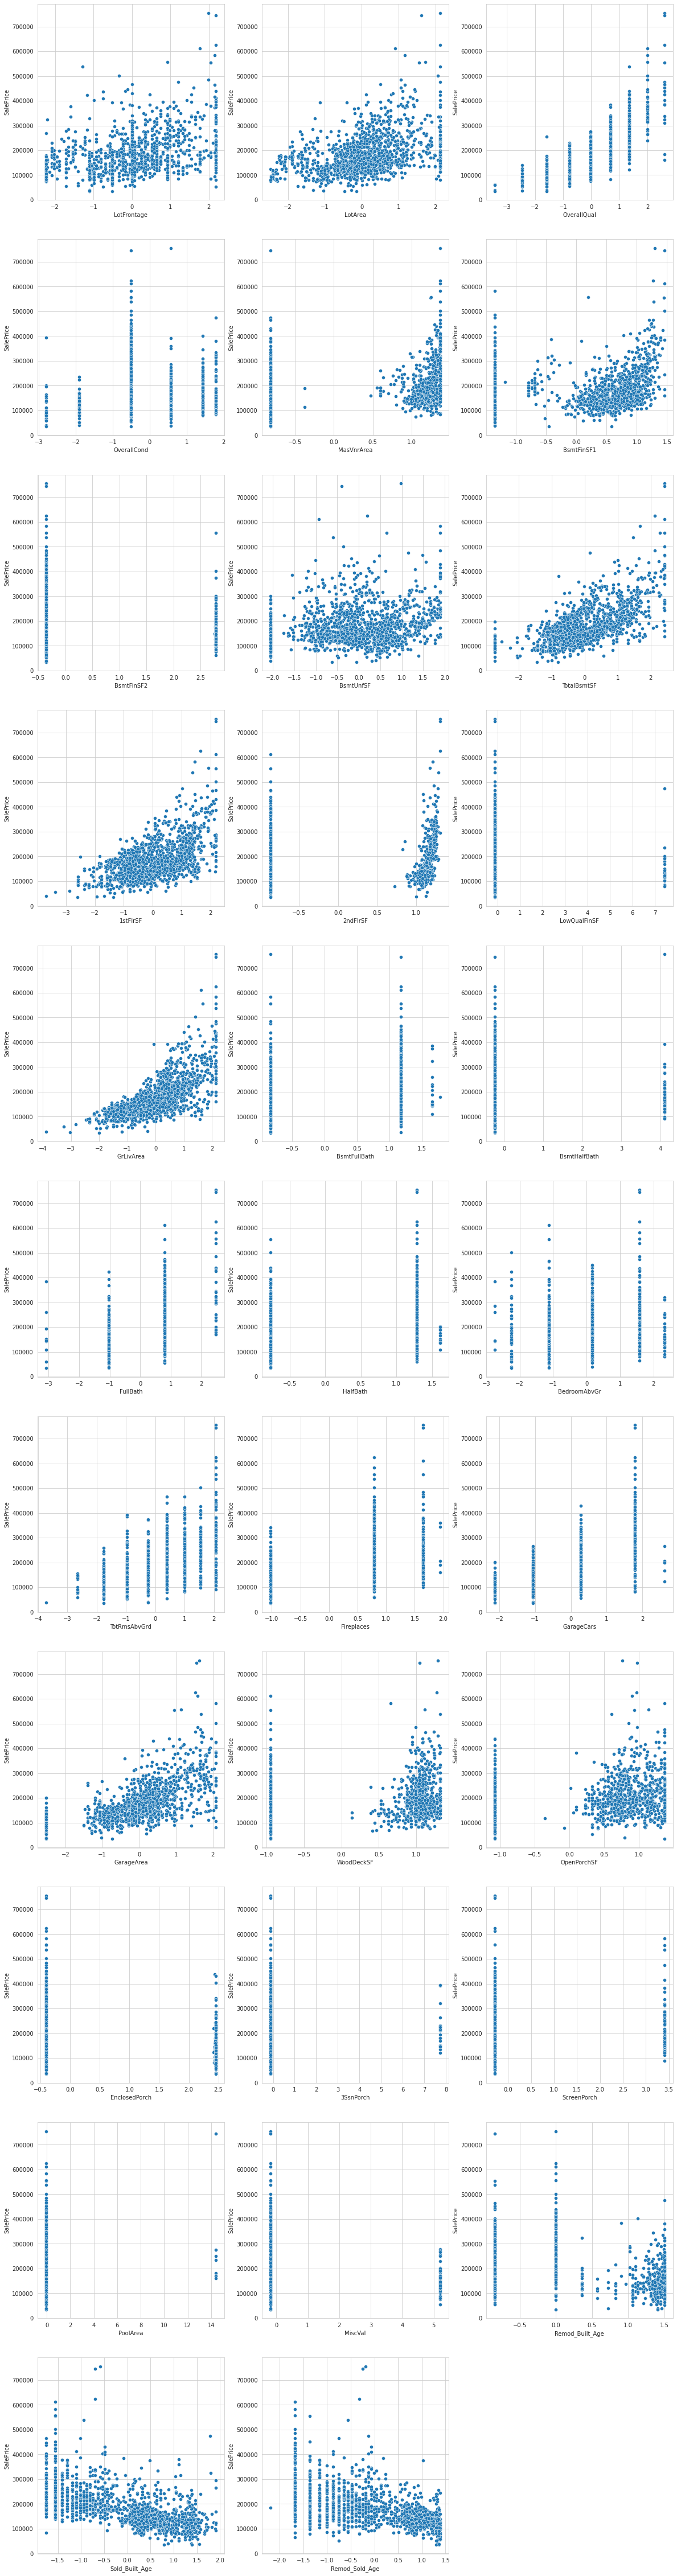

In [39]:
#  Scatterplot for numerical features

plt.figure(figsize=(20,90))
for i in range(len(num_feat)):
    plt.subplot(12, 3, i+1)
    sns.scatterplot(x=trans_df[num_feat[i]], y=target)

plt.show()

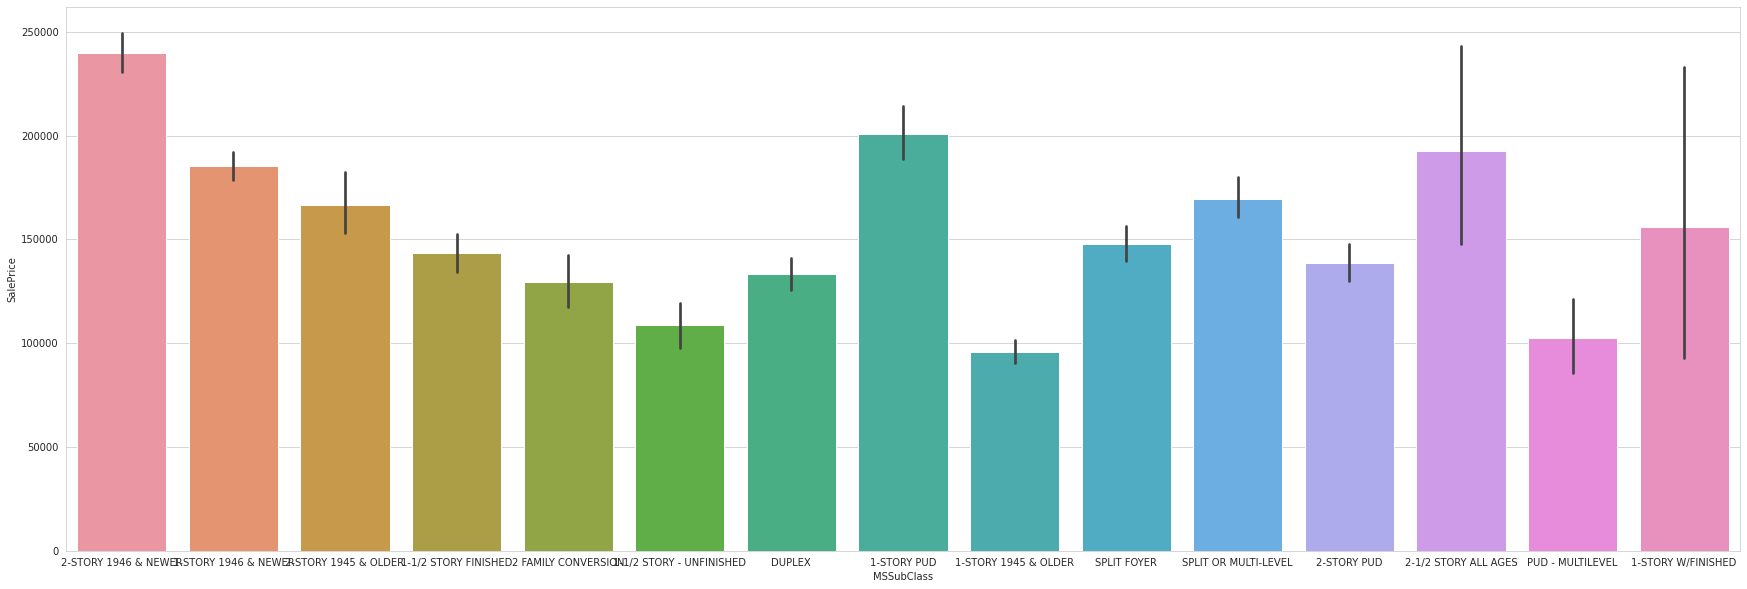

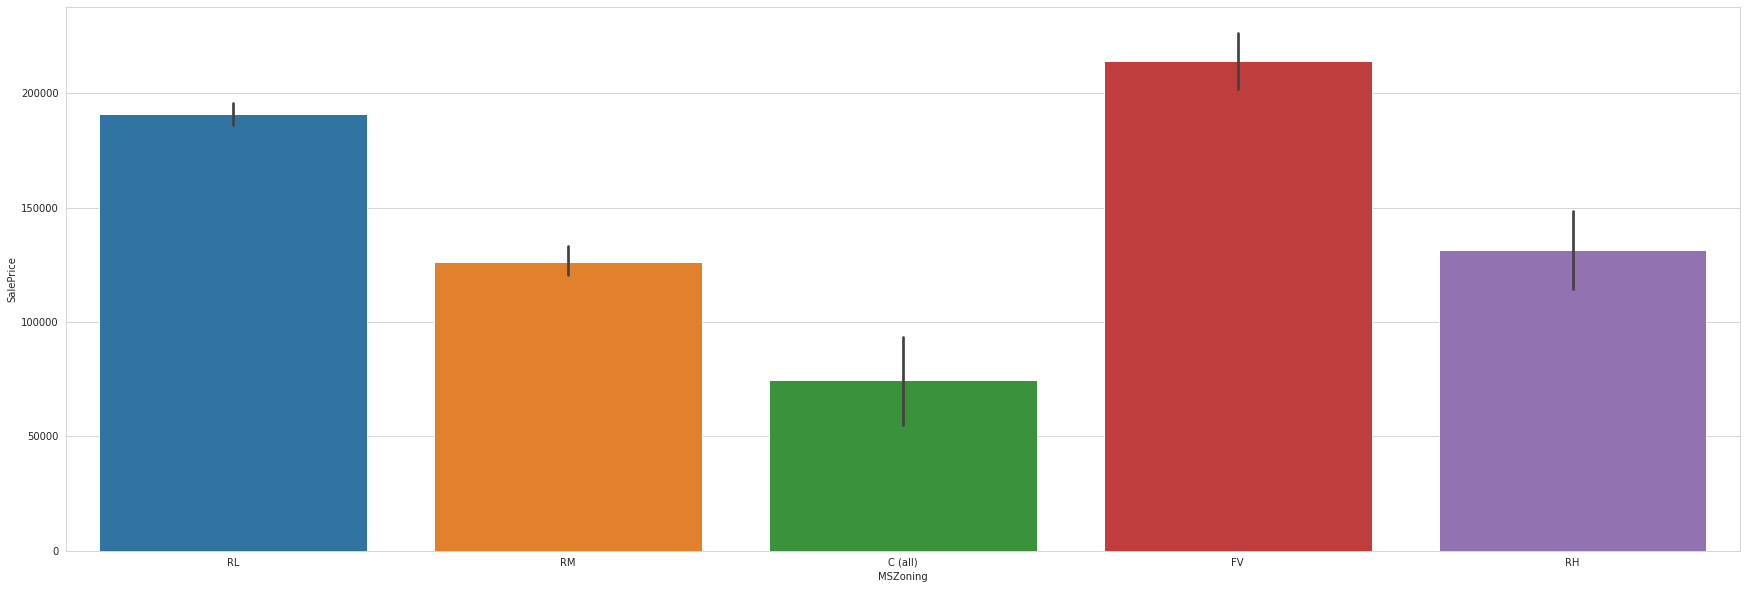

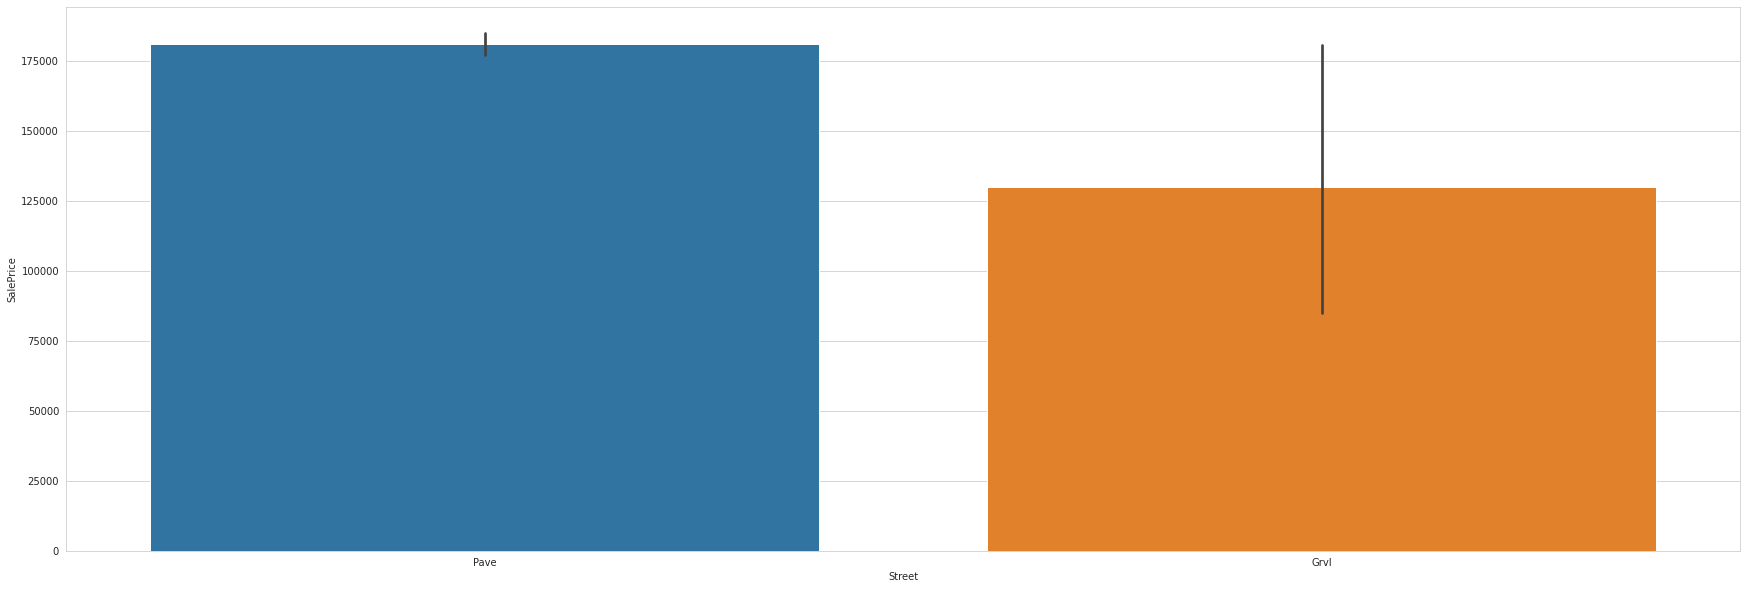

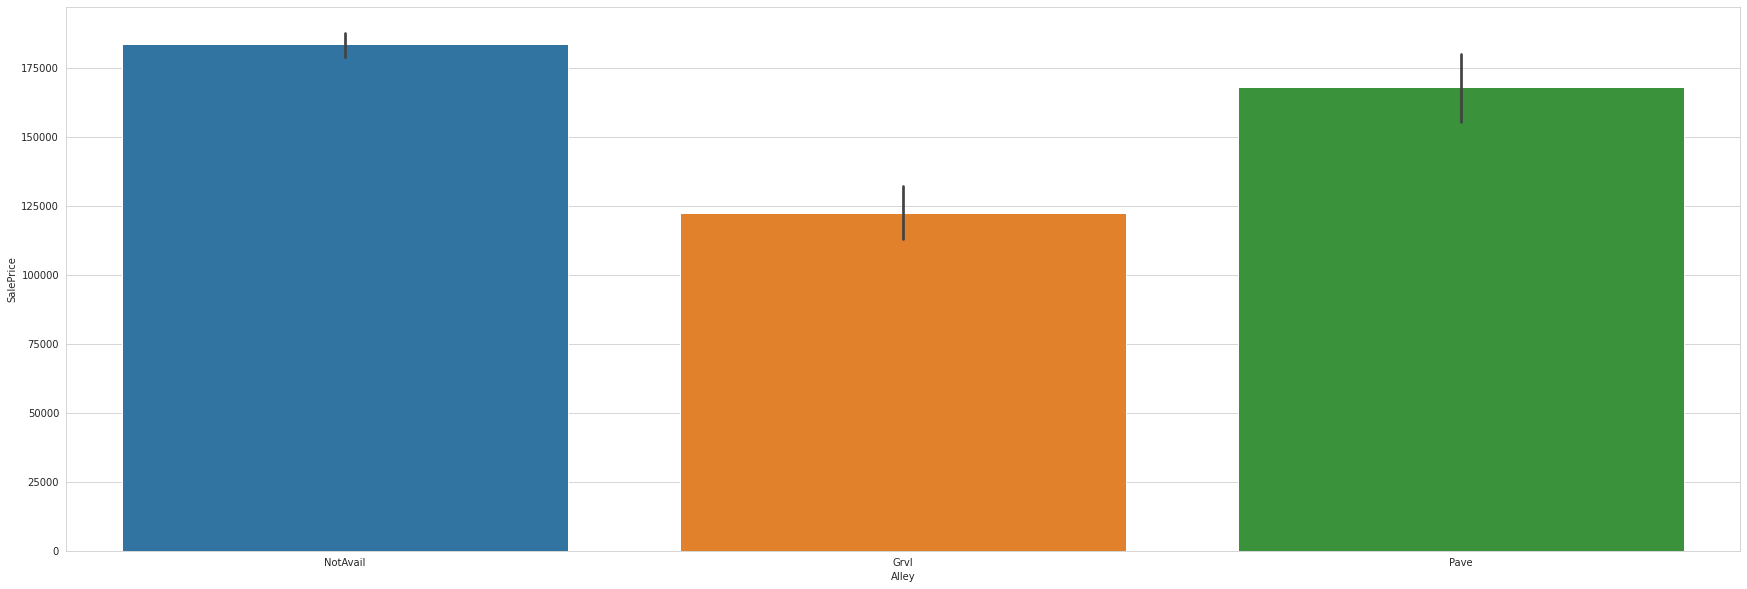

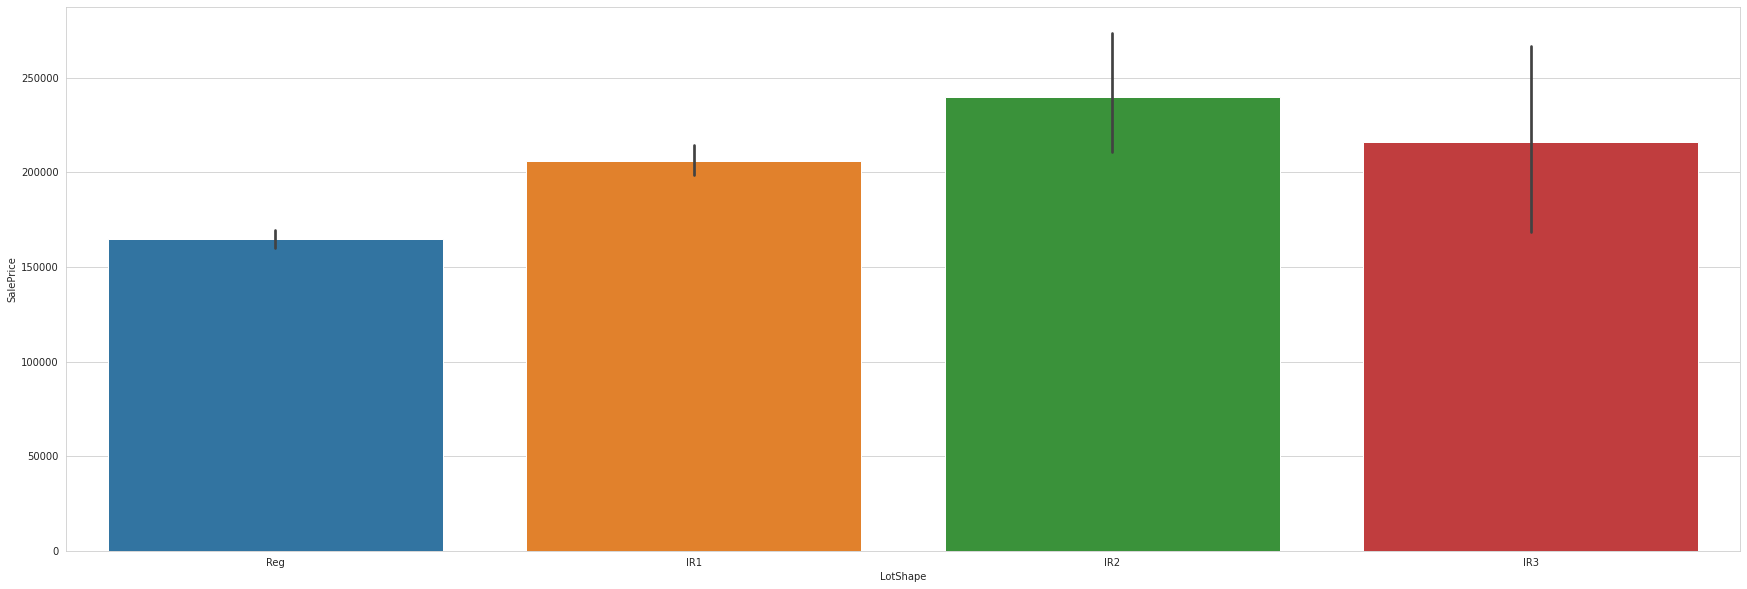

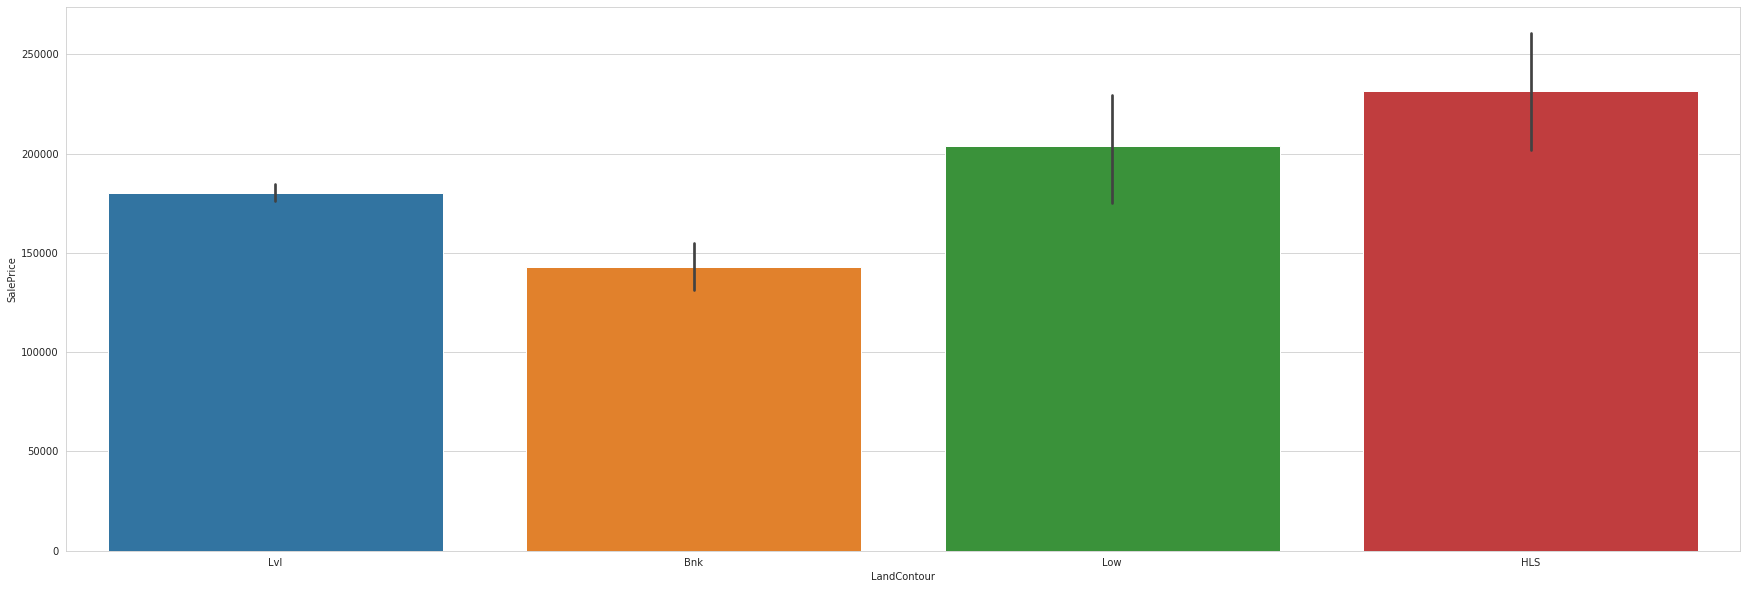

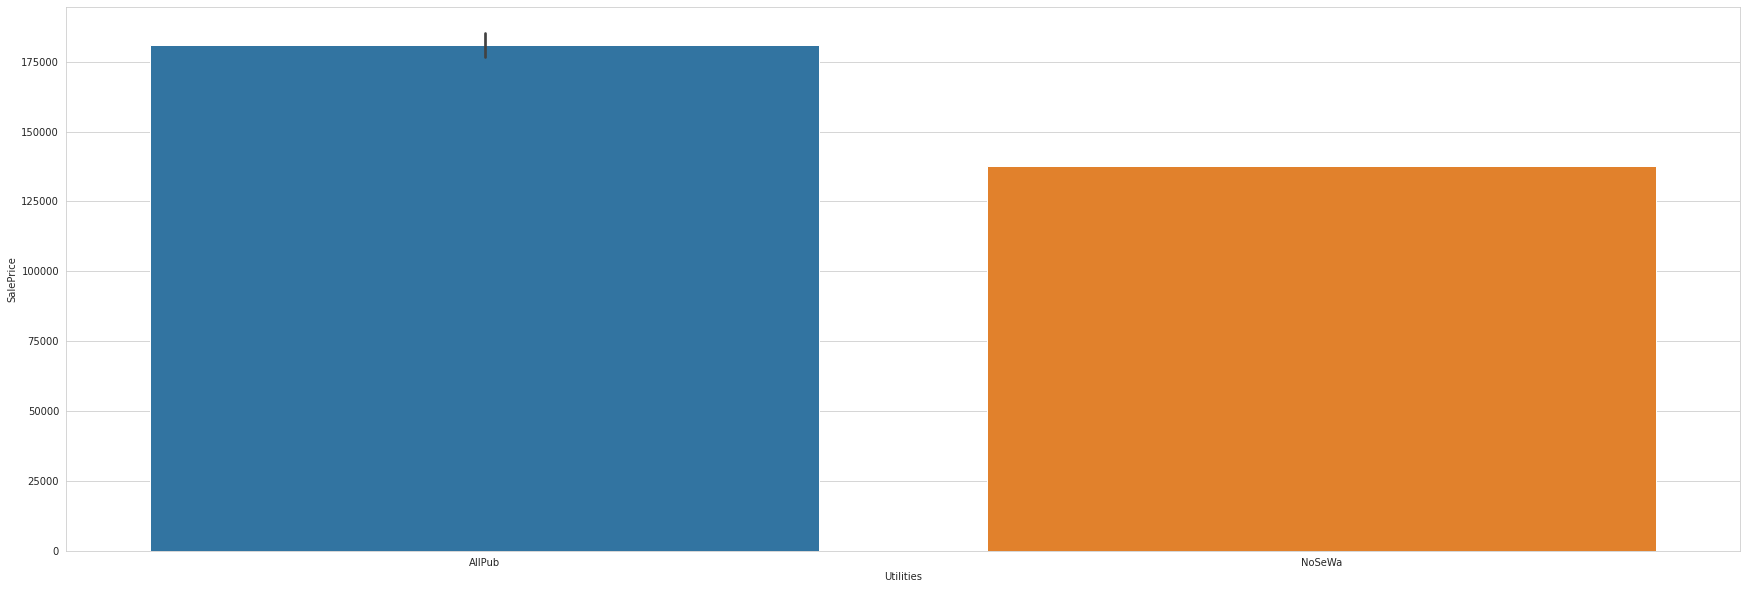

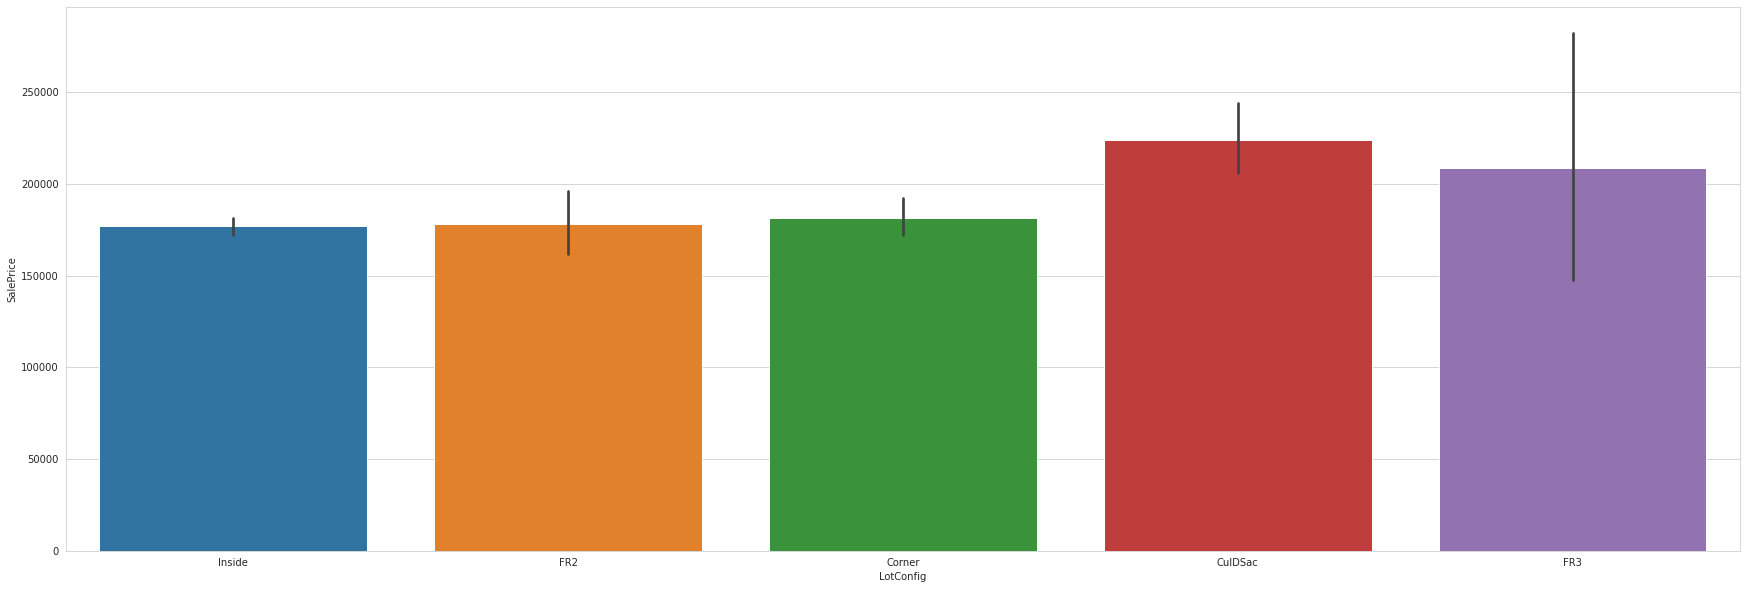

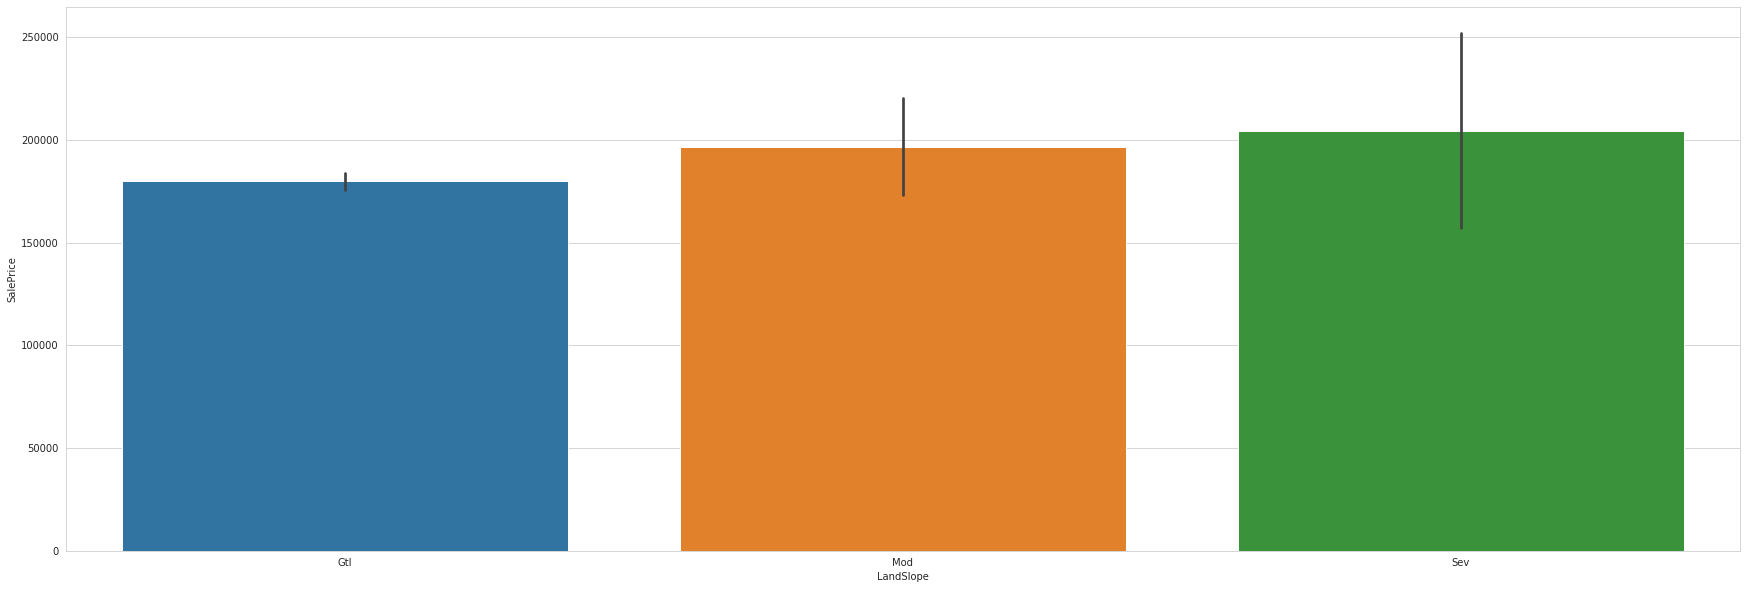

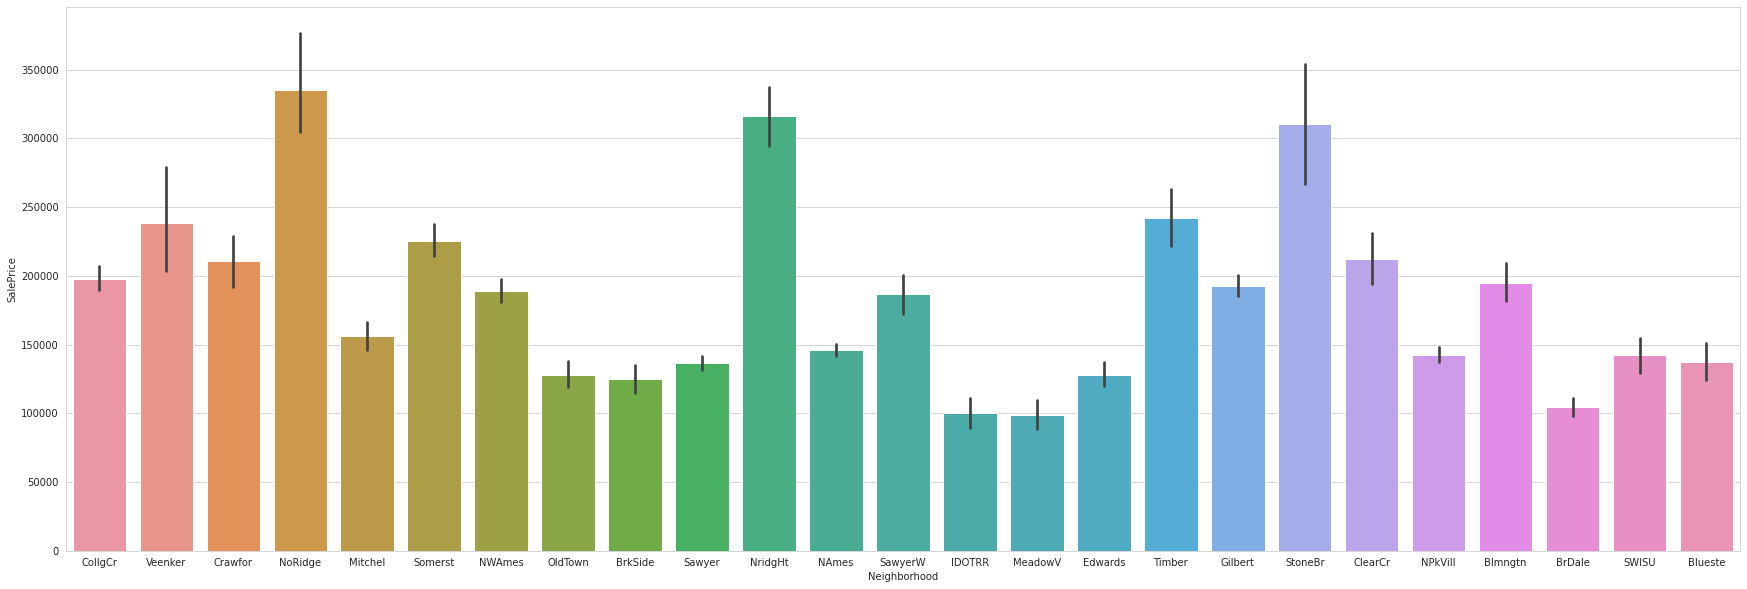

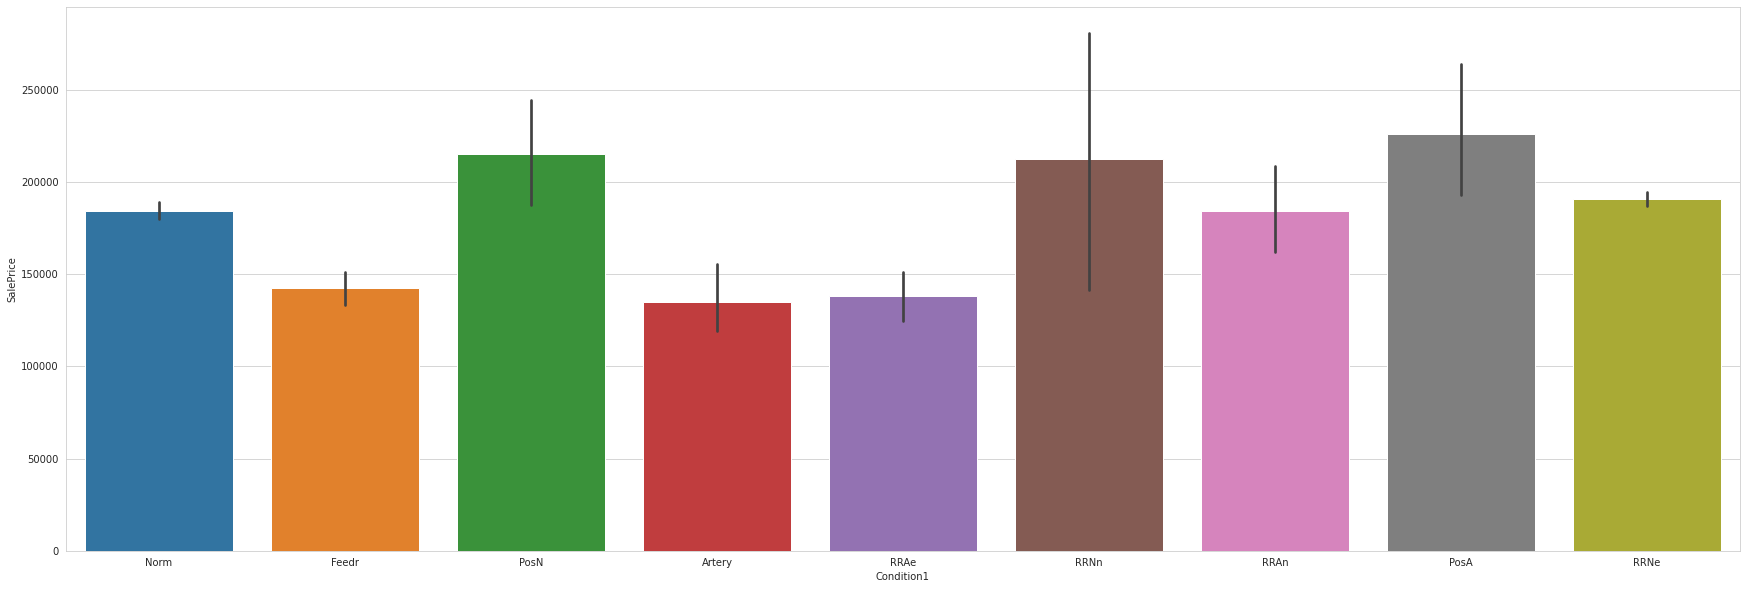

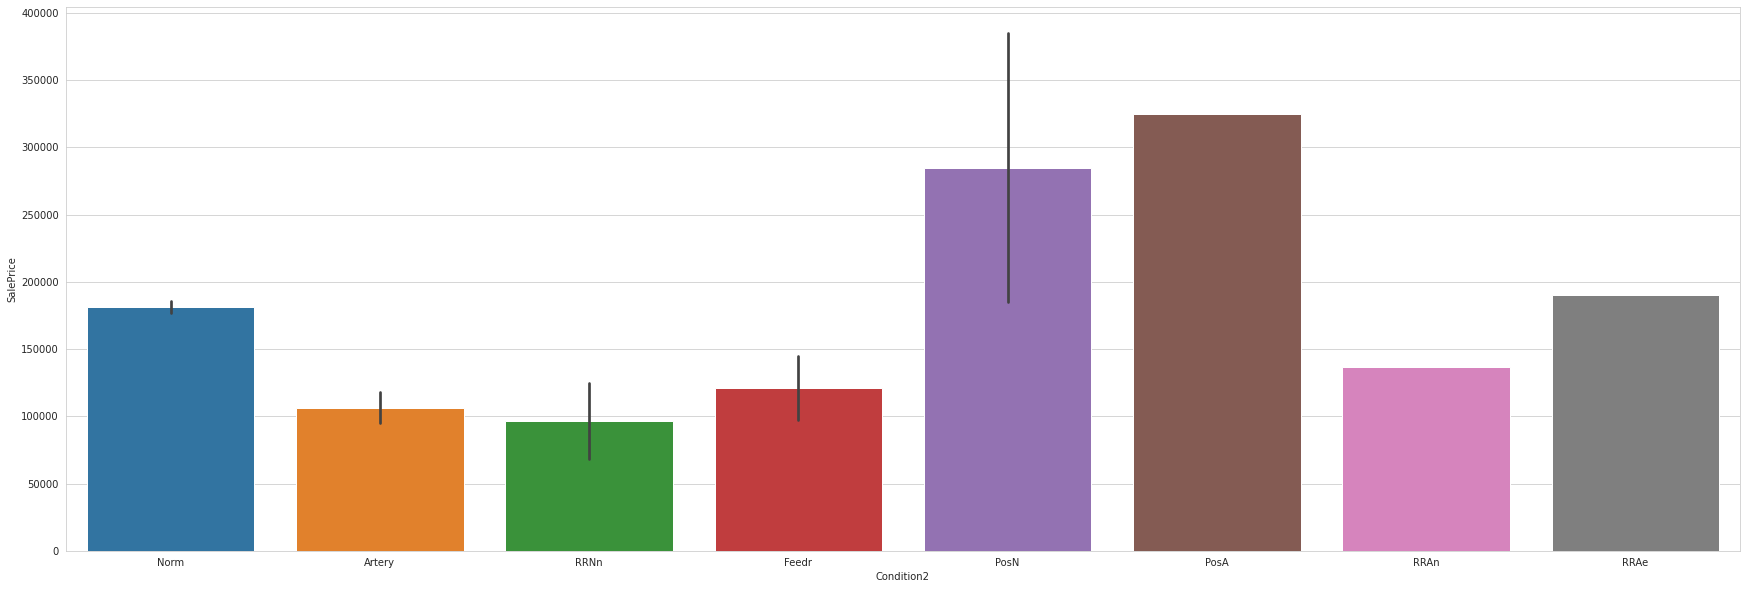

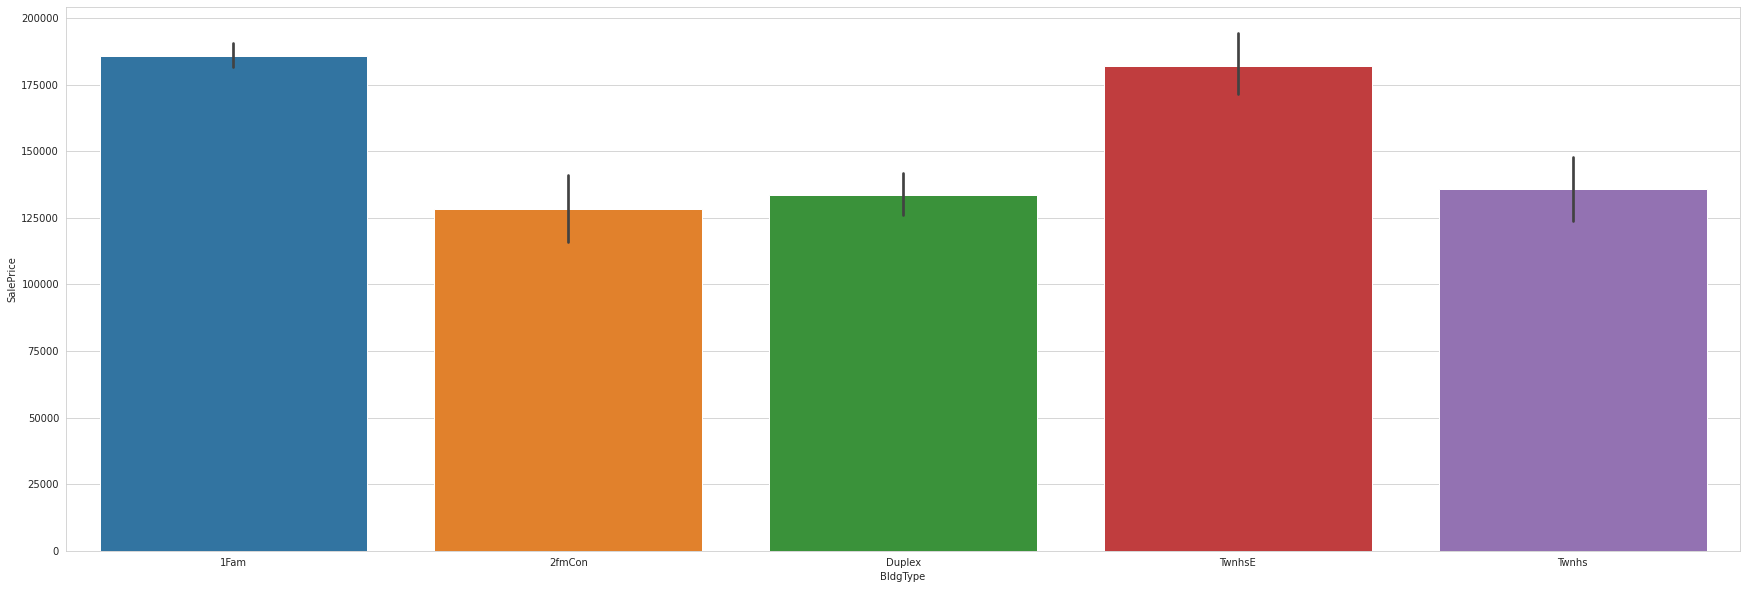

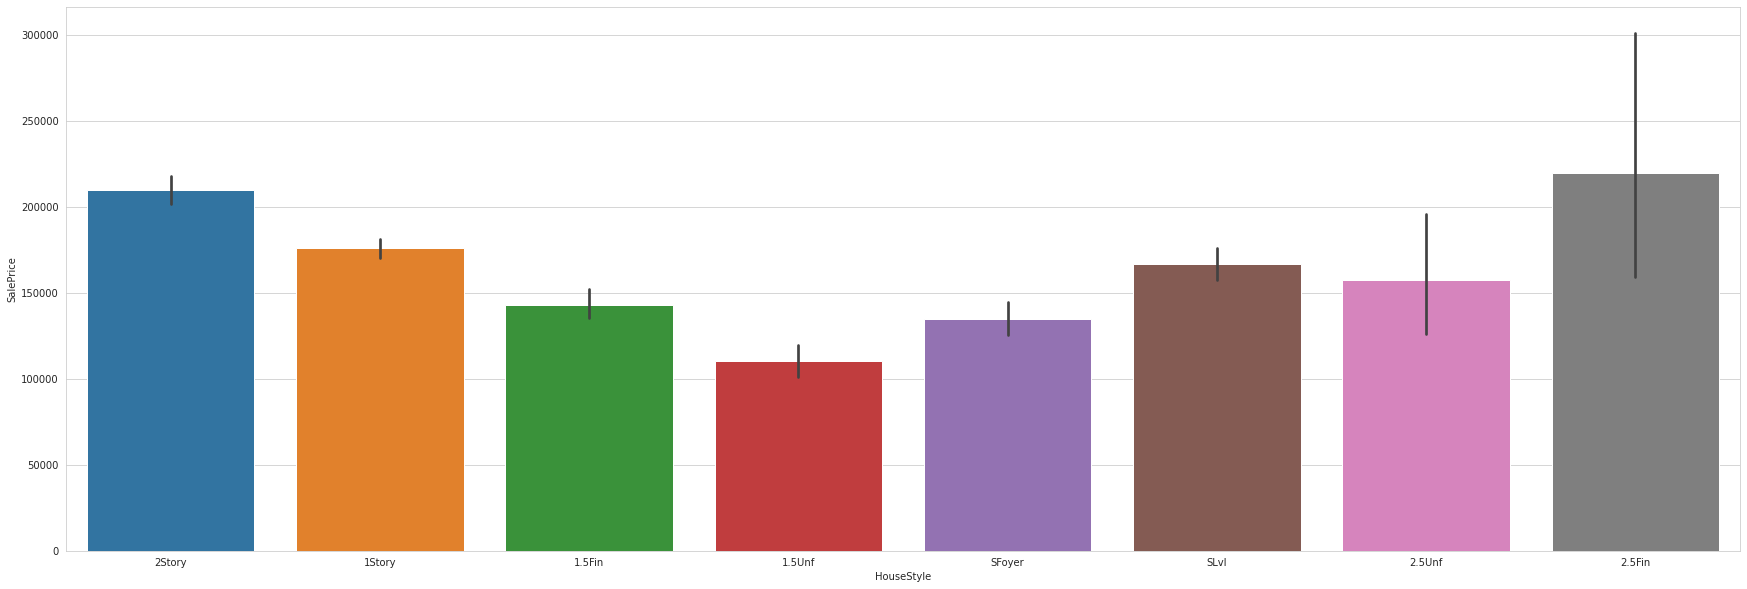

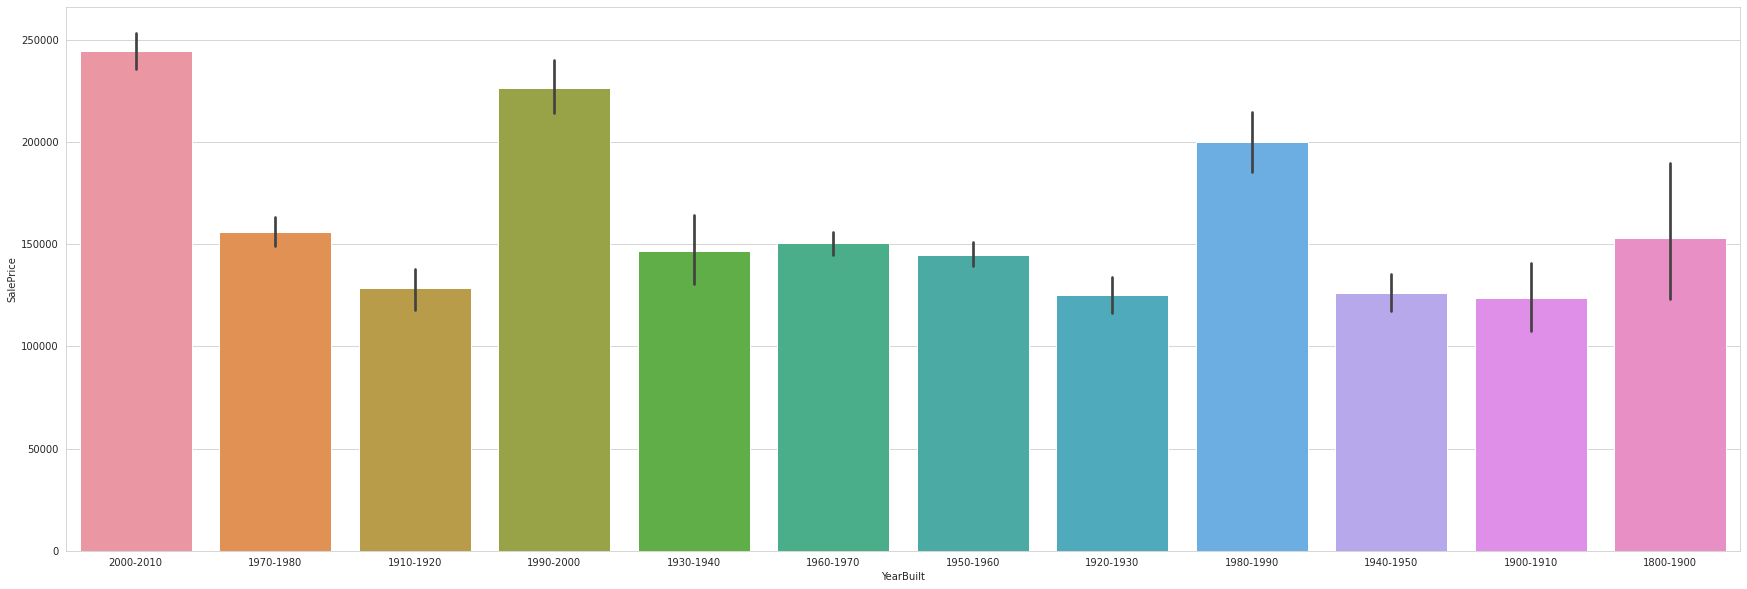

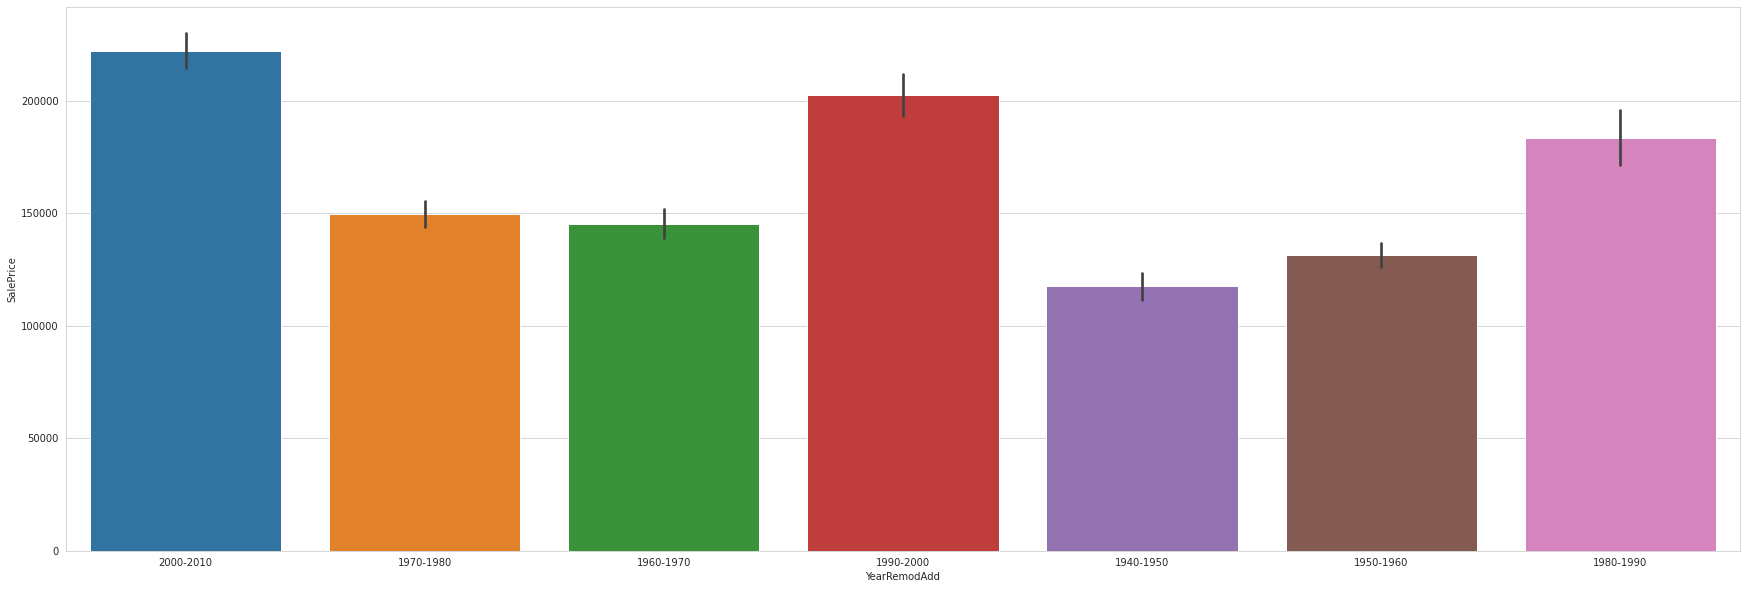

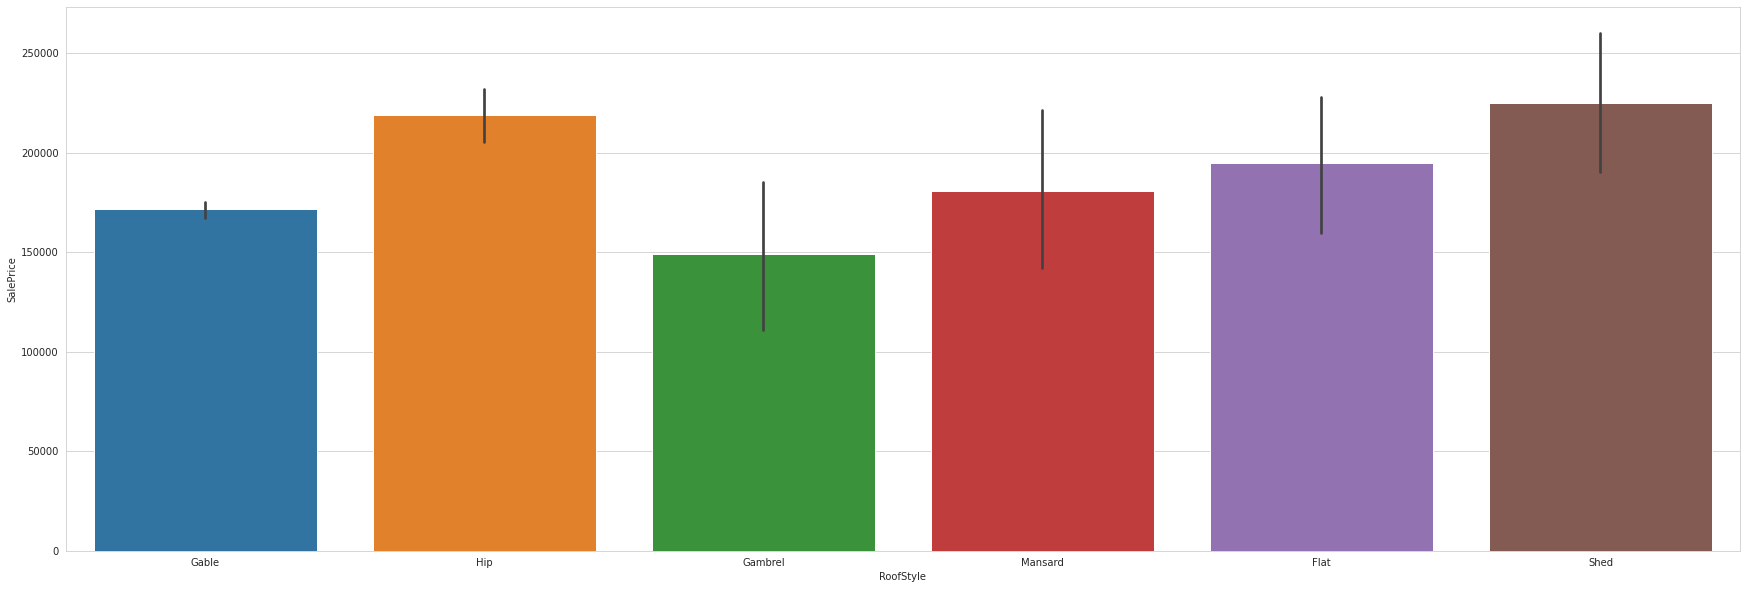

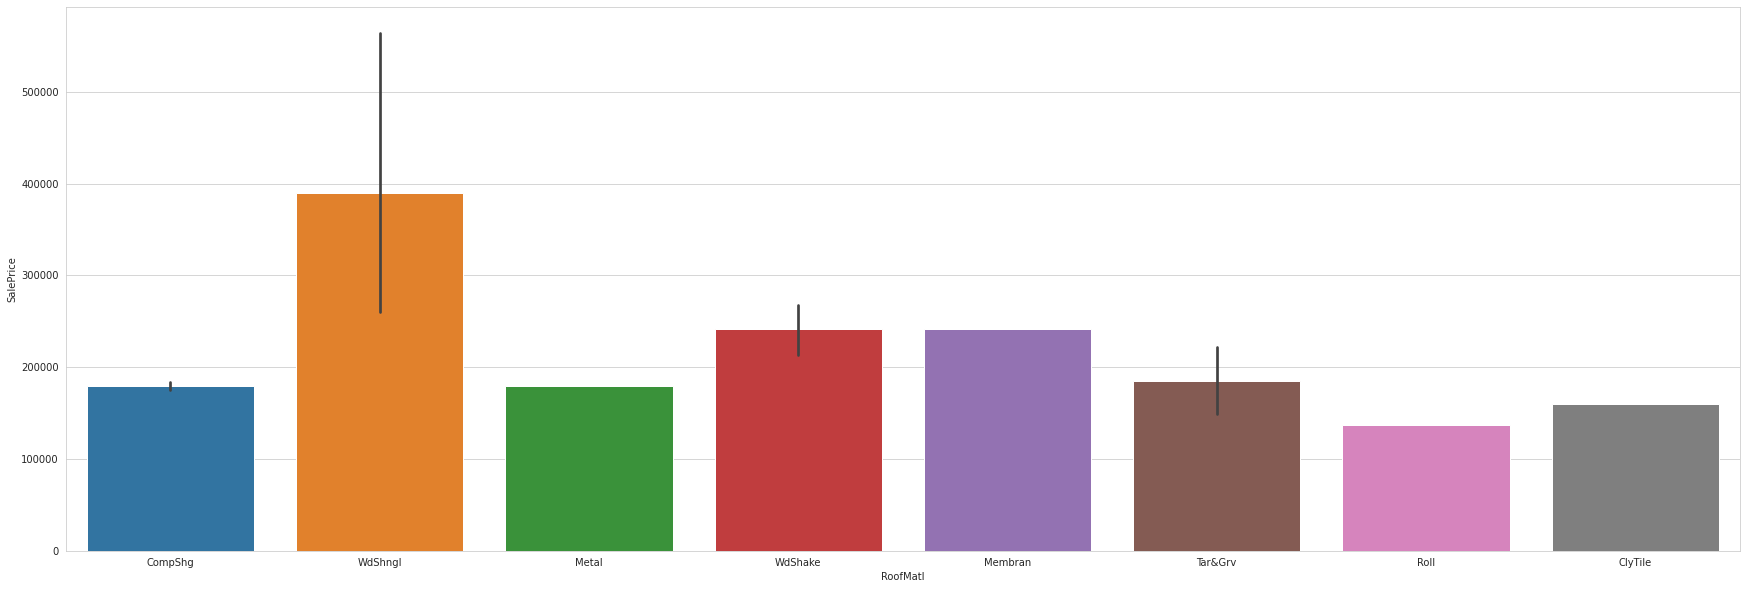

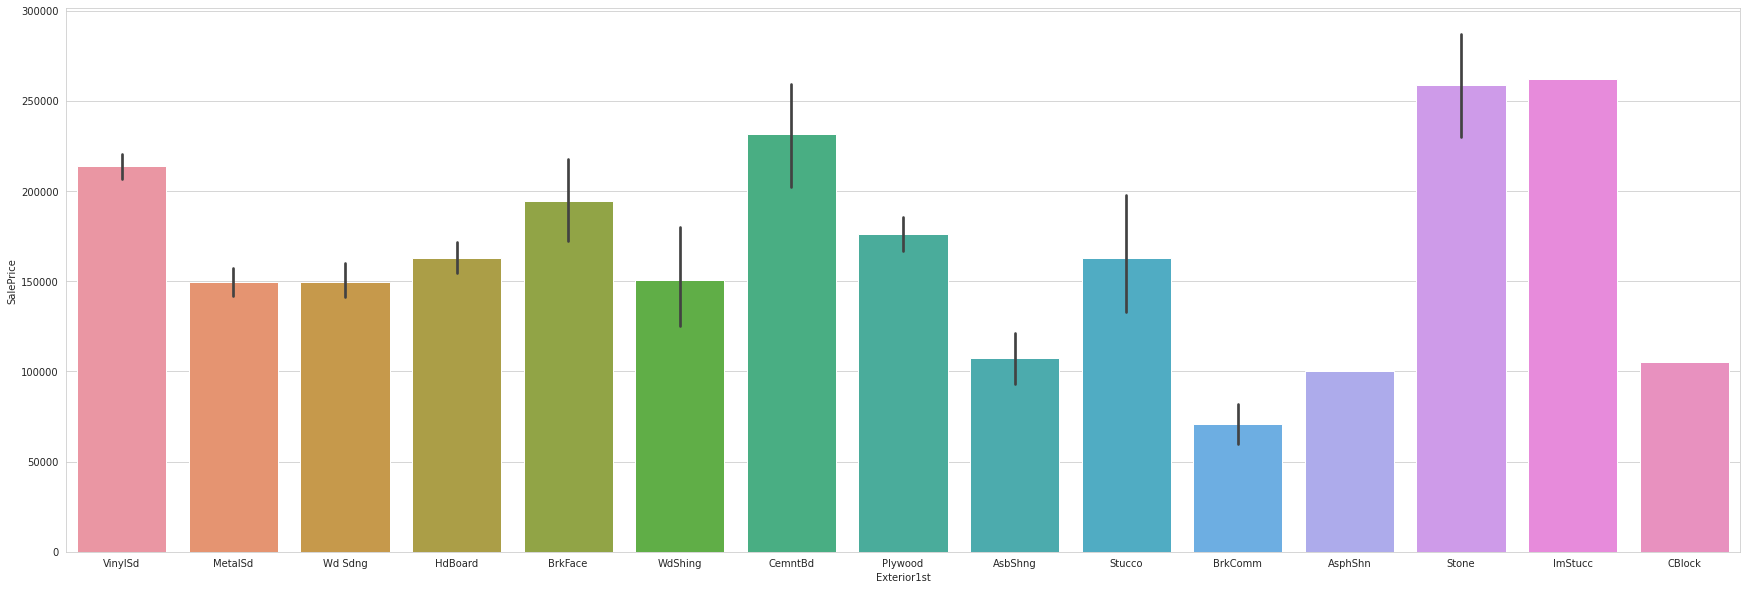

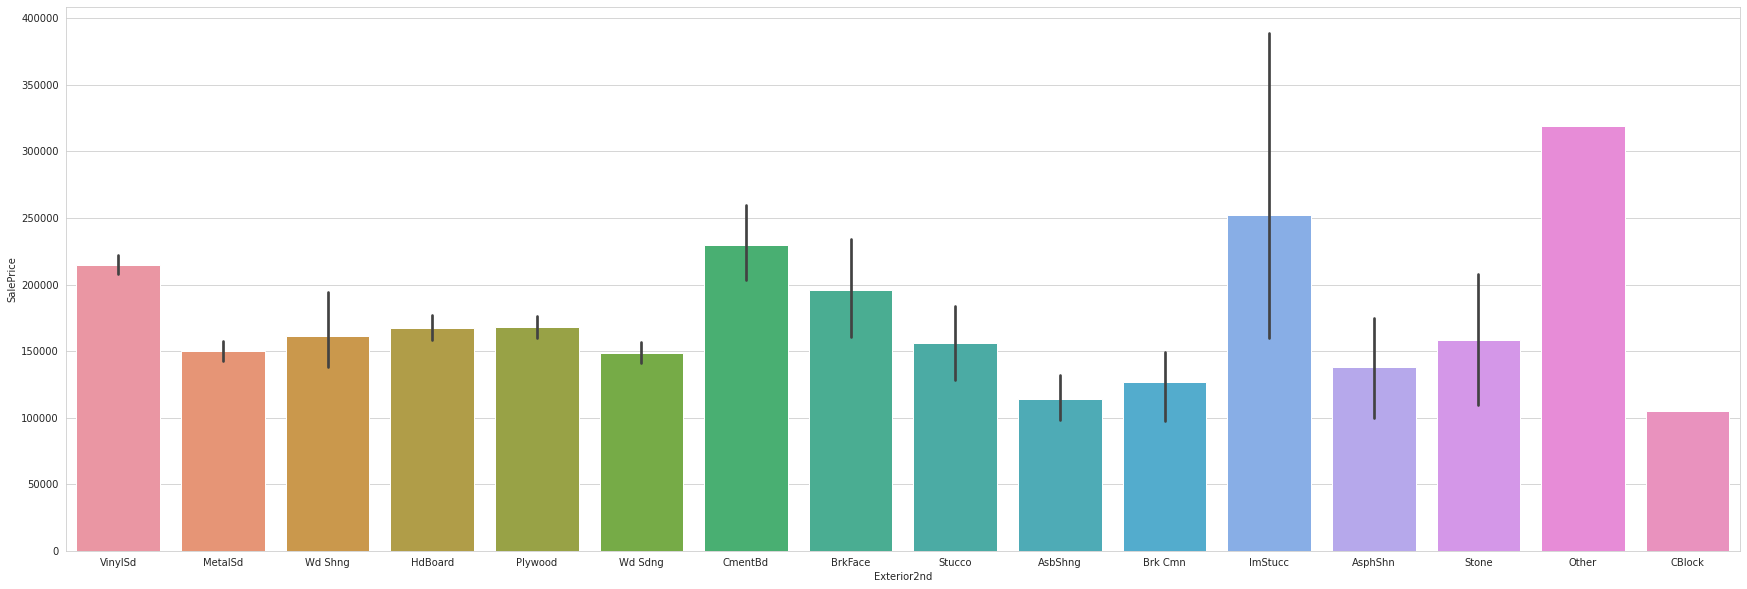

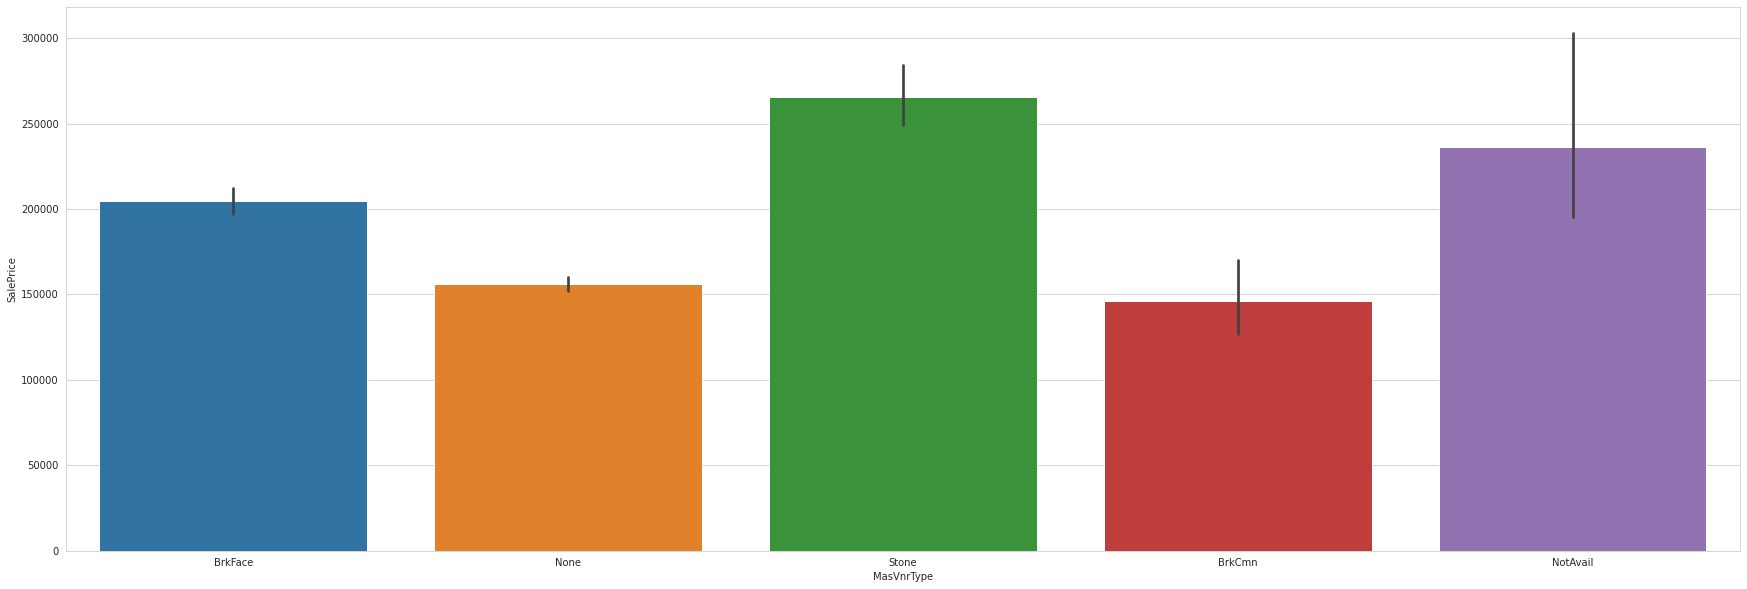

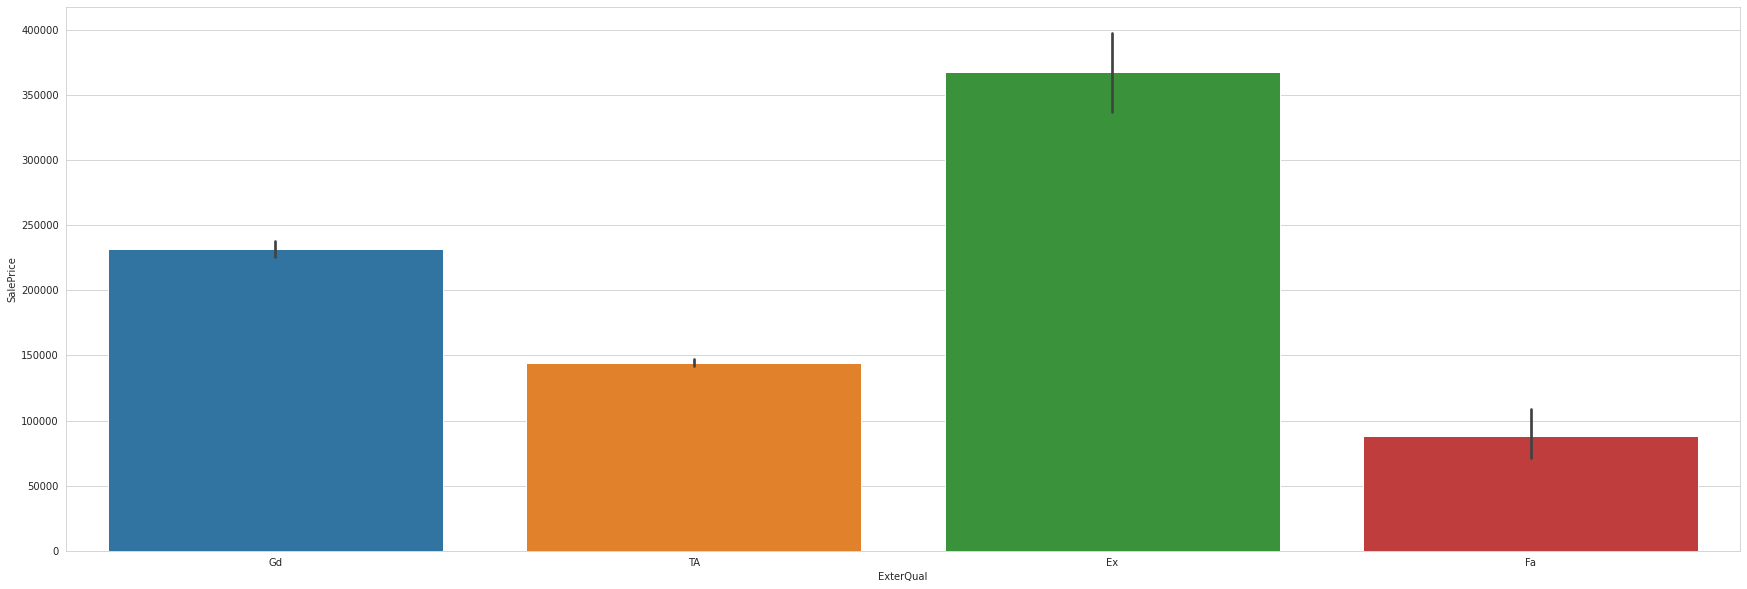

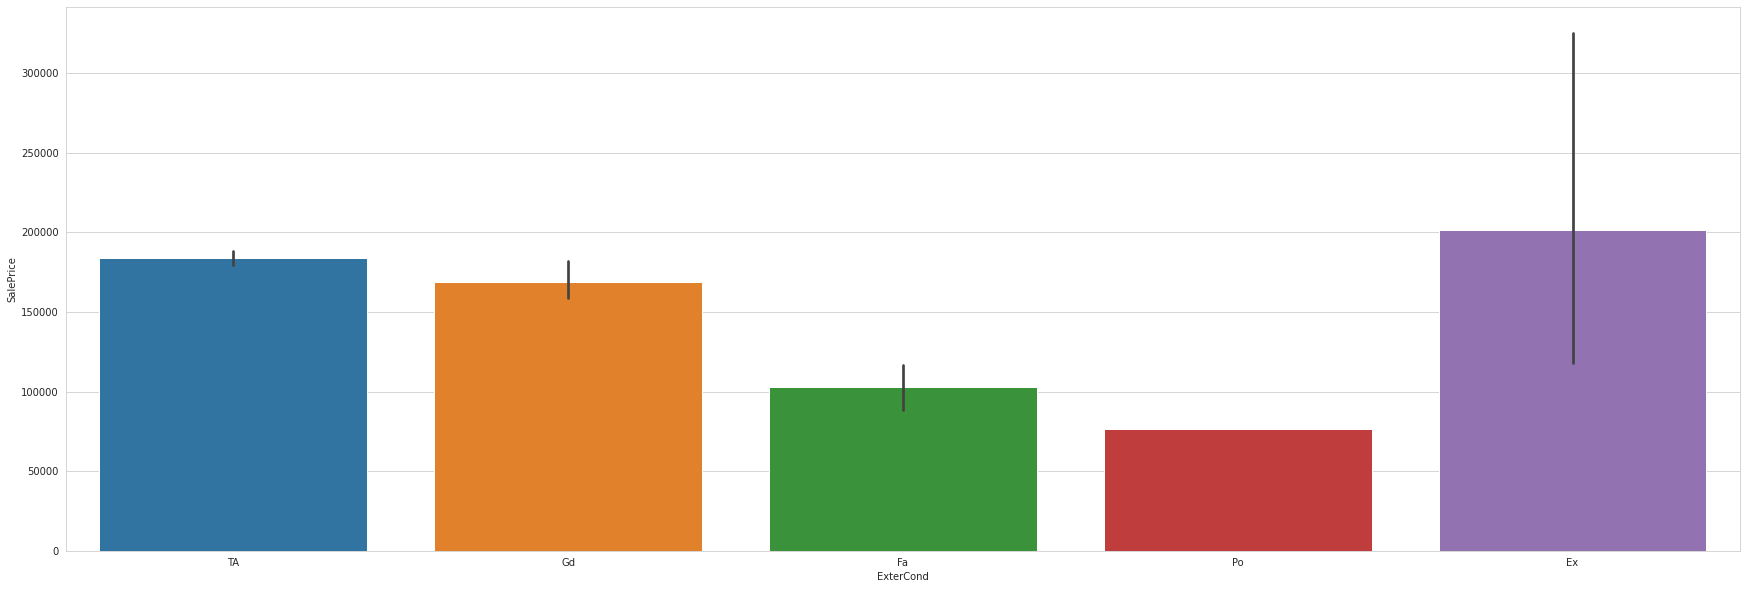

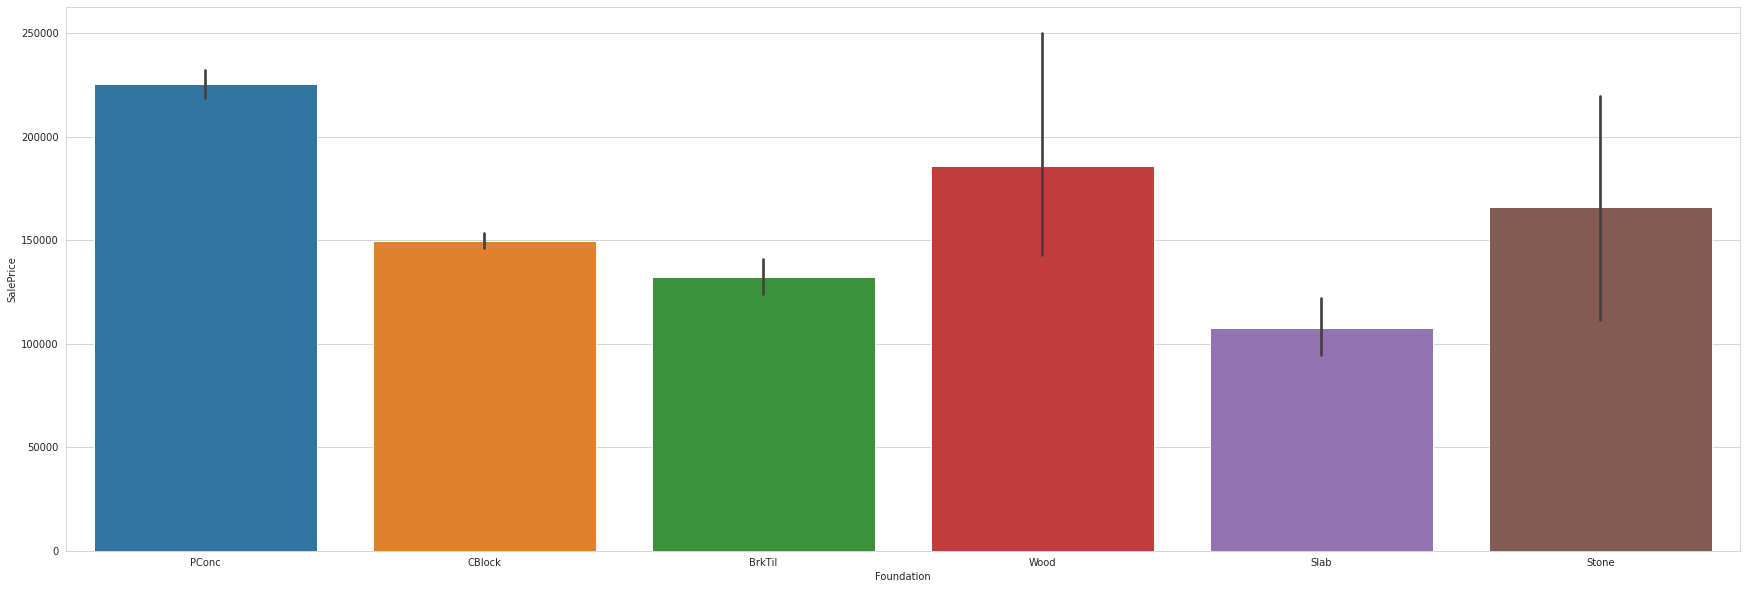

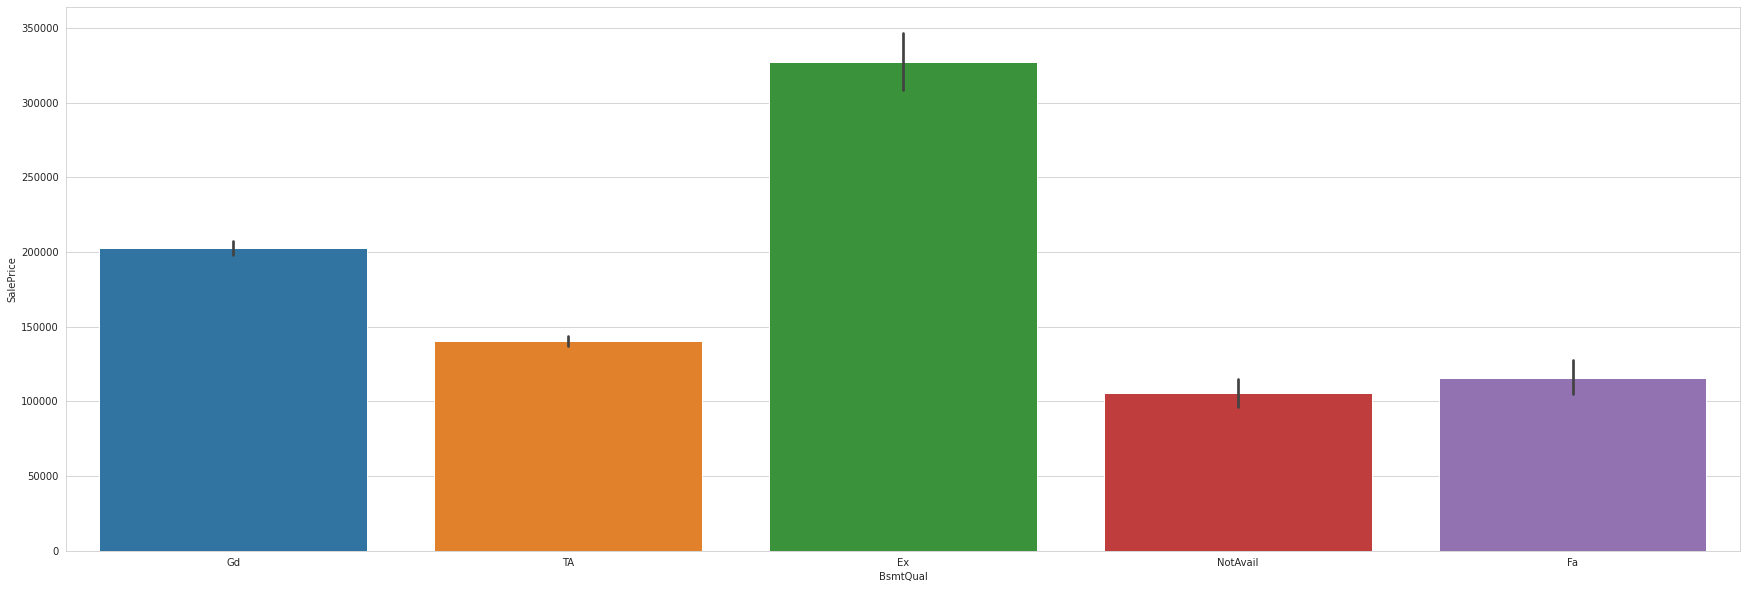

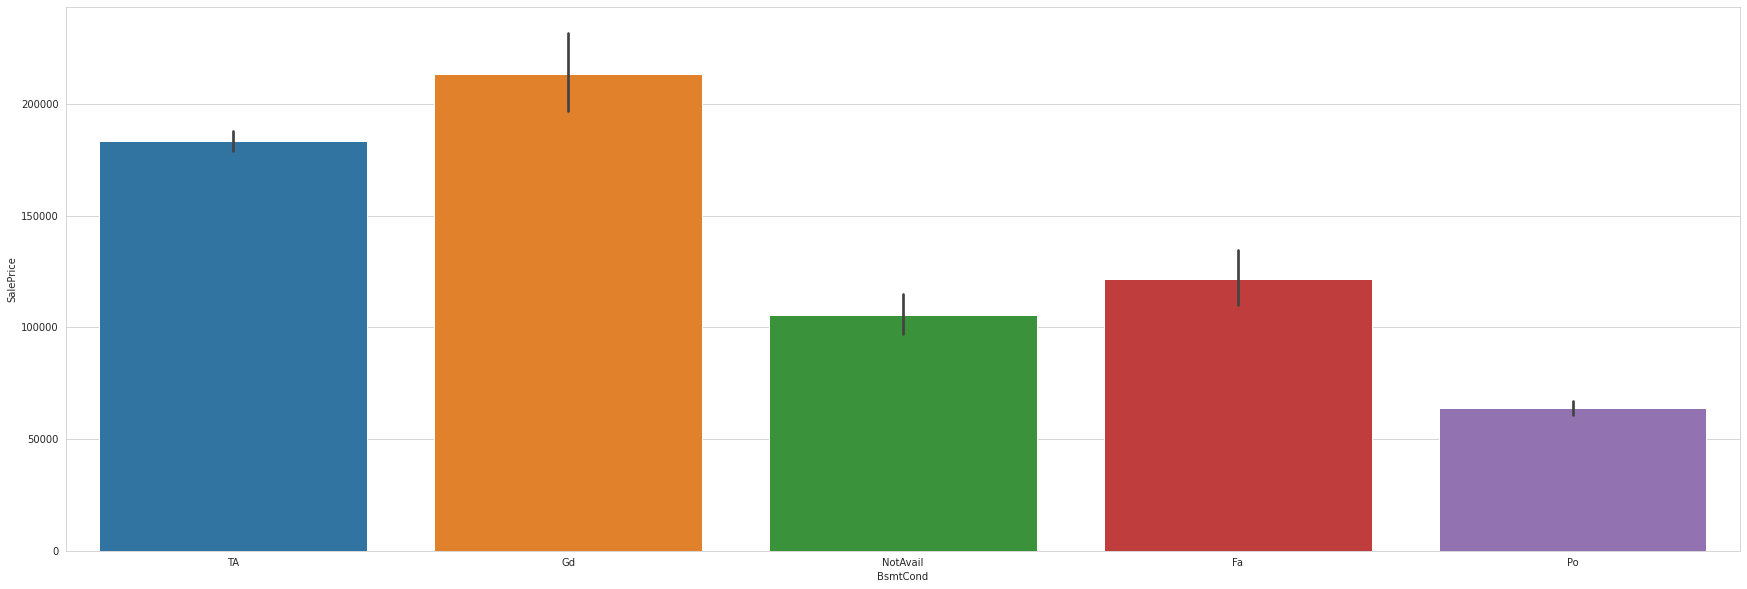

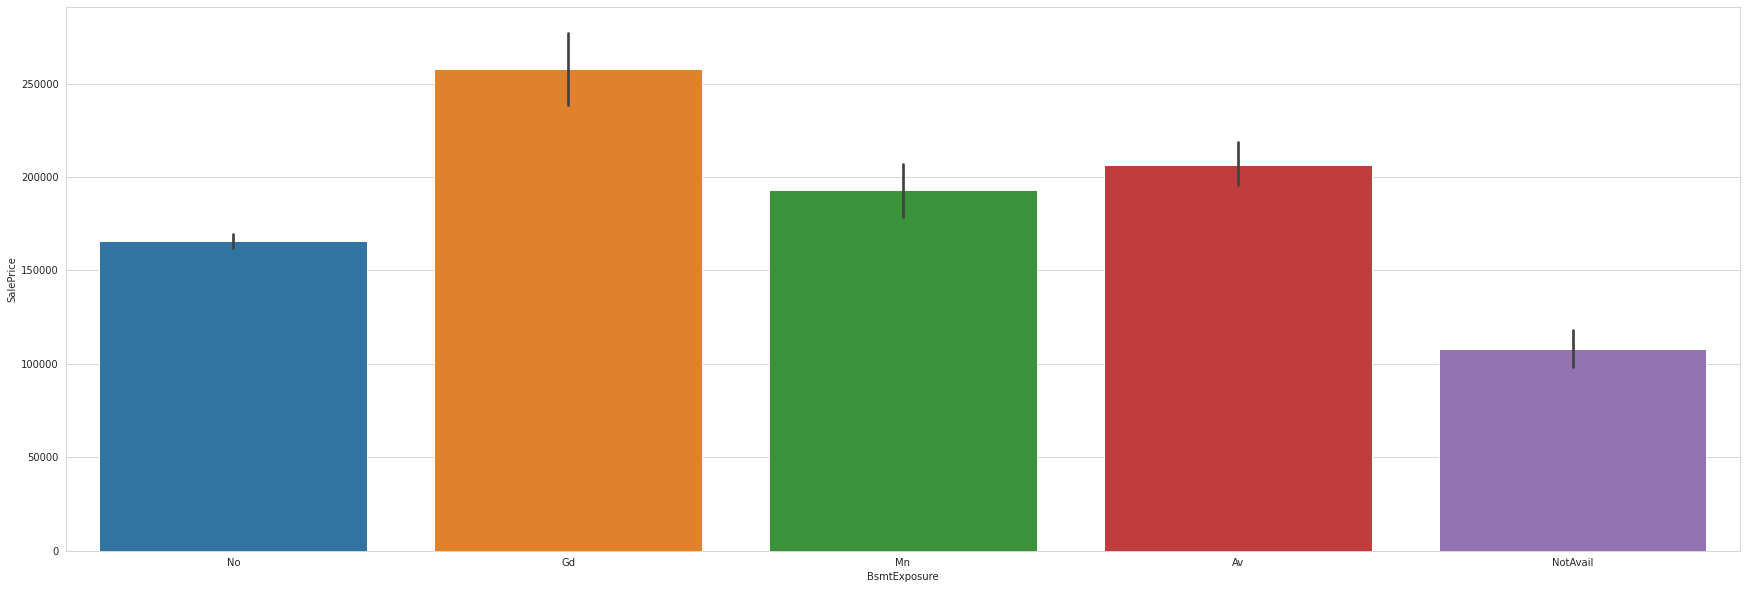

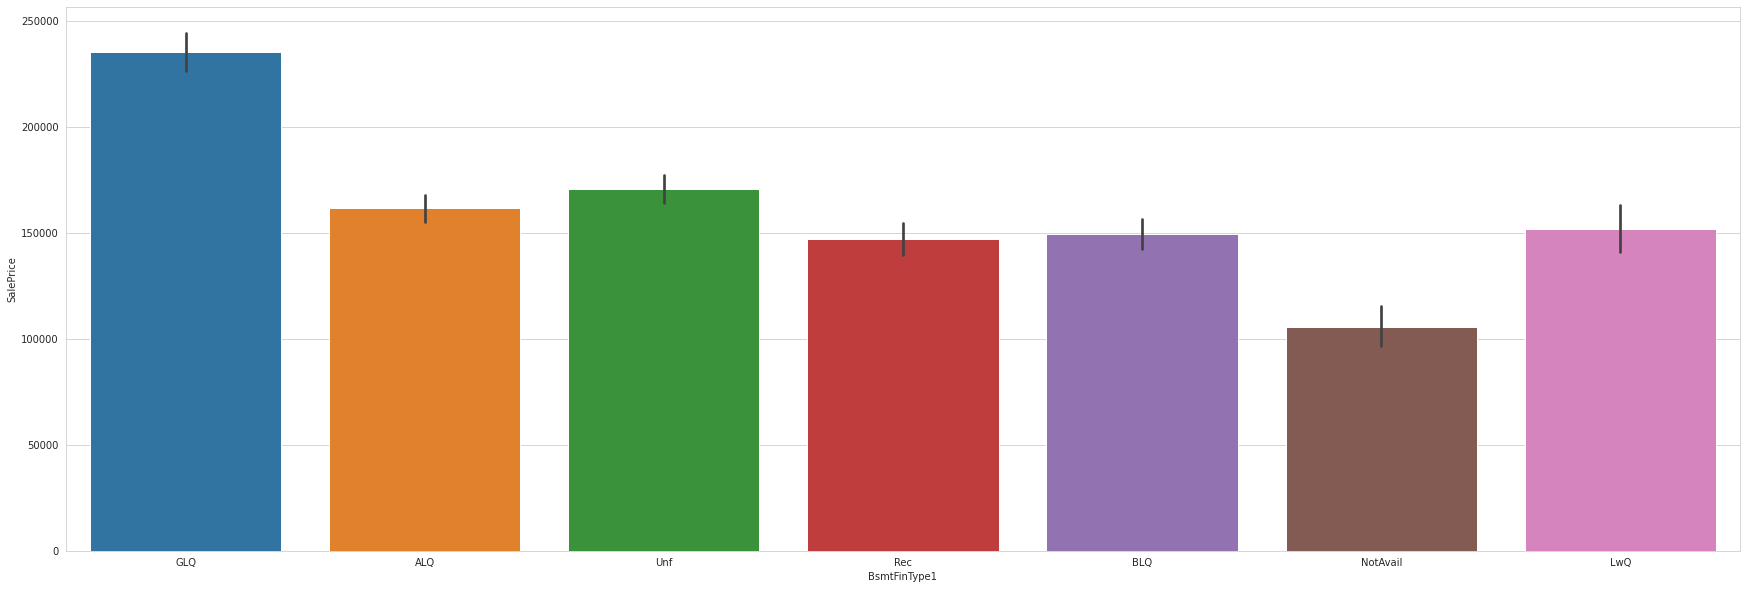

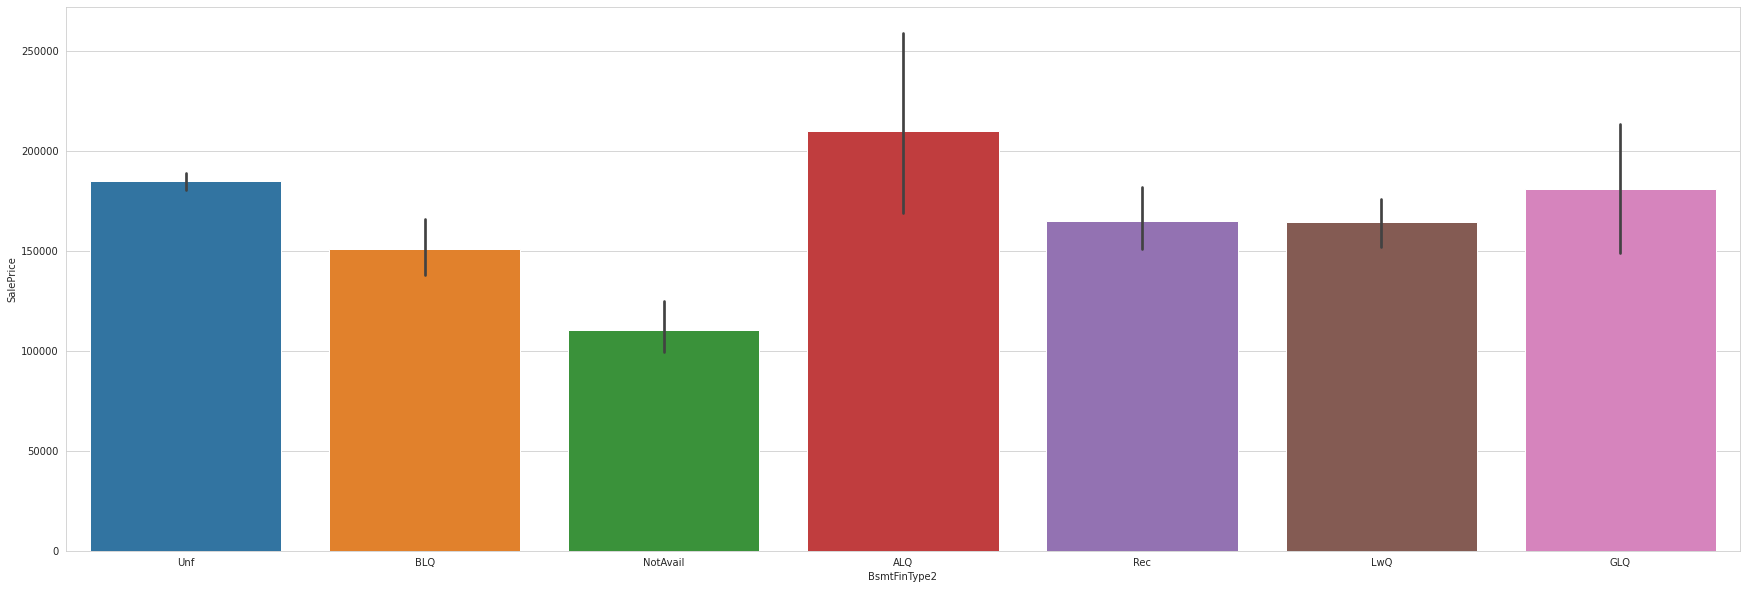

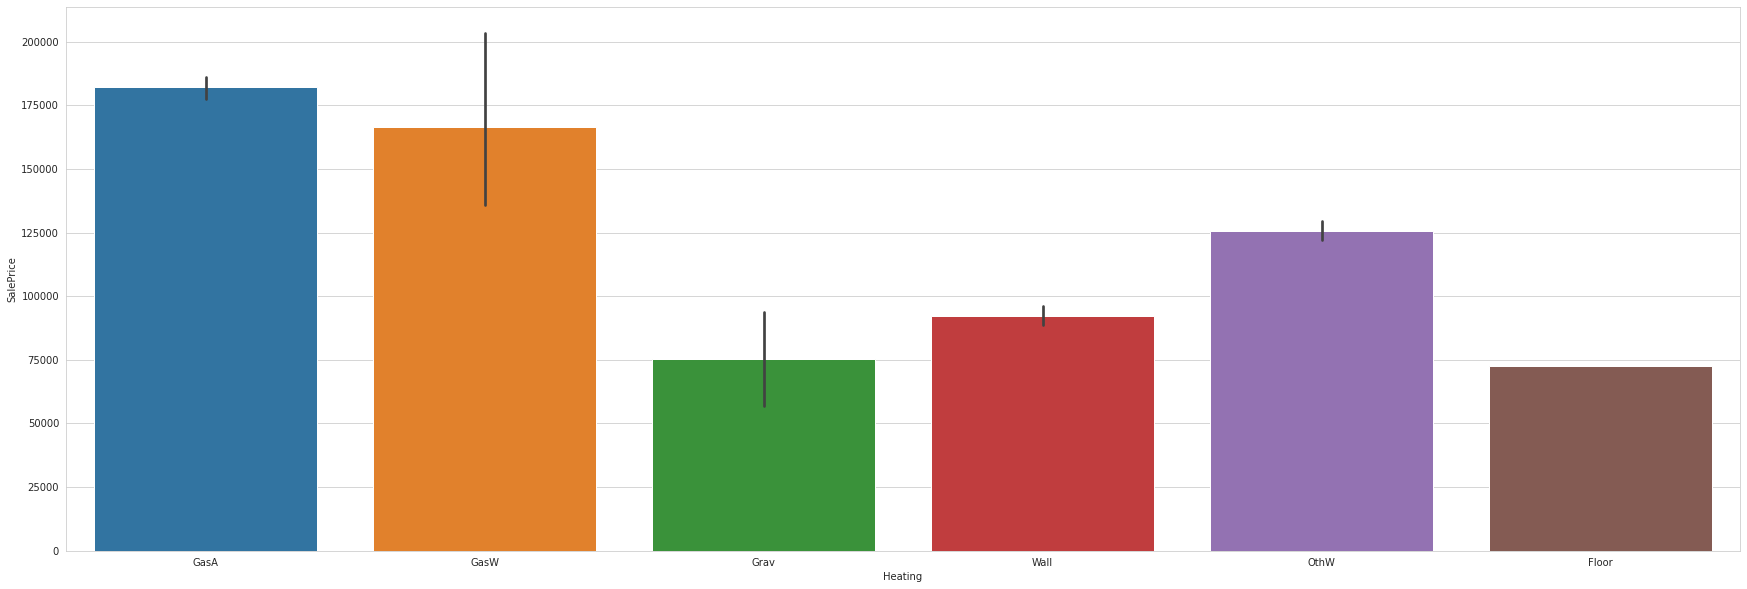

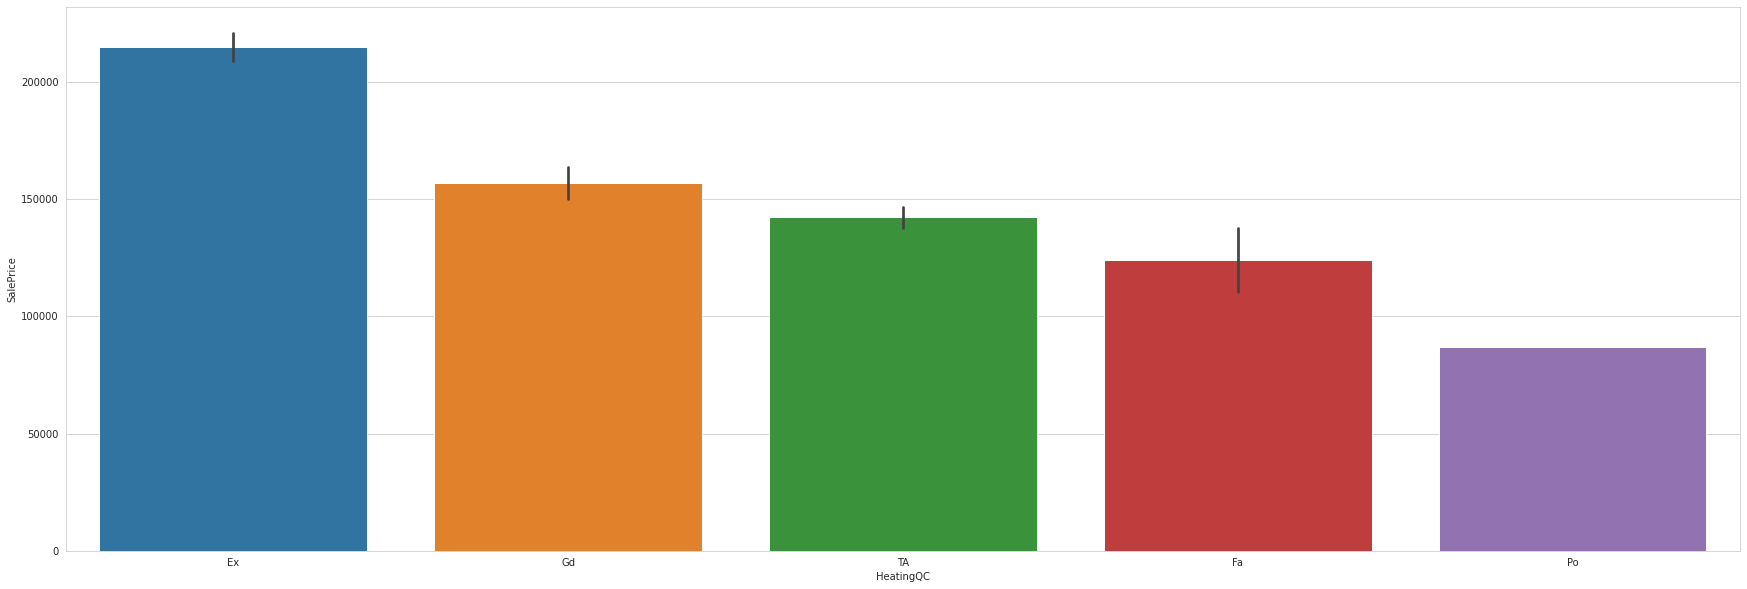

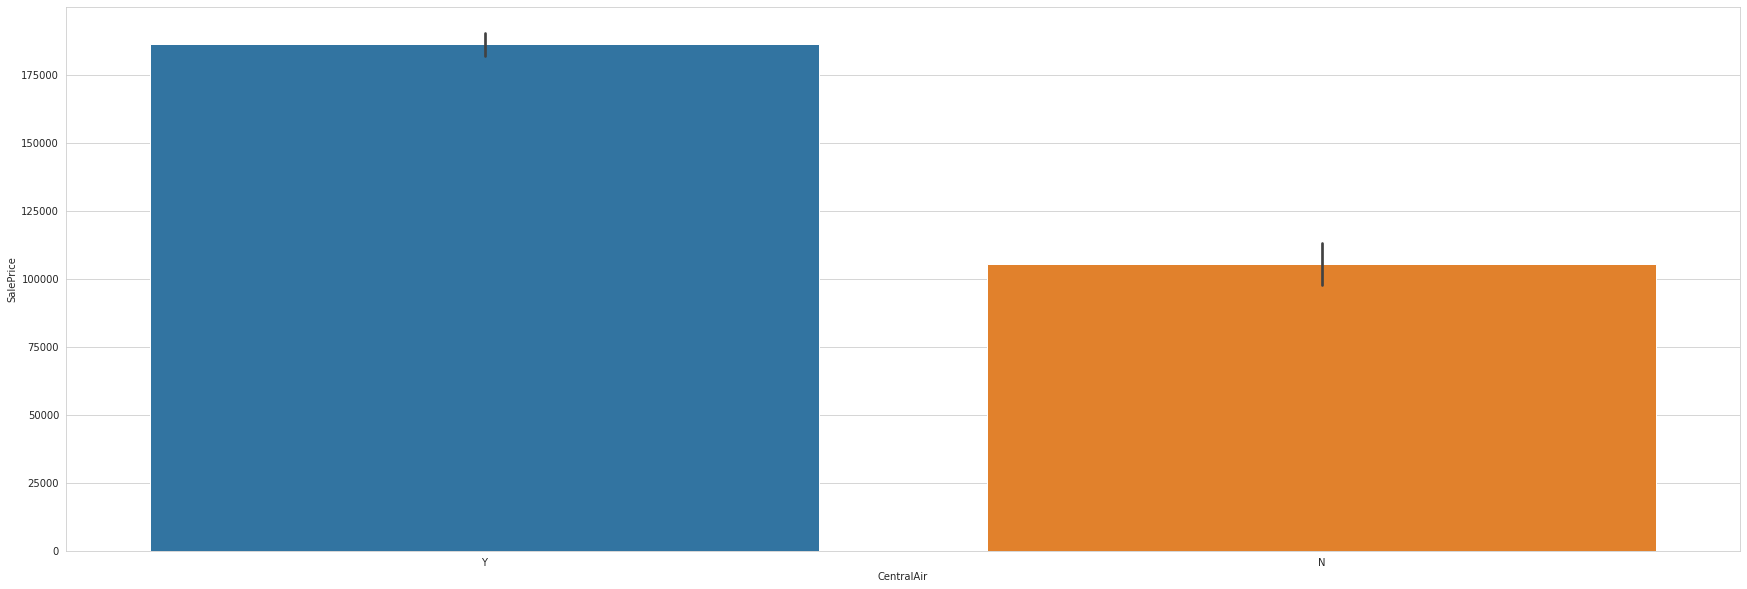

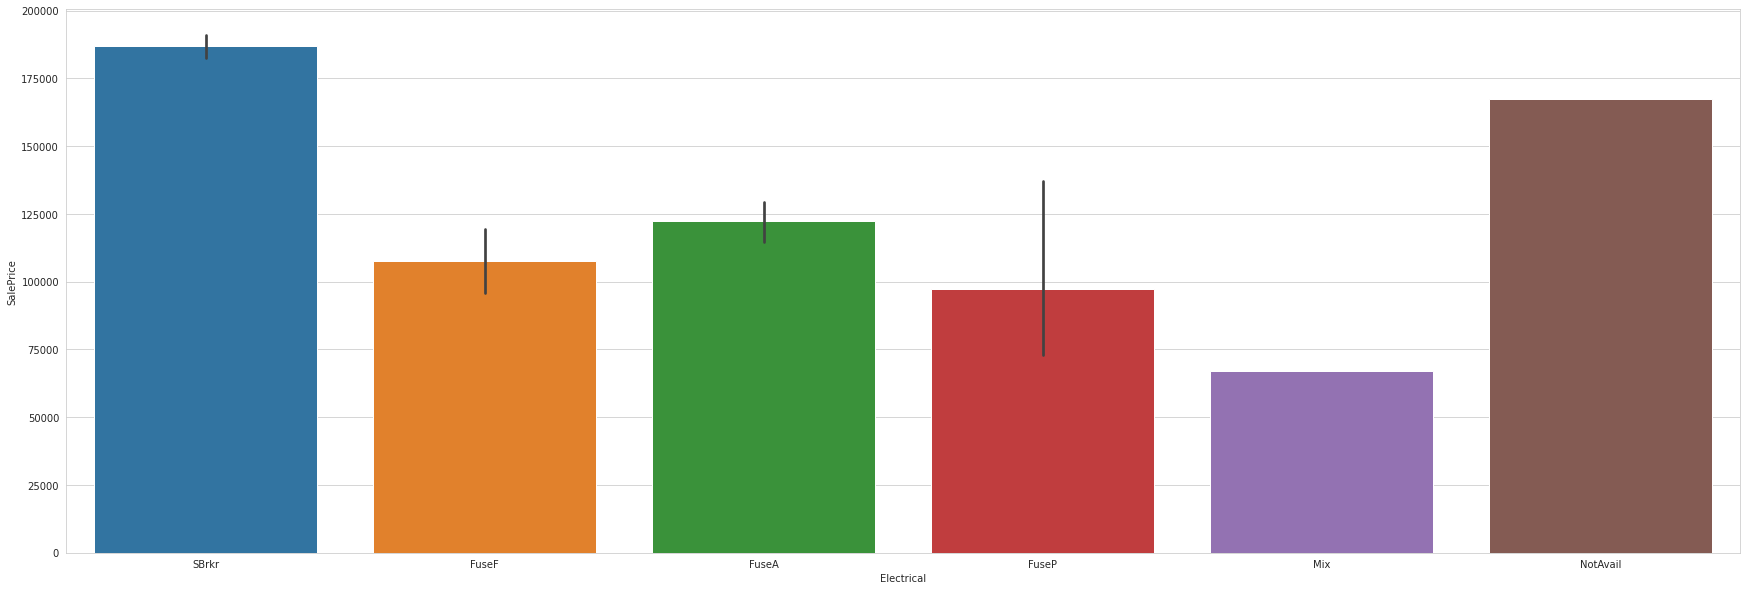

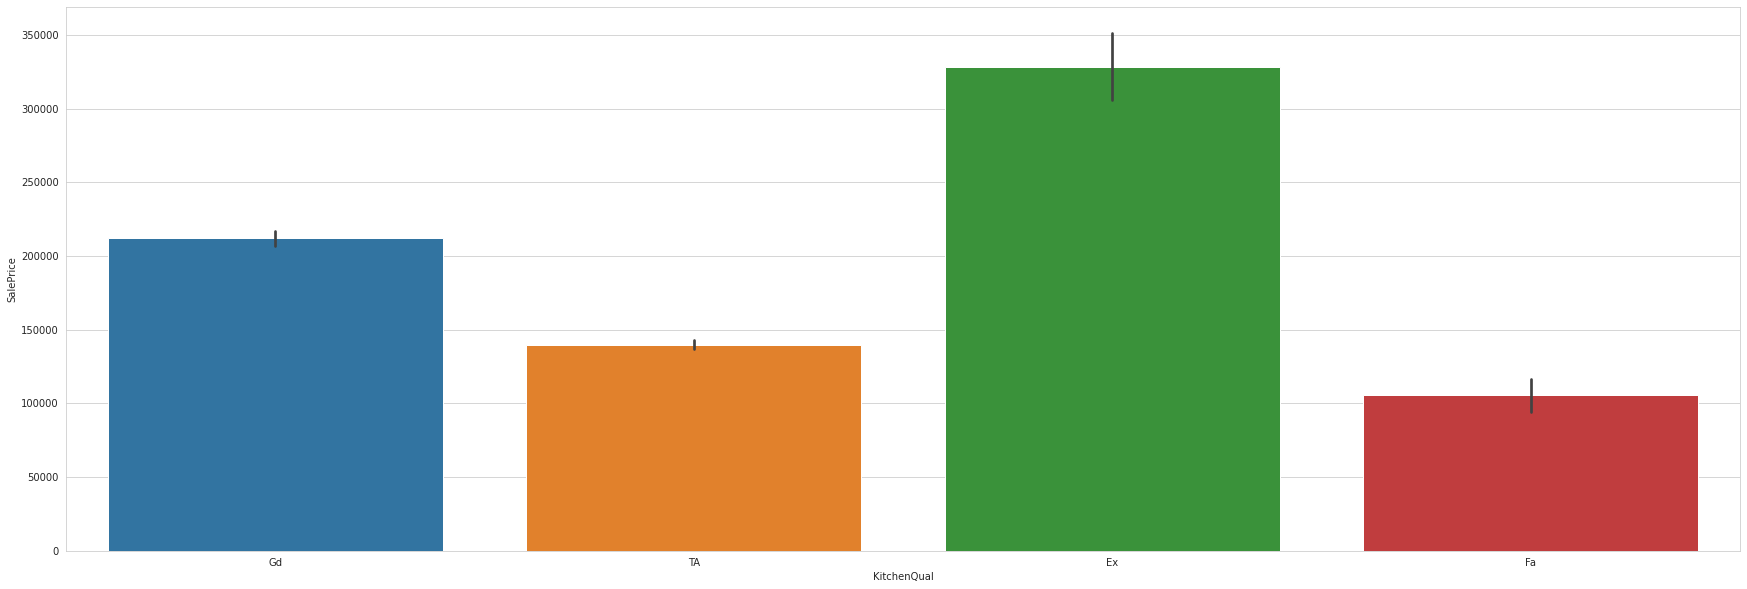

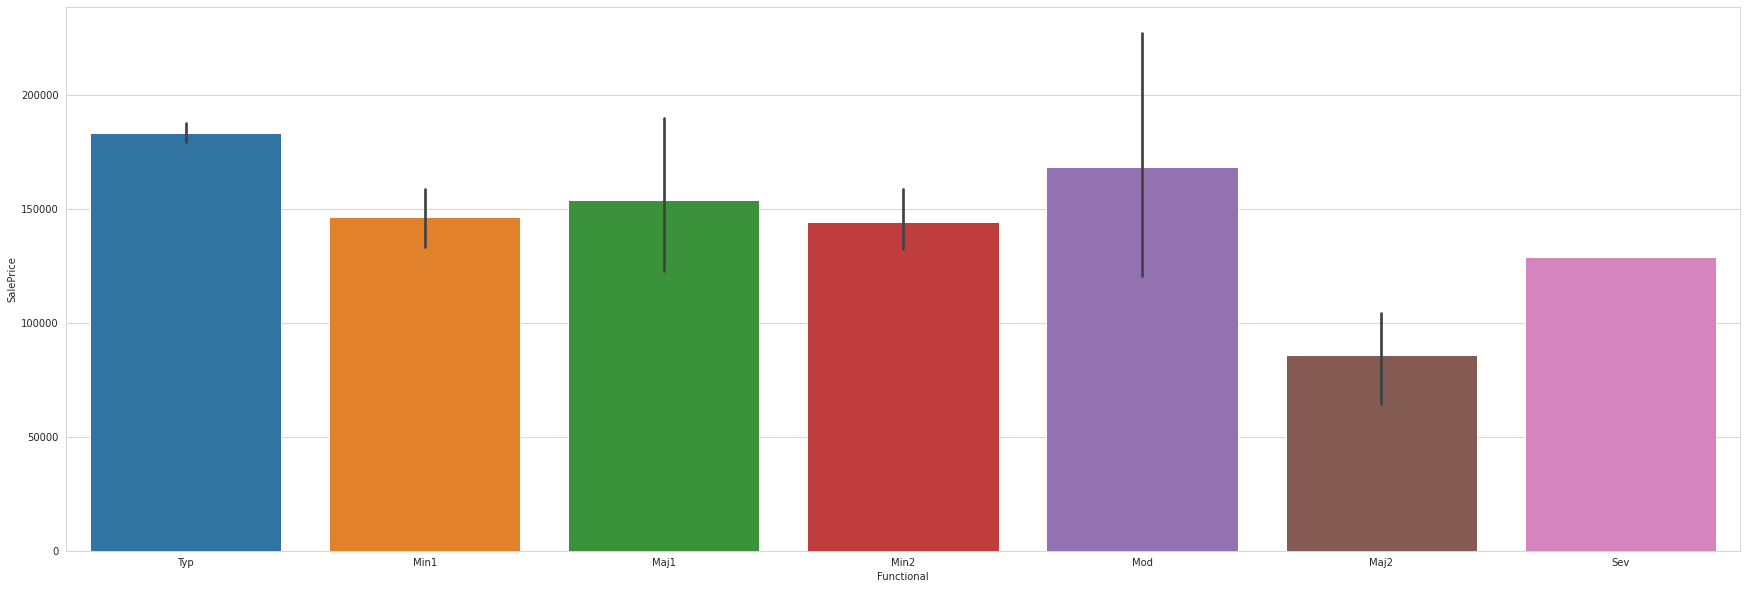

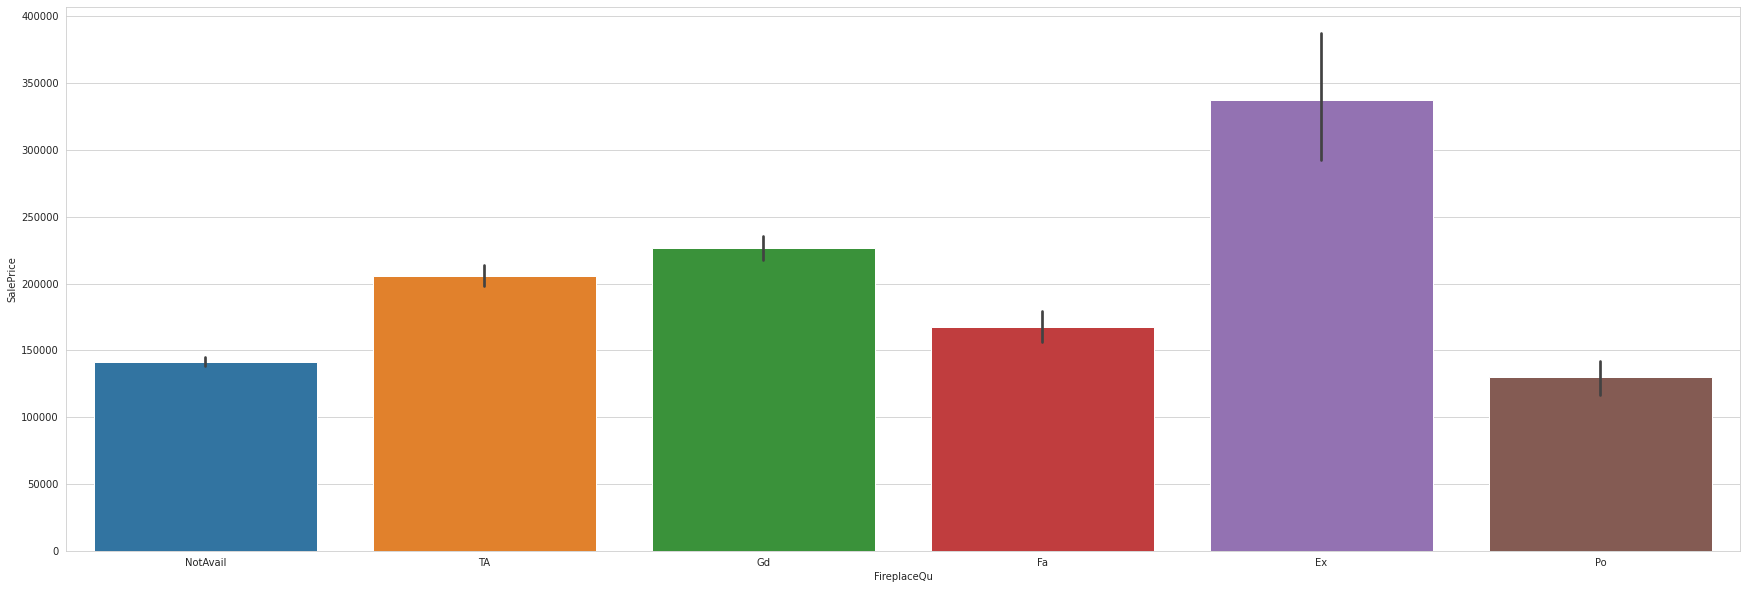

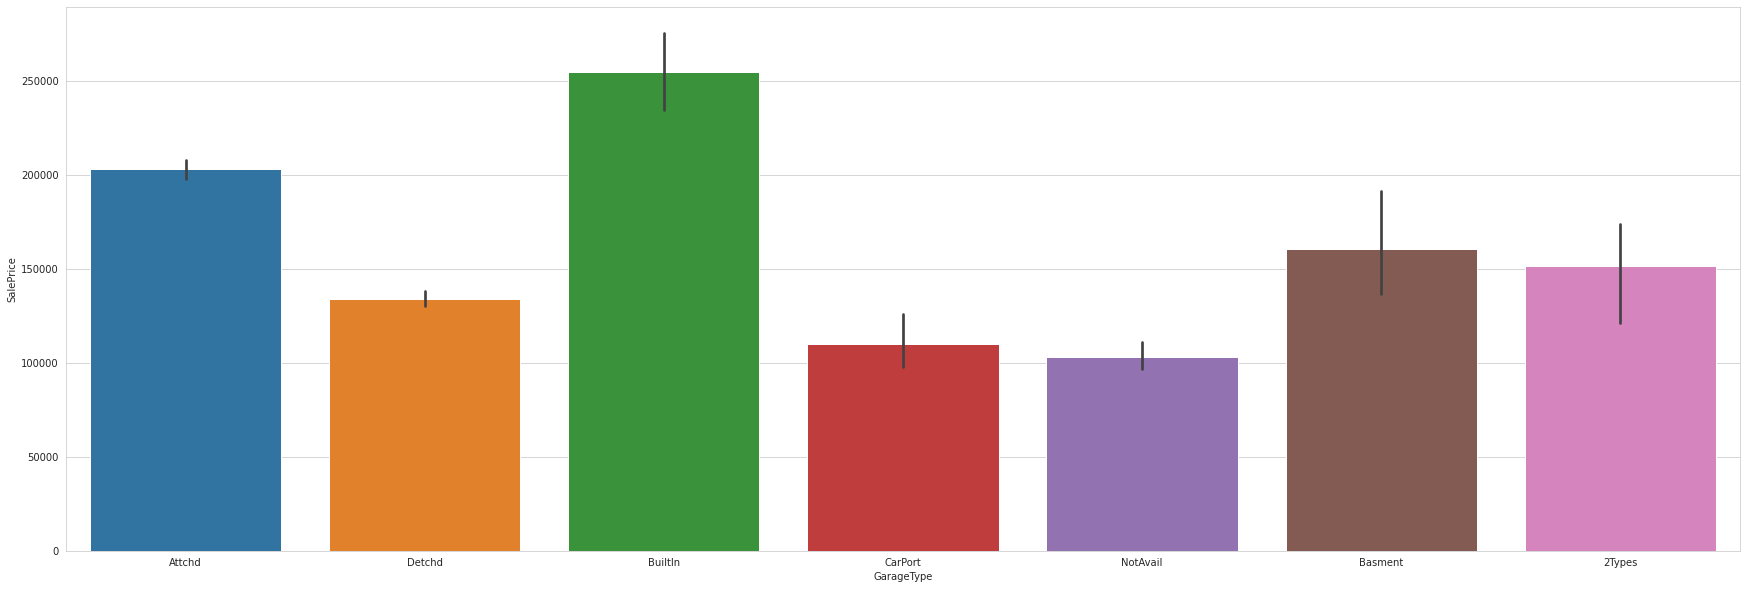

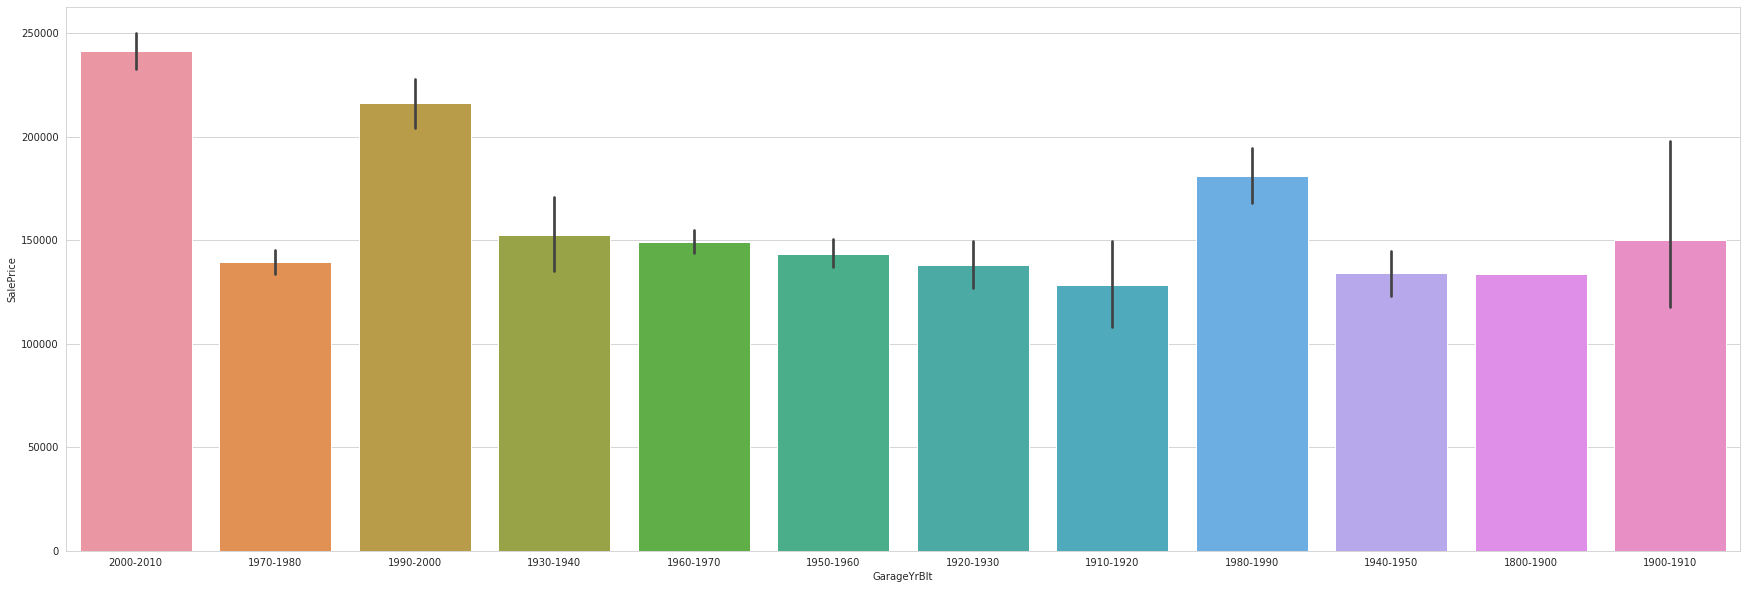

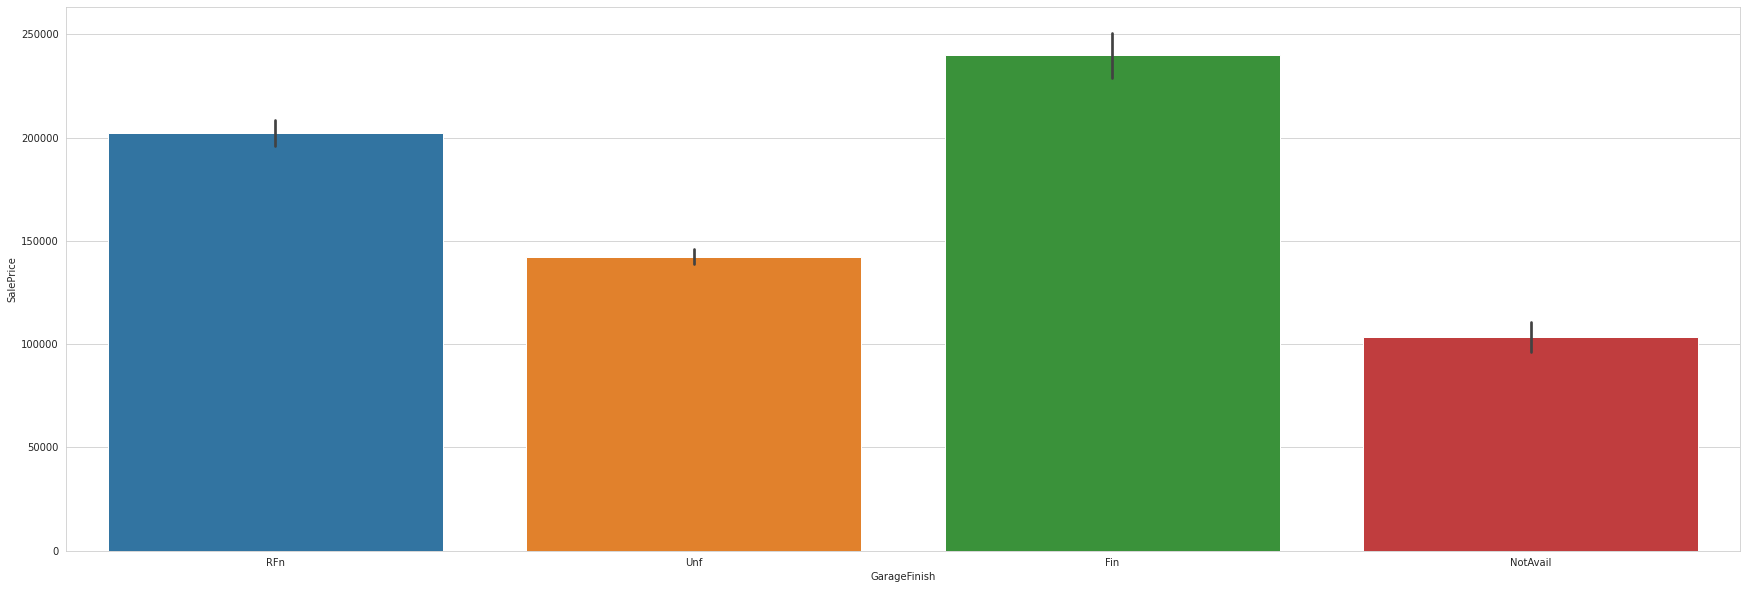

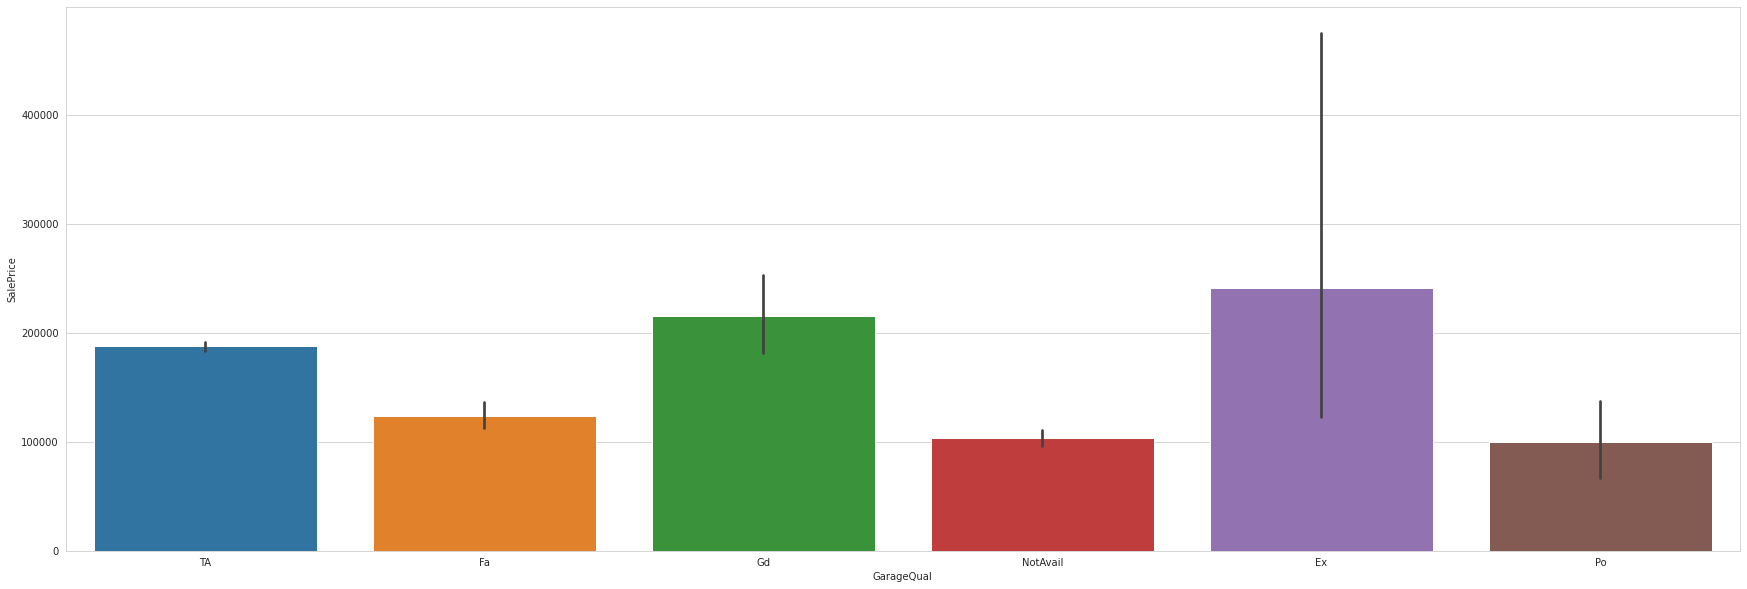

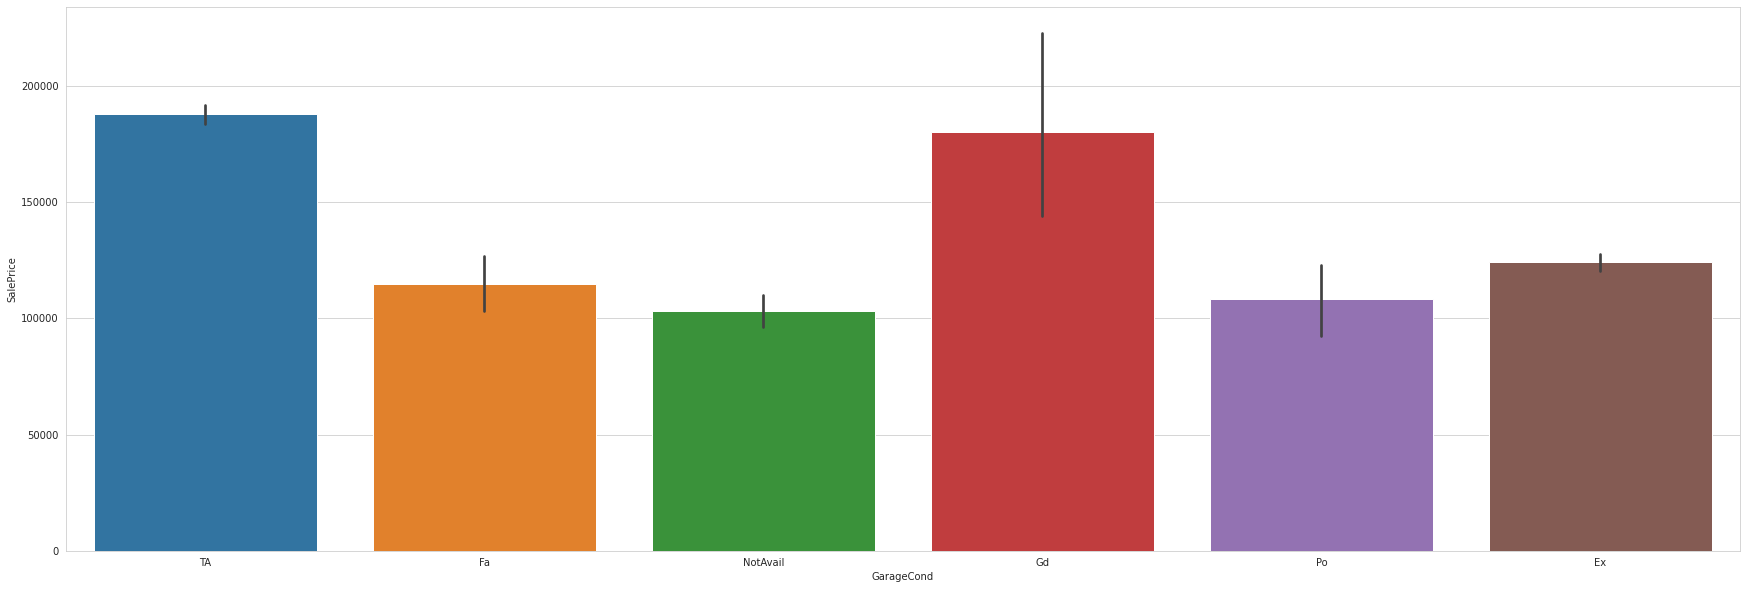

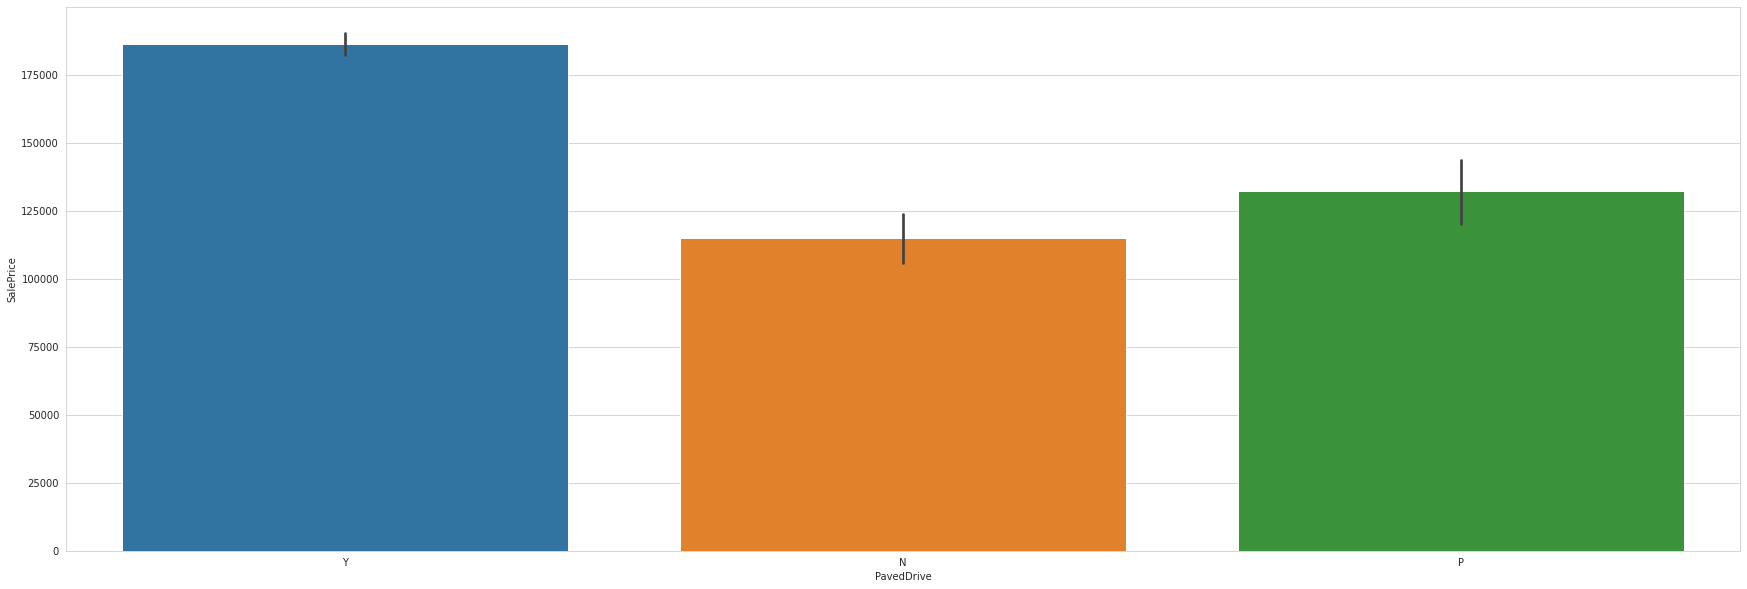

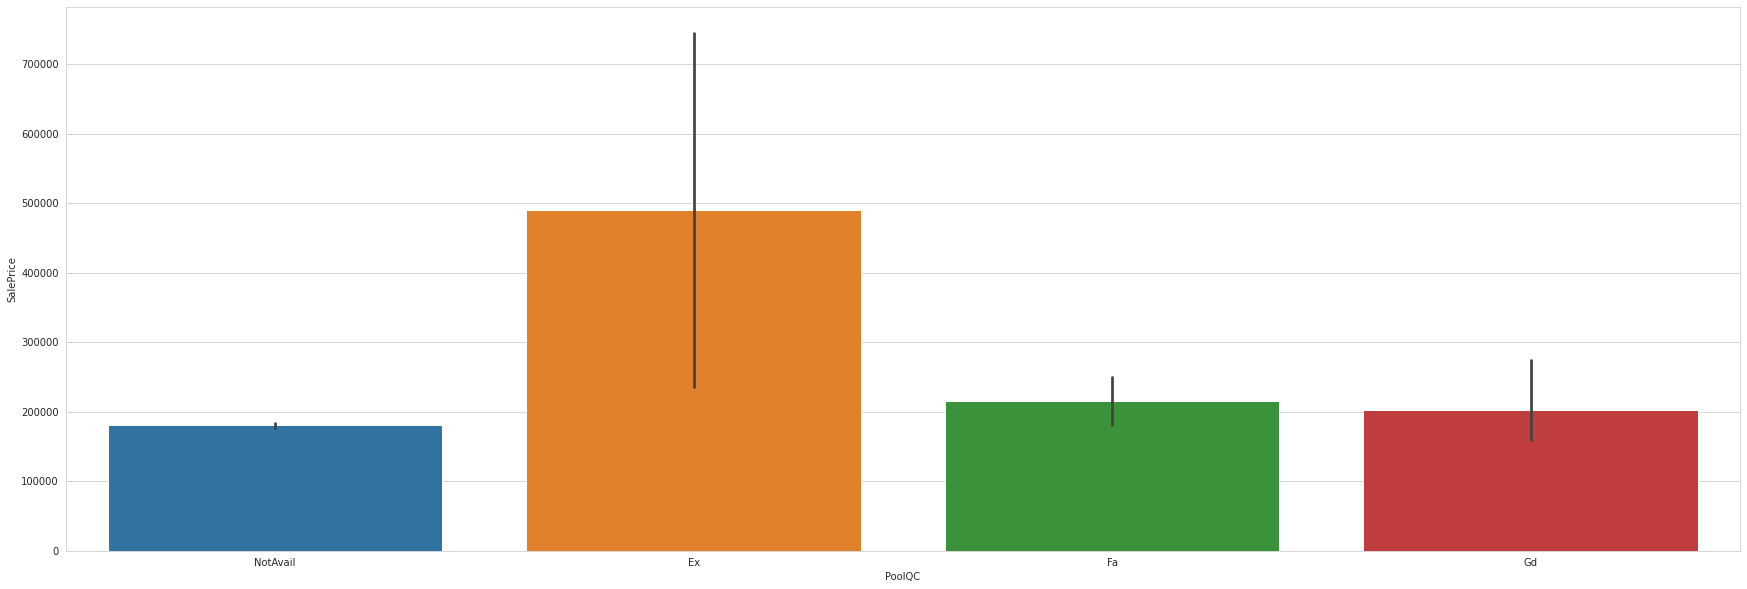

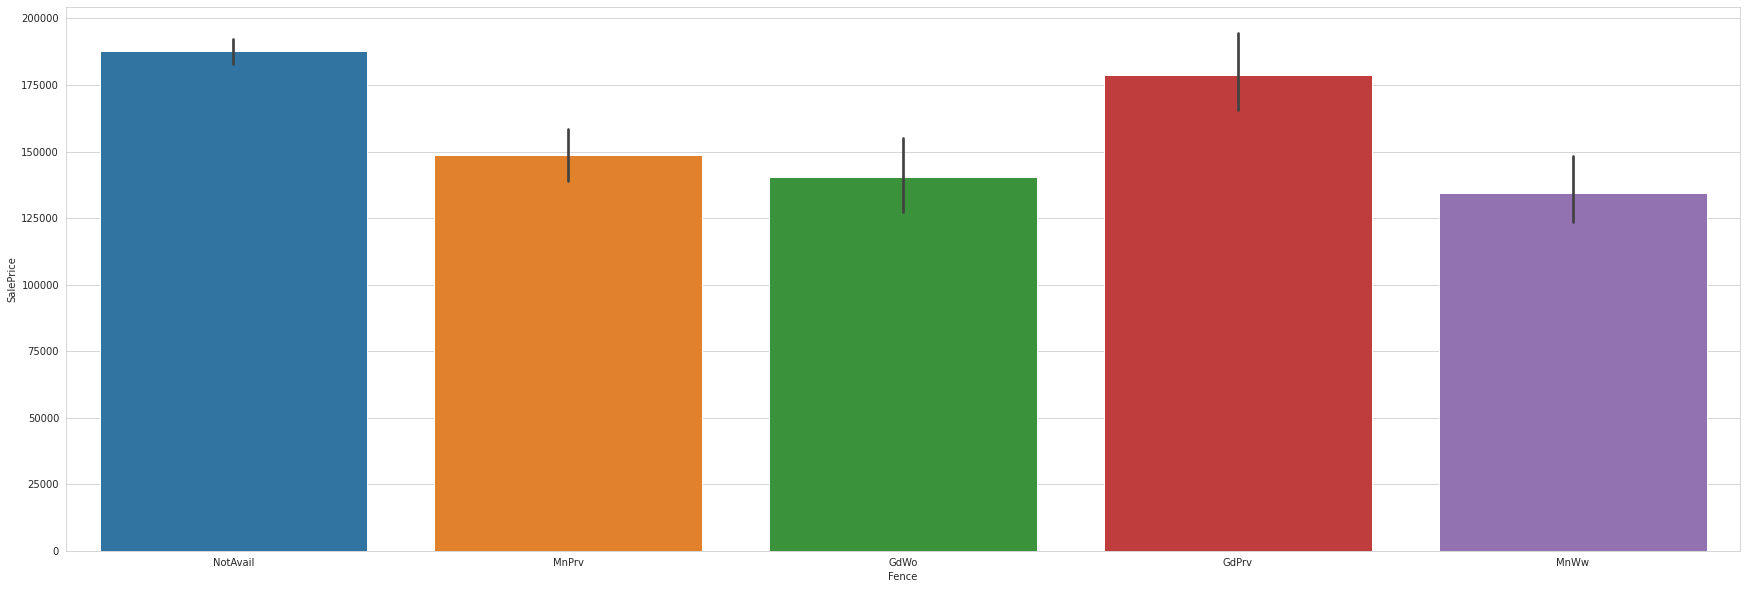

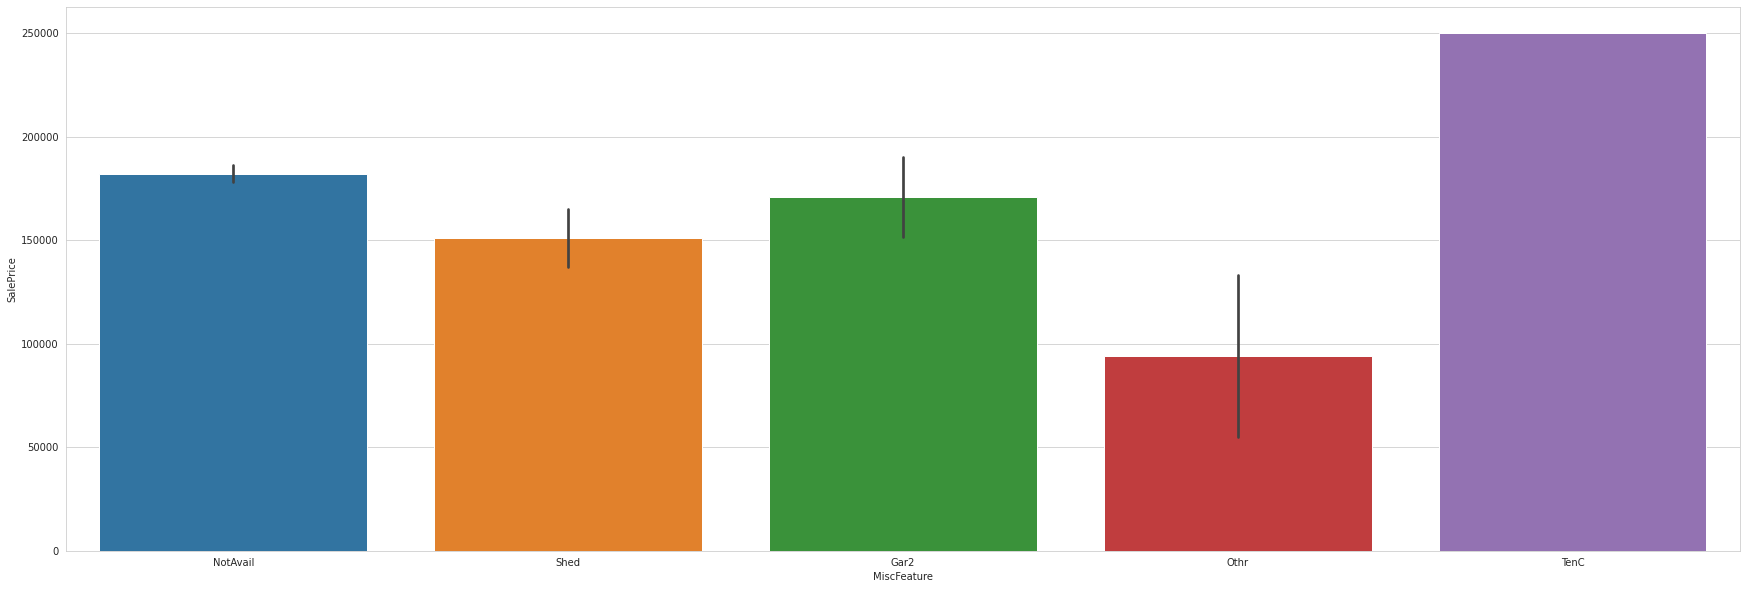

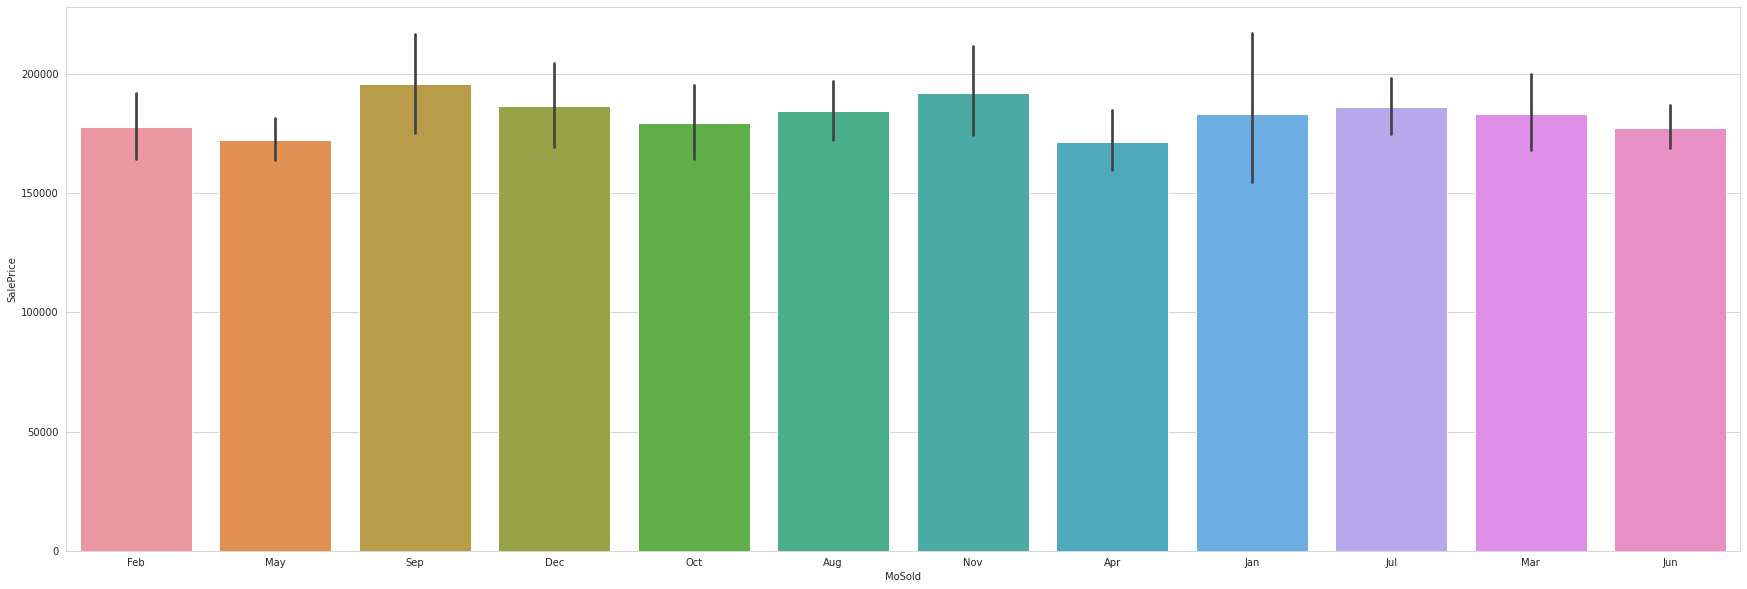

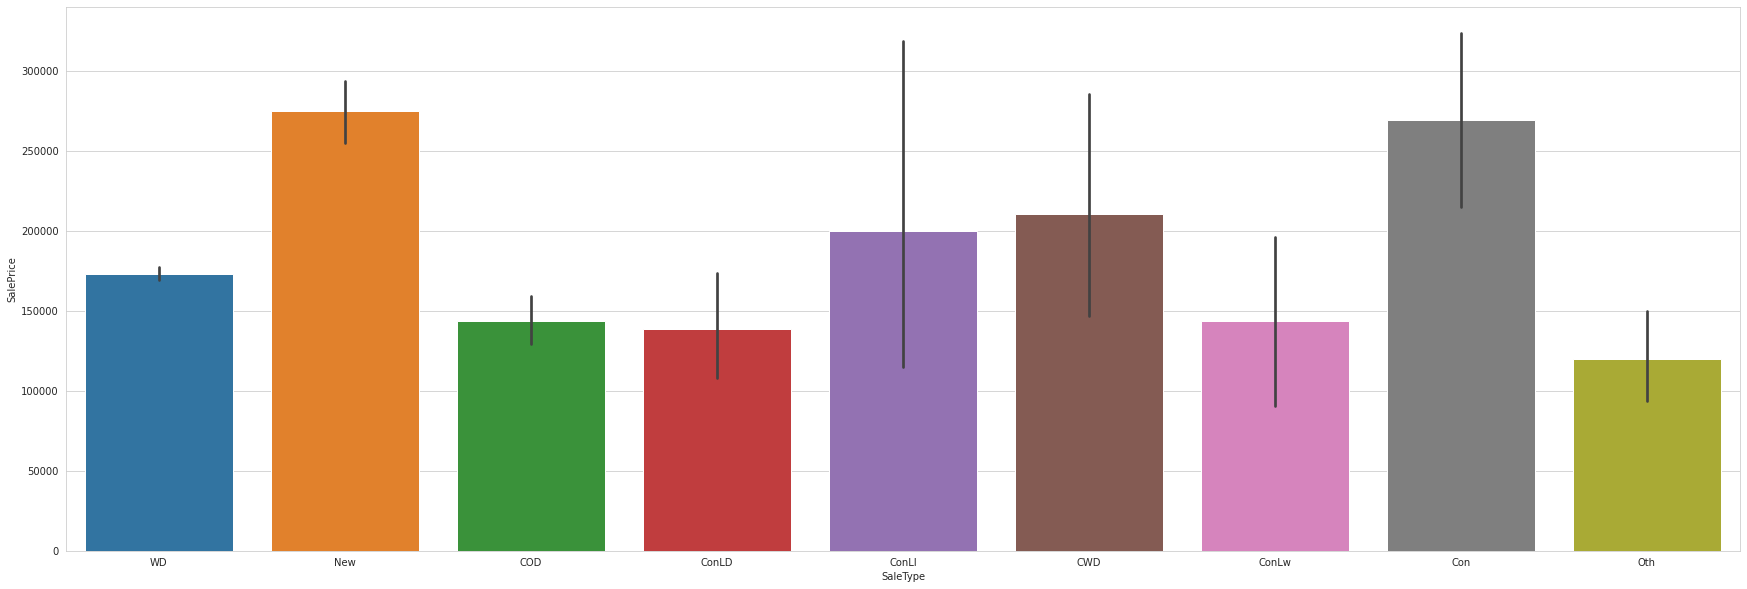

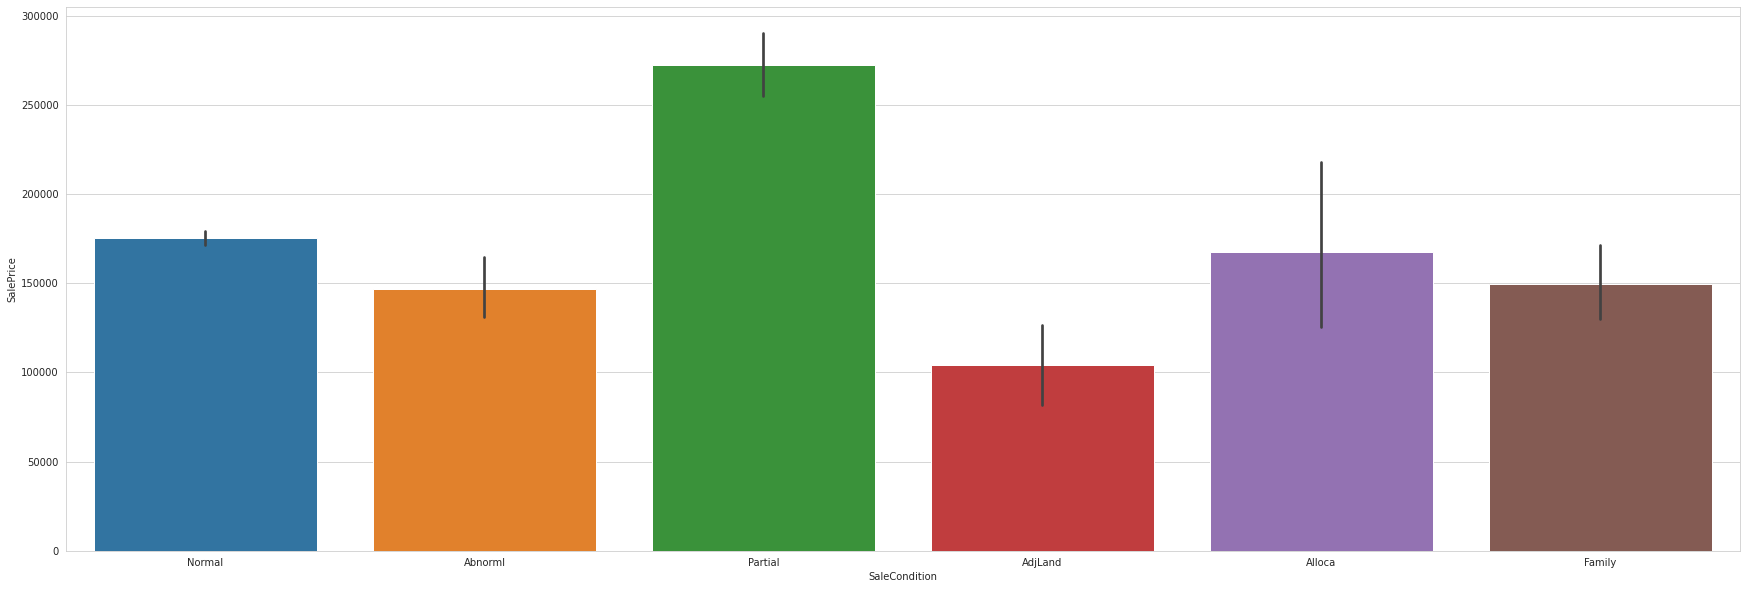

In [40]:
#  Bar Plot for Categorical Features
for col in cat_feat:
    plt.figure(figsize=(30, 10))
    sns.barplot(x=trans_df[col], y=target)
    plt.show()

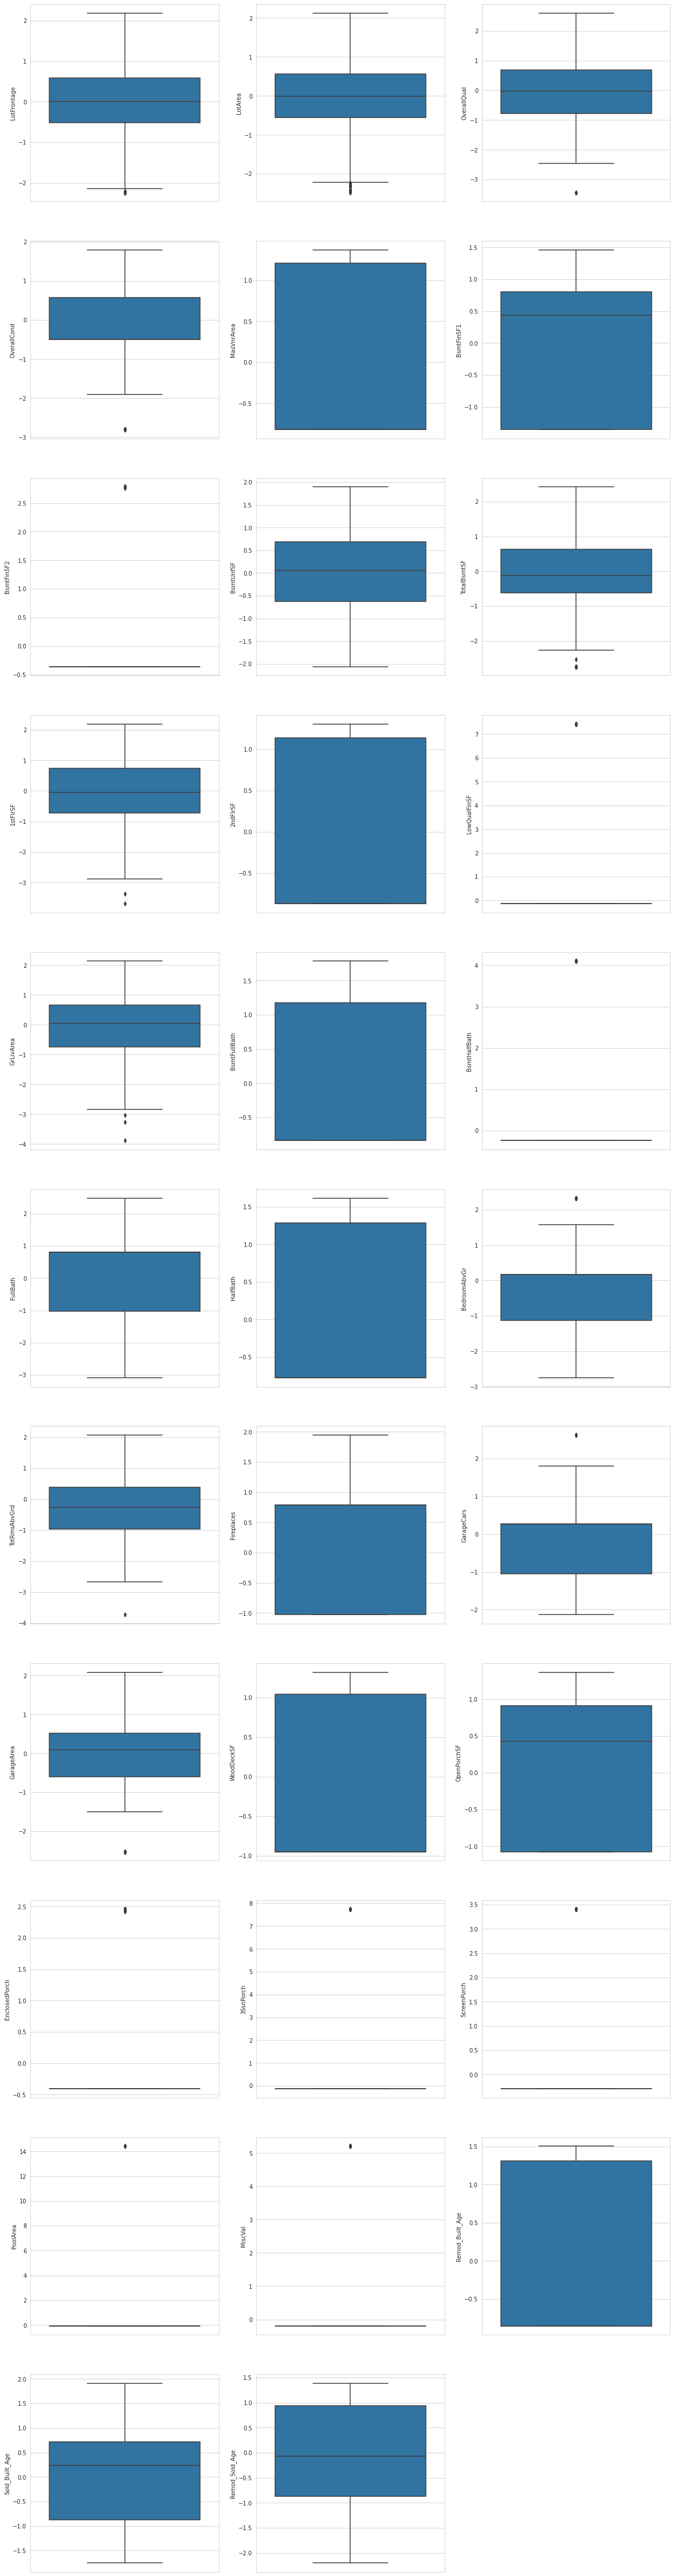

In [41]:
# Box Plot of Numerical Features

plt.figure(figsize=(20,90))
for i in range(len(num_feat)):
    plt.subplot(12, 3, i+1)
    sns.boxplot(y=trans_df[num_feat[i]])

plt.show()

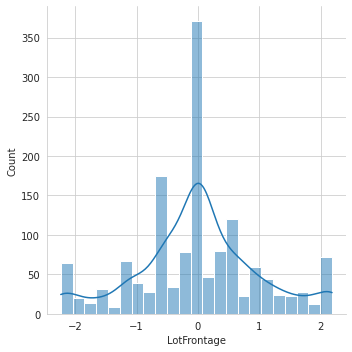

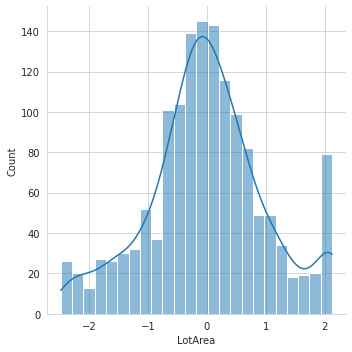

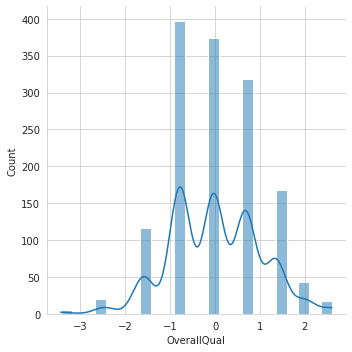

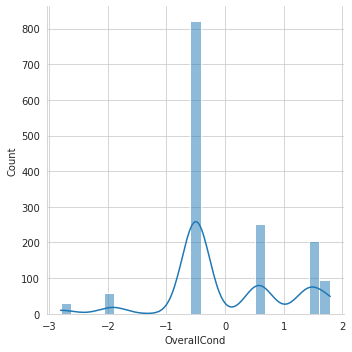

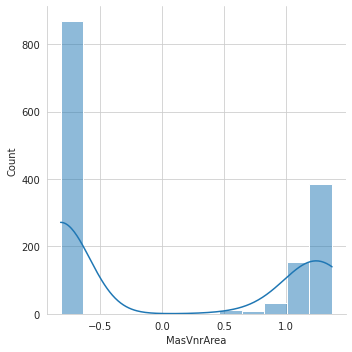

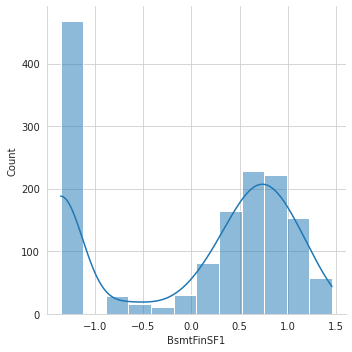

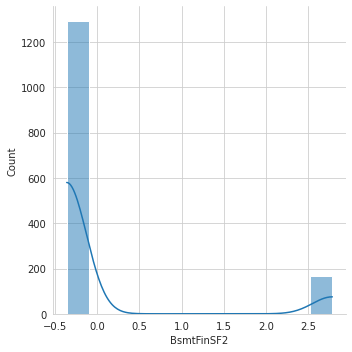

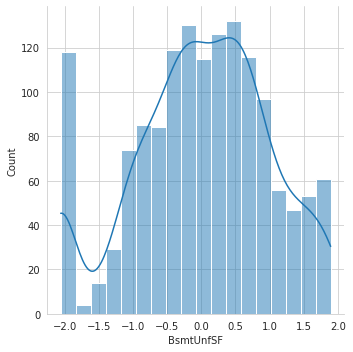

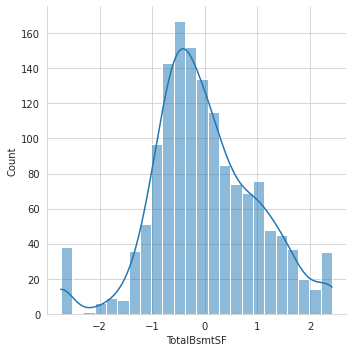

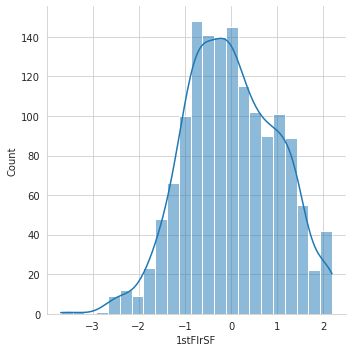

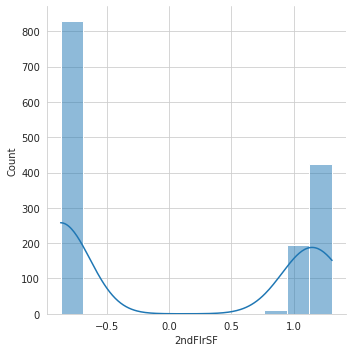

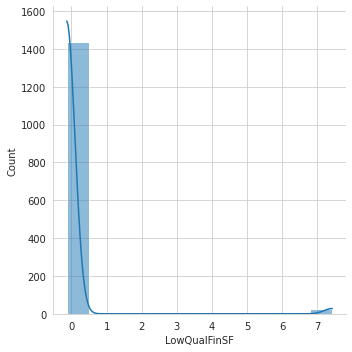

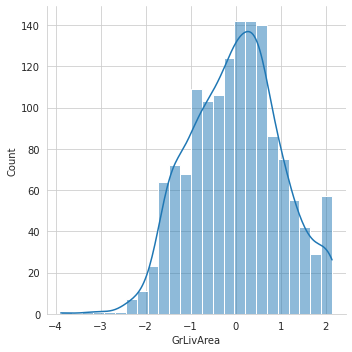

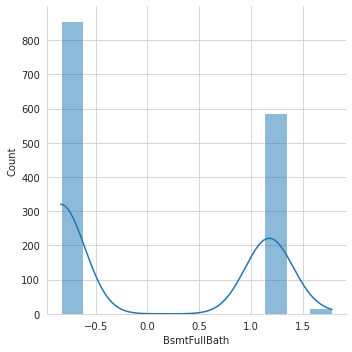

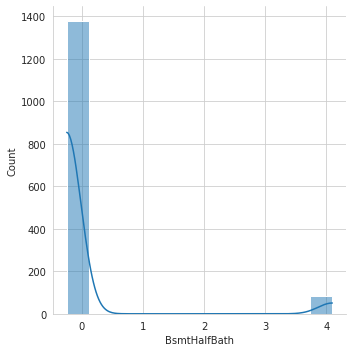

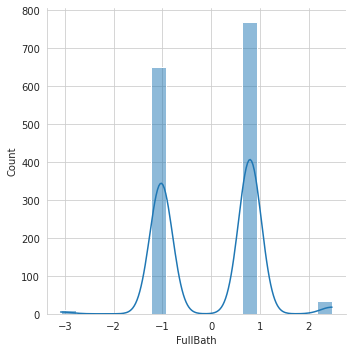

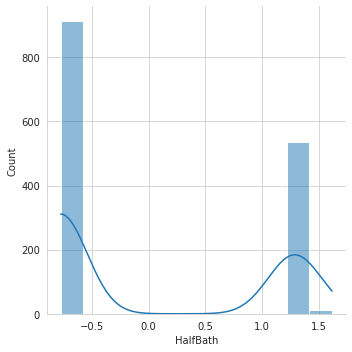

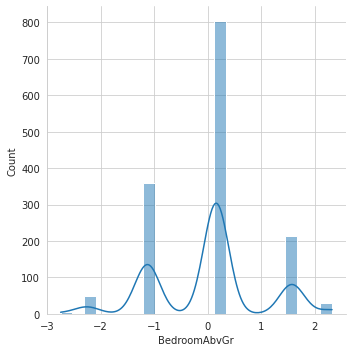

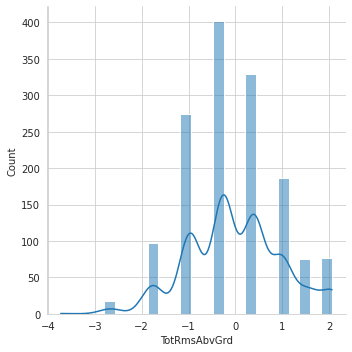

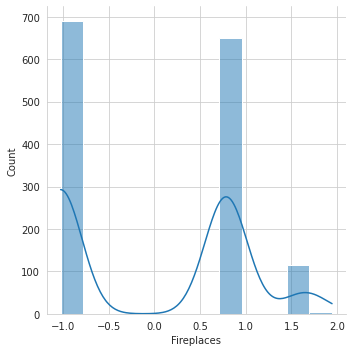

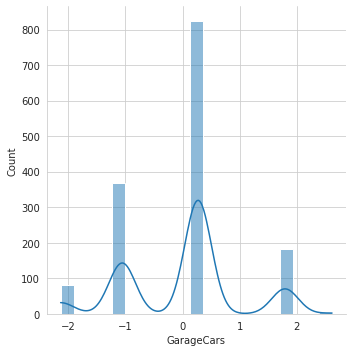

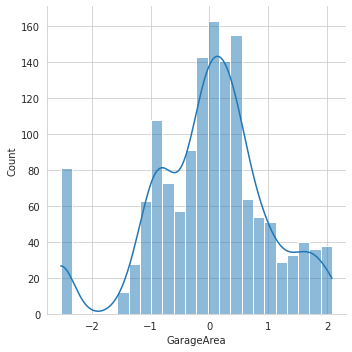

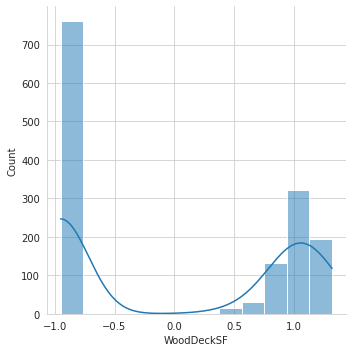

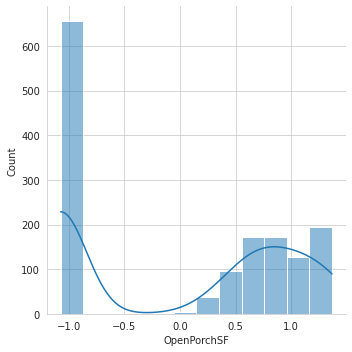

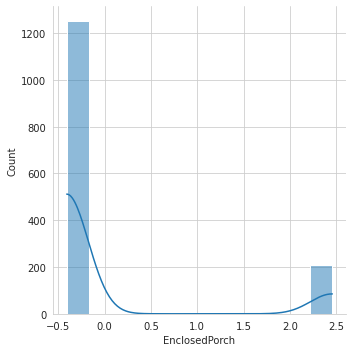

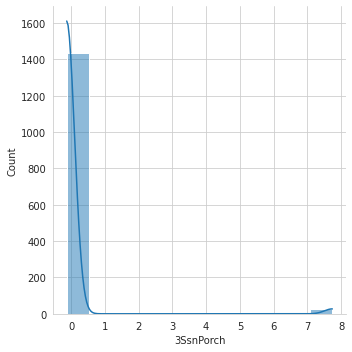

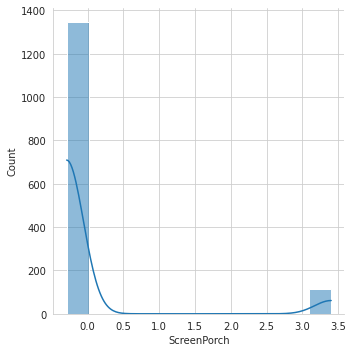

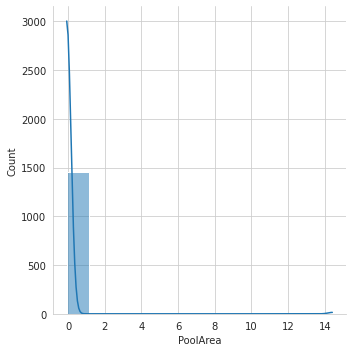

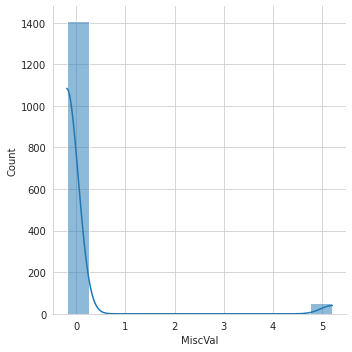

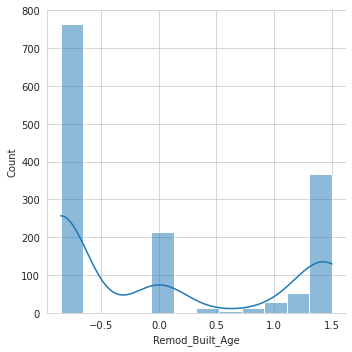

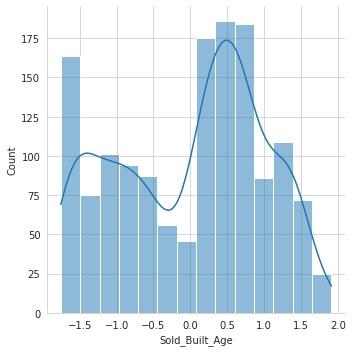

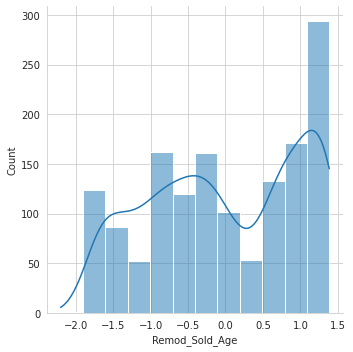

In [42]:
# Distribution Plots
for i in num_feat:
    sns.displot(x=trans_df[i], kde=True)
    plt.show()

# ENCODING
****************

* Some of the categorical features are nominal and some are ordinal. We need to encode them separately.

* For ordinal data, use label encoding and for nominal data, use dummy encoding.

* In dummy encoding, we create separate columns for each category in a feature. Hence we need to make sure that two different features does not contain the same categories. Otherwise, there will be multiple columns with the same name.

* Features like `Condition1 and Condition2` , `Exterior1st and Exterior2nd` are nominal features and contains the same categories.

* In that case, while performing dummy encoding we will change the column name by putting a prefix of the original column.

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
yr_cols.remove('YrSold')
yr_cols

['YearBuilt', 'GarageYrBlt', 'YearRemodAdd']

In [45]:
ordinal_feat = ['LotShape','LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
               'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'FireplaceQu',
               'GarageQual', 'GarageCond' , 'Utilities', "PoolQC"]

nominal_feat = ['MSSubClass', 'MSZoning','Street', 'LotConfig', 'Neighborhood',
               'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
               'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'Functional',
               'GarageType', 'GarageFinish', 'PavedDrive','SaleType', 'SaleCondition'
               , 'LandContour', 'MoSold', "Alley", "Fence", "MiscFeature"]

### Dictionary of all the ordinal categorical features

In [46]:
ord_dict = {"LotShape": ['Reg','IR1','IR2','IR3', 'NotAvail'],
            "LandSlope" : ["Gtl", "Mod", "Sev",'NotAvail' ],
            "ExterQual": [  "Ex", "Gd", "TA", "Fa", "Po", 'NotAvail' ],
            "ExterCond": [  "Ex", "Gd", "TA", "Fa", "Po", 'NotAvail' ],
            "BsmtQual": [  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
            "BsmtCond":[  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
            "BsmtExposure": ["Gd", "Av", "Mn", "No", "NA", 'NotAvail'],
            "BsmtFinType1":[ "GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA", 'NotAvail'],
            "BsmtFinType2":[ "GLQ","ALQ","BLQ","Rec","LwQ","Unf","NA", 'NotAvail'],
            "HeatingQC": [  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
            "KitchenQual": [  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
            "FireplaceQu":[  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
            "GarageQual":[  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
            "GarageCond": [  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ],
            "Utilities":  [ "AllPub", "NoSewr", "NoSeWa","ELO", "NotAvail"],
            "PoolQC":[  "Ex", "Gd", "TA", "Fa", "Po", "NA", 'NotAvail' ]
           
           }

In [47]:
enc_df = trans_df.copy()
test_enc_df = new_test_df.copy()

def encode_feat(nom_feat, ord_feat, yr_cols, df, t_df=pd.DataFrame()):
    
    # Label encoding ordinal features
    le = LabelEncoder()
    
    for col in ord_feat:
        le.fit(ord_dict[col])
        df[col] = le.transform(df[col])
        if len(t_df) != 0:
            t_df[col] = le.transform(t_df[col])
            
    for col in yr_cols:
        df[col] = le.fit_transform(df[col])
        if len(t_df) != 0:
            t_df[col] = le.transform(t_df[col])
    
    # dummy encoding nominal features
    for col in nom_feat:
        dum = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dum], axis=1)
        df.drop([col], axis=1, inplace=True)
        
        if len(t_df) != 0:
            t_df = pd.concat([t_df, dum], axis=1)
            t_df.drop([col], axis=1, inplace=True)
     
    if len(t_df) != 0:
        return df, t_df
    else:
        return df


enc_df, test_enc_df = encode_feat(nominal_feat, ordinal_feat, yr_cols, enc_df, test_enc_df) 

In [48]:
print(enc_df.shape)
print(test_enc_df.shape)

(1460, 268)
(1460, 268)


In [49]:
test_enc_df = test_enc_df.iloc[:-1, :]
test_enc_df

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NotAvail,MiscFeature_Gar2,MiscFeature_NotAvail,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC
0,0.639379,0.567748,4.0,0.0,0.0,-0.783664,0.575812,7.0,2.0,-0.818992,...,0,0,0,0,1,0,1,0,0,0
1,0.696431,1.262634,0.0,0.0,0.0,-0.032491,0.575812,6.0,1.0,1.118839,...,0,0,0,0,1,0,1,0,0,0
2,0.295591,1.149376,0.0,0.0,0.0,-0.783664,-0.499545,10.0,5.0,-0.818992,...,0,0,0,0,1,0,1,0,0,0
3,0.525067,0.123040,0.0,0.0,0.0,-0.032491,0.575812,10.0,5.0,0.671859,...,0,0,0,0,1,0,1,0,0,0
4,-1.530216,-1.309194,0.0,0.0,0.0,1.347033,-0.499545,10.0,5.0,-0.818992,...,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-2.903491,-2.313432,4.0,0.0,0.0,-1.588997,1.427348,7.0,2.0,-0.818992,...,0,0,0,0,1,0,1,0,0,0
1455,-2.903491,-2.328466,4.0,0.0,0.0,-1.588997,-0.499545,7.0,2.0,-0.818992,...,0,0,0,0,1,0,1,0,0,0
1456,5.040405,2.702691,4.0,0.0,0.0,-0.783664,1.427348,6.0,5.0,-0.818992,...,0,0,1,0,0,0,1,0,0,0
1457,-0.400303,0.249409,4.0,0.0,0.0,-0.783664,-0.499545,10.0,5.0,-0.818992,...,1,0,0,0,0,0,0,0,1,0


In [50]:
print(enc_df.shape)
print(test_enc_df.shape)

(1460, 268)
(1459, 268)


# MODEL TRAINING & EVALUATION

In [51]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, BayesianRidge,RANSACRegressor,HuberRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error, make_scorer
from sklearn.pipeline import Pipeline

In [52]:
sc = ('Scaler', StandardScaler())
est =[]
est.append(('LinearRegression', Pipeline([sc, ('LinearRegression', LinearRegression())])))
est.append(('Ridge', Pipeline([sc, ('Ridge', Ridge())])))
est.append(('Lasso', Pipeline([sc, ('Lasso', Lasso())])))
est.append(('BayesianRidge', Pipeline([sc, ('BayesianRidge', BayesianRidge())])))
est.append(('ElasticNet', Pipeline([sc,('Elastic', ElasticNet())])))
est.append(('SGD', Pipeline([sc,('SGD', SGDRegressor())])))
est.append(('Huber', Pipeline([sc,('Huber', HuberRegressor())])))
est.append(('RANSAC', Pipeline([sc,('RANSAC', RANSACRegressor())])))
est.append(('GradientBoosting', Pipeline([sc,('GradientBoosting',GradientBoostingRegressor())])))
est.append(('AdaBoost', Pipeline([sc, ('AdaBoost', AdaBoostRegressor())])))
est.append(('ExtraTree', Pipeline([sc,('ExtraTrees', ExtraTreesRegressor())])))
est.append(('RandomForest', Pipeline([sc,('RandomForest', RandomForestRegressor())]))) 
est.append(('Bagging', Pipeline([sc,('Bagging', BaggingRegressor())])))
est.append(('KNeighbors', Pipeline([sc,('KNeighbors', KNeighborsRegressor())])))
est.append(('DecisionTree', Pipeline([sc,('DecisionTree', DecisionTreeRegressor())])))
est.append(('XGB', Pipeline([sc,('XGB', XGBRegressor())])))

In [53]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], enc_df, target, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('GradientBoosting', 0.8733922328104233),
 ('ExtraTree', 0.8730784684398784),
 ('RandomForest', 0.8606063466178637),
 ('XGB', 0.845364991458701),
 ('Bagging', 0.8419168701296111),
 ('BayesianRidge', 0.8295776463862519),
 ('ElasticNet', 0.8282916828459099),
 ('Huber', 0.8252528971636152),
 ('Ridge', 0.8122455103723406),
 ('Lasso', 0.8109987669250396),
 ('AdaBoost', 0.7996805090665999),
 ('DecisionTree', 0.7148578566959537),
 ('KNeighbors', 0.6991363182061564),
 ('SGD', -6478.397159002225),
 ('LinearRegression', -4.5395932563352306e+21),
 ('RANSAC', -2.4143432424388653e+22)]

In [54]:
base_model_scores = sorted(models_score.items(), key= lambda v:v[1], reverse=True)

# FEATURE SELECTION
*****************************

* Selecting strong numerical features using Pearson’s Correlation Coefficient
* Selecting strong categorical using ANOVA 

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression,  f_classif

In [56]:
num_feat, cat_feat = get_cat_num_features(trans_df)
num_df = trans_df[num_feat]
cat_df = trans_df[cat_feat]

print("Total Numerical Features = ", len(num_feat))
print("Total Categorical Features = ", len(cat_feat))

Total Numerical Features =  32
Total Categorical Features =  48


### Selecting best 20 numerical features

In [57]:
# define feature selection
num_fs = SelectKBest(score_func=f_regression, k=20)
# apply feature selection
num_fs.fit(num_df, target)
# get the column indices
cols  = num_fs.get_support(indices=True)
best_num_df = num_df.iloc[:,cols]

best_num_df

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,Remod_Built_Age,Sold_Built_Age,Remod_Sold_Age
0,-0.225207,-0.301080,0.675230,1.240283,0.800307,-0.466475,-0.815510,0.532276,1.175742,0.797246,1.284128,0.989194,-1.027693,0.272610,0.397322,-0.950697,0.857230,-0.850810,-1.099852,-0.752653
1,0.639379,0.019166,-0.032491,-0.818992,1.016029,0.544368,0.424730,-0.412907,-0.838895,0.797246,-0.773692,-0.256175,0.784338,0.272610,-0.006169,1.218069,-1.074300,-0.850810,0.118993,0.645629
2,-0.050884,0.468067,0.675230,1.203305,0.572404,-0.304222,-0.587591,0.672761,1.175742,0.797246,1.284128,-0.256175,0.784338,0.272610,0.666635,-0.950697,0.676771,-0.000664,-0.943817,-0.649602
3,-0.517483,0.005377,0.675230,-0.818992,0.140778,-0.722644,-0.449229,0.545417,1.175742,-1.025173,-0.773692,0.391835,0.784338,1.795499,0.817407,-0.950697,0.589816,1.502720,1.429817,0.800808
4,0.867187,1.260825,1.347033,1.342998,0.752942,0.257213,0.110824,1.361992,1.175742,0.797246,1.284128,1.544891,0.784338,1.795499,1.656136,1.083179,1.014323,-0.850810,-0.874584,-0.471720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.400303,-0.451866,-0.032491,-0.818992,-1.353920,-0.221035,-0.475789,0.412070,-0.838895,0.797246,1.284128,0.391835,0.784338,0.272610,-0.006169,-0.950697,0.653420,-0.000664,-0.874584,-0.556653
1456,0.923974,0.978522,-0.032491,1.139782,0.872884,1.220570,2.058318,1.164409,1.175742,0.797246,-0.773692,0.391835,1.648397,0.272610,0.178590,1.265495,-1.074300,1.103490,0.149895,0.315368
1457,-0.167016,-0.135397,0.675230,-0.818992,0.260874,0.274478,0.229528,1.576054,-0.838895,0.797246,-0.773692,1.544891,1.648397,-1.056305,-1.014801,-0.950697,0.849172,1.502720,1.035992,-0.868910
1458,-0.050884,0.051387,-0.783664,-0.818992,-0.463641,0.091376,-0.082688,-0.879098,1.175742,-1.025173,-0.773692,-0.967424,-1.027693,-1.056305,-1.076243,1.279666,-1.074300,1.488974,0.853349,-0.069011


### Select best 30 categorical features

### Encoding categorical features

In [58]:
import warnings
warnings.filterwarnings(action='ignore')

def lab_encode_feat(df):
    
    # Label encoding ordinal features
    le = LabelEncoder()
    
    for col in df.columns:
        df[col] = le.fit_transform(df[col])
        
    return df

lab_encode_feat(cat_df) 
cat_df

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,9,3,1,1,3,3,0,4,0,5,...,2,5,5,2,3,4,1,3,8,4
1,3,3,1,1,3,3,0,2,0,24,...,2,5,5,2,3,4,1,8,8,4
2,9,3,1,1,0,3,0,4,0,5,...,2,5,5,2,3,4,1,11,8,4
3,8,3,1,1,0,3,0,0,0,6,...,3,5,5,2,3,4,1,3,8,0
4,9,3,1,1,0,3,0,2,0,15,...,2,5,5,2,3,4,1,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,9,3,1,1,3,3,0,4,0,8,...,2,5,5,2,3,4,1,1,8,4
1456,3,3,1,1,3,3,0,4,0,14,...,3,5,5,2,3,2,1,3,8,4
1457,8,3,1,1,3,3,0,4,0,6,...,2,5,5,2,3,0,3,8,8,4
1458,3,3,1,1,3,3,0,4,0,12,...,3,5,5,2,3,4,1,0,8,4


In [59]:
cat_fs = SelectKBest(score_func=f_classif, k=30)
cat_fs.fit(cat_df, target)
cols = cat_fs.get_support(indices=True)
best_cat_df = cat_df.iloc[:, cols]

best_cat_df

,MSZoning,Street,LotShape,LandContour,LandSlope,Neighborhood,Condition2,HouseStyle,YearBuilt,YearRemodAdd,...,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive
0,3,1,3,3,0,5,2,5,11,6,...,1,5,2,3,1,11,2,5,5,2
1,3,1,3,3,0,24,2,2,8,3,...,1,5,3,5,1,8,2,5,5,2
2,3,1,0,3,0,5,2,5,11,6,...,1,5,2,5,1,11,2,5,5,2
3,3,1,0,3,0,6,2,5,2,2,...,1,5,2,2,5,10,3,5,5,2
4,3,1,0,3,0,15,2,5,10,5,...,1,5,2,5,1,10,2,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,8,2,5,10,5,...,1,5,3,5,1,10,2,5,5,2
1456,3,1,3,3,0,14,2,2,8,4,...,1,5,3,5,1,8,3,5,5,2
1457,3,1,3,3,0,6,2,5,5,6,...,1,5,2,2,1,5,2,5,5,2
1458,3,1,3,3,0,12,2,2,5,5,...,1,0,2,3,1,5,3,5,5,2


In [60]:
best_cols = best_num_df.columns.to_list() + best_cat_df.columns.to_list()
best_cols

['LotFrontage',
 'LotArea',
 'OverallQual',
 'MasVnrArea',
 'BsmtFinSF1',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'Remod_Built_Age',
 'Sold_Built_Age',
 'Remod_Sold_Age',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LandSlope',
 'Neighborhood',
 'Condition2',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

In [61]:
best_feat_df = trans_df[best_cols]
best_feat_df

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,...,CentralAir,Electrical,KitchenQual,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PavedDrive
0,-0.225207,-0.301080,0.675230,1.240283,0.800307,-0.466475,-0.815510,0.532276,1.175742,0.797246,...,Y,SBrkr,Gd,NotAvail,Attchd,2000-2010,RFn,TA,TA,Y
1,0.639379,0.019166,-0.032491,-0.818992,1.016029,0.544368,0.424730,-0.412907,-0.838895,0.797246,...,Y,SBrkr,TA,TA,Attchd,1970-1980,RFn,TA,TA,Y
2,-0.050884,0.468067,0.675230,1.203305,0.572404,-0.304222,-0.587591,0.672761,1.175742,0.797246,...,Y,SBrkr,Gd,TA,Attchd,2000-2010,RFn,TA,TA,Y
3,-0.517483,0.005377,0.675230,-0.818992,0.140778,-0.722644,-0.449229,0.545417,1.175742,-1.025173,...,Y,SBrkr,Gd,Gd,Detchd,1990-2000,Unf,TA,TA,Y
4,0.867187,1.260825,1.347033,1.342998,0.752942,0.257213,0.110824,1.361992,1.175742,0.797246,...,Y,SBrkr,Gd,TA,Attchd,1990-2000,RFn,TA,TA,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.400303,-0.451866,-0.032491,-0.818992,-1.353920,-0.221035,-0.475789,0.412070,-0.838895,0.797246,...,Y,SBrkr,TA,TA,Attchd,1990-2000,RFn,TA,TA,Y
1456,0.923974,0.978522,-0.032491,1.139782,0.872884,1.220570,2.058318,1.164409,1.175742,0.797246,...,Y,SBrkr,TA,TA,Attchd,1970-1980,Unf,TA,TA,Y
1457,-0.167016,-0.135397,0.675230,-0.818992,0.260874,0.274478,0.229528,1.576054,-0.838895,0.797246,...,Y,SBrkr,Gd,Gd,Attchd,1940-1950,RFn,TA,TA,Y
1458,-0.050884,0.051387,-0.783664,-0.818992,-0.463641,0.091376,-0.082688,-0.879098,1.175742,-1.025173,...,Y,FuseA,Gd,NotAvail,Attchd,1940-1950,Unf,TA,TA,Y


# MODEL TRAINING WITH STRONG FEATURES

In [62]:
best_cat_df.columns.to_list()

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'LandSlope',
 'Neighborhood',
 'Condition2',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

In [63]:
# strong nominal and ordinal columns
nom_cols = []
ord_cols = []
for col in best_cat_df.columns.to_list():
    if col in nominal_feat:
        nom_cols.append(col)
    else:
        ord_cols.append(col)

In [64]:
nom_cols

['MSZoning',
 'Street',
 'LandContour',
 'Neighborhood',
 'Condition2',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'PavedDrive']

In [65]:
ord_cols

['LotShape',
 'LandSlope',
 'YearBuilt',
 'YearRemodAdd',
 'ExterQual',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageYrBlt',
 'GarageQual',
 'GarageCond']

In [66]:
ord_cols.remove('YearBuilt')
ord_cols.remove('YearRemodAdd')
ord_cols.remove('GarageYrBlt')

In [67]:
best_feat_df = encode_feat(nom_cols, ord_cols, yr_cols, best_feat_df)
best_feat_df

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtFullBath,FullBath,...,GarageType_CarPort,GarageType_Detchd,GarageType_NotAvail,GarageFinish_Fin,GarageFinish_NotAvail,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,-0.225207,-0.301080,0.675230,1.240283,0.800307,-0.466475,-0.815510,0.532276,1.175742,0.797246,...,0,0,0,0,0,1,0,0,0,1
1,0.639379,0.019166,-0.032491,-0.818992,1.016029,0.544368,0.424730,-0.412907,-0.838895,0.797246,...,0,0,0,0,0,1,0,0,0,1
2,-0.050884,0.468067,0.675230,1.203305,0.572404,-0.304222,-0.587591,0.672761,1.175742,0.797246,...,0,0,0,0,0,1,0,0,0,1
3,-0.517483,0.005377,0.675230,-0.818992,0.140778,-0.722644,-0.449229,0.545417,1.175742,-1.025173,...,0,1,0,0,0,0,1,0,0,1
4,0.867187,1.260825,1.347033,1.342998,0.752942,0.257213,0.110824,1.361992,1.175742,0.797246,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.400303,-0.451866,-0.032491,-0.818992,-1.353920,-0.221035,-0.475789,0.412070,-0.838895,0.797246,...,0,0,0,0,0,1,0,0,0,1
1456,0.923974,0.978522,-0.032491,1.139782,0.872884,1.220570,2.058318,1.164409,1.175742,0.797246,...,0,0,0,0,0,0,1,0,0,1
1457,-0.167016,-0.135397,0.675230,-0.818992,0.260874,0.274478,0.229528,1.576054,-0.838895,0.797246,...,0,0,0,0,0,1,0,0,0,1
1458,-0.050884,0.051387,-0.783664,-0.818992,-0.463641,0.091376,-0.082688,-0.879098,1.175742,-1.025173,...,0,0,0,0,0,0,1,0,0,1


In [68]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], best_feat_df, target, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('ExtraTree', 0.8727659304218419),
 ('RandomForest', 0.8493875505354798),
 ('GradientBoosting', 0.8338544422194515),
 ('BayesianRidge', 0.824326520662633),
 ('ElasticNet', 0.8227320214282882),
 ('Huber', 0.8185655787898574),
 ('Ridge', 0.8166408733756857),
 ('Lasso', 0.8165382220130798),
 ('Bagging', 0.8163779593011978),
 ('XGB', 0.8151335529459276),
 ('AdaBoost', 0.7830465701504171),
 ('KNeighbors', 0.7225439237869066),
 ('DecisionTree', 0.6742931996511983),
 ('SGD', -297.8298691098404),
 ('RANSAC', -4.0580184233954005e+21),
 ('LinearRegression', -7.841795337633702e+22)]

# FEATURE EXTRACTION
***********

* Using PCA to perform dimensionality reduction.
* Don't forget to scale your data before doing PCA.

In [69]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaled_df = StandardScaler().fit_transform(enc_df)
pca = PCA(n_components=0.99, svd_solver='full')
pca_enc_df = pca.fit_transform(scaled_df)

pca_enc_df.shape

(1460, 199)

In [70]:
est =[]
est.append(('LinearRegression', Pipeline([('LinearRegression', LinearRegression())])))
est.append(('Ridge', Pipeline([('Ridge', Ridge())])))
est.append(('Lasso', Pipeline([ ('Lasso', Lasso())])))
est.append(('BayesianRidge', Pipeline([('BayesianRidge', BayesianRidge())])))
est.append(('ElasticNet', Pipeline([('Elastic', ElasticNet())])))
est.append(('SGD', Pipeline([('SGD', SGDRegressor())])))
est.append(('Huber', Pipeline([('Huber', HuberRegressor())])))
est.append(('RANSAC', Pipeline([('RANSAC', RANSACRegressor())])))
est.append(('GradientBoosting', Pipeline([('GradientBoosting',GradientBoostingRegressor())])))
est.append(('AdaBoost', Pipeline([('AdaBoost', AdaBoostRegressor())])))
est.append(('ExtraTree', Pipeline([('ExtraTrees', ExtraTreesRegressor())])))
est.append(('RandomForest', Pipeline([('RandomForest', RandomForestRegressor())]))) 
est.append(('Bagging', Pipeline([('Bagging', BaggingRegressor())])))
est.append(('KNeighbors', Pipeline([('KNeighbors', KNeighborsRegressor())])))
est.append(('DecisionTree', Pipeline([('DecisionTree', DecisionTreeRegressor())])))
est.append(('XGB', Pipeline([('XGB', XGBRegressor())])))

In [71]:
import warnings
warnings.filterwarnings(action='ignore')
seed = 4
splits = 7
models_score ={}
for i in est:
    kfold = KFold(n_splits=splits, random_state=seed, shuffle=True)
    results = cross_val_score(i[1], pca_enc_df, target, cv=kfold)
    models_score.update({i[0] : results.mean()})
    
sorted(models_score.items(), key= lambda v:v[1], reverse=True)

[('BayesianRidge', 0.8304496347312723),
 ('ElasticNet', 0.8296008212728926),
 ('ExtraTree', 0.8023951658099329),
 ('GradientBoosting', 0.7900529162578833),
 ('RandomForest', 0.7659355684396283),
 ('XGB', 0.7539473333163184),
 ('Bagging', 0.7345952383220906),
 ('KNeighbors', 0.7088206141676883),
 ('AdaBoost', 0.6709109875498876),
 ('DecisionTree', 0.5328498444189413),
 ('Huber', 0.20952608528481761),
 ('Ridge', -0.8225200344120932),
 ('Lasso', -1.5669546247510127),
 ('LinearRegression', -16.057913431296864),
 ('SGD', -601.4930935738331),
 ('RANSAC', -5.9567551589623965e+23)]

# CONCLUSION
*****************

* We performed both **Feature Selection** and **Feature Extraction** and we can see, when we used all the features we got better results as compared to using only strong features.

* Feature Selection was better than the Feature Extraction (PCA). Hence feature selection through f-test ANOVA and pearson correlation test is best here to select strong features than the dimensionality reduction method using PCA.

* Although the difference between the results of both (feature selection and with all the features) isn't much, so we can use only the strong features also. Here I am taking all the features.

* Hence we will use all the features and the top model with the best score to predict house prices   

In [72]:
# Top model with scores
base_model_scores[0]

('GradientBoosting', 0.8733922328104233)

# HYPERPARAMETER TUNING
******************

* Our best model is gradient boosting classifier.

* We will tune its parameter that is `learning_rate` , `max_depth` and `n_estimators`.

* Well the default values of the parameters on which we got the results are following:-

    * learning_rate=0.1       
    * n_estimators=100        
    * max_depth=3.
    * min_samples_split=2.
    * min_samples_leaf=1.
    * subsample=1.0
    
    
* Well tuning the min_samples_split, min_samples_leaf and subsample results to nothing. Hence we won't tune these parameters

In [73]:
from sklearn.model_selection import GridSearchCV

***************
### UPDATED
***************
* In the previous version (6th) , I have used the best parameters to train the model, but it seemed to me that the tree kind of overfitted and didn't generalise well on the test set because my score which was `0.23` before became `0.26` on the scoreboard.

* In the 11th version, I sticked to the default parameters of the Gradient Boosting but applied yeo-johnson feature transformation and my score improved from `0.23` to `0.16`.

* Hence I am commenting out the following code.

In [74]:
# %%time

# sc = ('Scaler', StandardScaler())
# h_est = []
# h_est.append(('GBR', Pipeline([sc,('GBR',GradientBoostingRegressor())])))

# best = []
# seed = 4

# parameters = {
              
#               'GBR': {'GBR__learning_rate': [0.1, 0.01],
#                          'GBR__max_depth': [4,6,8],
#                       'GBR__n_estimators': [400, 500, 600]}
#              }


# for i in h_est:
#     kfold = KFold(n_splits=3, random_state=seed, shuffle=True)
#     grid = GridSearchCV(estimator=i[1], param_grid = parameters[i[0]], cv = kfold, n_jobs=-1)
#     grid.fit(enc_df, target)
#     best.append((i[0], grid.best_score_,  grid.best_params_))

In [75]:
# best

In [76]:
# param_dict = best[0][2]
# param = {}
# for i in param_dict:
#     key = i.split('__')[1]
#     param.update({key:param_dict[i]})
    
# param

### Training the model with best parameters

In [77]:
# std_scaler = StandardScaler()
# std_scaler.fit(enc_df)
# scaled_df = std_scaler.transform(enc_df)

# model = GradientBoostingRegressor(learning_rate= param['learning_rate'], 
#                                   max_depth= param['max_depth'], 
#                                   n_estimators=param['n_estimators'])
# model.fit(scaled_df, target)

# top_model = XGBRegressor(learning_rate=0.1,  
#                                   n_estimators= 1000)
# top_model.fit(scaled_df, target)

In [78]:
top_model_name = base_model_scores[0][0]
top_model = dict(est)[top_model_name][0]

std_scaler = StandardScaler()
std_scaler.fit(enc_df)
scaled_df = std_scaler.transform(enc_df)

top_model.fit(scaled_df, target)

GradientBoostingRegressor()

# PREDICTION ON TEST DATA

*****************************

We already performed the same preprocessing steps on test dataset **( test_enc_df )** along with the training dataset. Hence we will just pass it through the top_model .

In [79]:
test_scaled_df = std_scaler.transform(test_enc_df)
predictions = top_model.predict(test_scaled_df)

In [80]:
submission = pd.DataFrame(columns=['Id', 'SalePrice'])
submission['Id'] = test_df['Id']
submission['SalePrice'] = predictions

submission.to_csv('submission.csv', index=False)

# FEATURE ENGINEERING ANALYSIS
********************

* Feature engineering is an art and requires different combinations of techniques to attain better performance.

* Following cells shows different analysis that I made from the different combinations of techniques.

## VERSION 6 NOTEBOOK FEATURE ENGINEERING ANALYSIS

************************
I have performed various combinations of feature engineering and evaluated their results. The following results are on the basis of **IQR outlier removal and BoxCox feature transformation**



* **NO FEATURE TRANSFORMATION & NO OUTLIER REMOVAL**


      ('GradientBoosting', 0.8608838908601799),

      ('ExtraTree', 0.8513076801447276),

      ('RandomForest', 0.8483765546873913)
          
          
* **WITH FEATURE TRANSFORMATION & NO OUTLIER REMOVAL**


      ('ExtraTree', 0.8516058854676427),

      ('GradientBoosting', 0.8491665618535139),

      ('RandomForest', 0.8462603323781929)
         
     
* **NO FEATURE TRANSFORMATION & WITH OUTLIER REMOVAL**


      ('ExtraTree', 0.8709907177784123),

      ('GradientBoosting', 0.8695859492594143),

      ('RandomForest', 0.8579828682121151)
         
         
* **WITH FEATURE TRANSFORMATION & WITH OUTLIER REMOVAL**


      ('GradientBoosting', 0.8735160942186653),

      ('ExtraTree', 0.8655515278510605),

      ('RandomForest', 0.8585987968429459)
     
 *************************
 
* Ensemble Trees have given the best results followed by the linear models with regularization (ridge, lasso etc.).

* Simple linear models have performed very poor. 

* On the basis of the r2 scores of different models, we can see we got **better results when we removed the outliers** although feature transformation didn't put much impact. This is because the trees doesn't take normality (gaussian distribution) into consideration. So even if you don't scale or normalize your data and directly put it into the emsemble trees, it would behave the same. Thats why **feature transformation** had a very minor impact.

* Also in the initial version of this notebook, I didn't perform the binning on year related features. In this notebook I performed it and kind of analysed the results and I found that it also had no impact on the results. The results were same. This could mean that year related columns were not impacting the prices (target variable) much.

*****************************

## LATEST VERSION NOTEBOOK FEATURE ENGINEERING ANALYSIS 

* Intially I used **BOXCOX** transformation that requires all the values to be greater than 0, so I shifted the value to 0.02 in the columns and then applied **BOXCOX** transformation to it. It gave me a score of `0.23` in the scoreboard *(lesser the score, the better the model behaved on test set)*.

* But when I applied **Yeo-Johnson Transformation** which can work on both negative and positive values, my score became `0.13` in the scoreboard which is great. That means **TRANSFORMATION** did play a great role in better generalization (performance on unknown dataset). 

* Hence we can say that a **combination of outlier removal (IQR), performing binning on year columns and yeo-johnson feature transformation** has led to better result that the earlier combination of *IQR outlier removal, binning and boxcox feature transformation* .

* Let's see which features really helped in making decisions.

# RESULT ANALYSIS 

***************

   - Let's analyse the results from the training data

### Top 10 features with their scores

In [81]:
feat_imp_df = pd.DataFrame(columns=['Features', 'Value'])
feat_imp_df['Features'] = enc_df.columns.to_list()
feat_imp_df['Value'] = top_model.feature_importances_

feat_imp_df[feat_imp_df['Value']>0].sort_values(by=['Value'], ascending=False).head(10)

,Features,Value
5,OverallQual,0.537855
25,GrLivArea,0.123230
20,TotalBsmtSF,0.058792
36,GarageCars,0.042862
23,2ndFlrSF,0.032838
16,BsmtFinSF1,0.032492
22,1stFlrSF,0.021333
50,Remod_Sold_Age,0.014167
1,LotArea,0.012898
12,BsmtQual,0.011997


* From the above dataframe, we can see the top 10 features which are impacting the house prices.

    * **OverallQual**  - Rates the overall material and finish of the house. Discrete feature (0 to 10)
    
    * **GrLivArea** - Above grade (ground) living area square feet
    
    * **TotalBsmtSF** - Total square feet of basement area
    
    * **GarageCars** - Size of garage in car capacity
    
    * **BsmtFinSF1** - Basement finished square feet area
    
    * **2ndFlrSF** - Second floor square feet
    
    * **1stFlrSF** - First floor square feet
    
    * **Remod_Sold_Age** - This is the feature we created. Difference between YrSold and YearRemodAdd
    
         - YrSold - Year in which the house is sold
    
         - YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
         
    * **LotArea** - Lot size in square feet. A lot area is the total area of a property.
    
    * **GarageArea** - Size of the garage

### Visualising these columns with respect to the price

In [82]:
cols = feat_imp_df[feat_imp_df['Value']>0].sort_values(by=['Value'], ascending=False).head(10)['Features'].to_list()

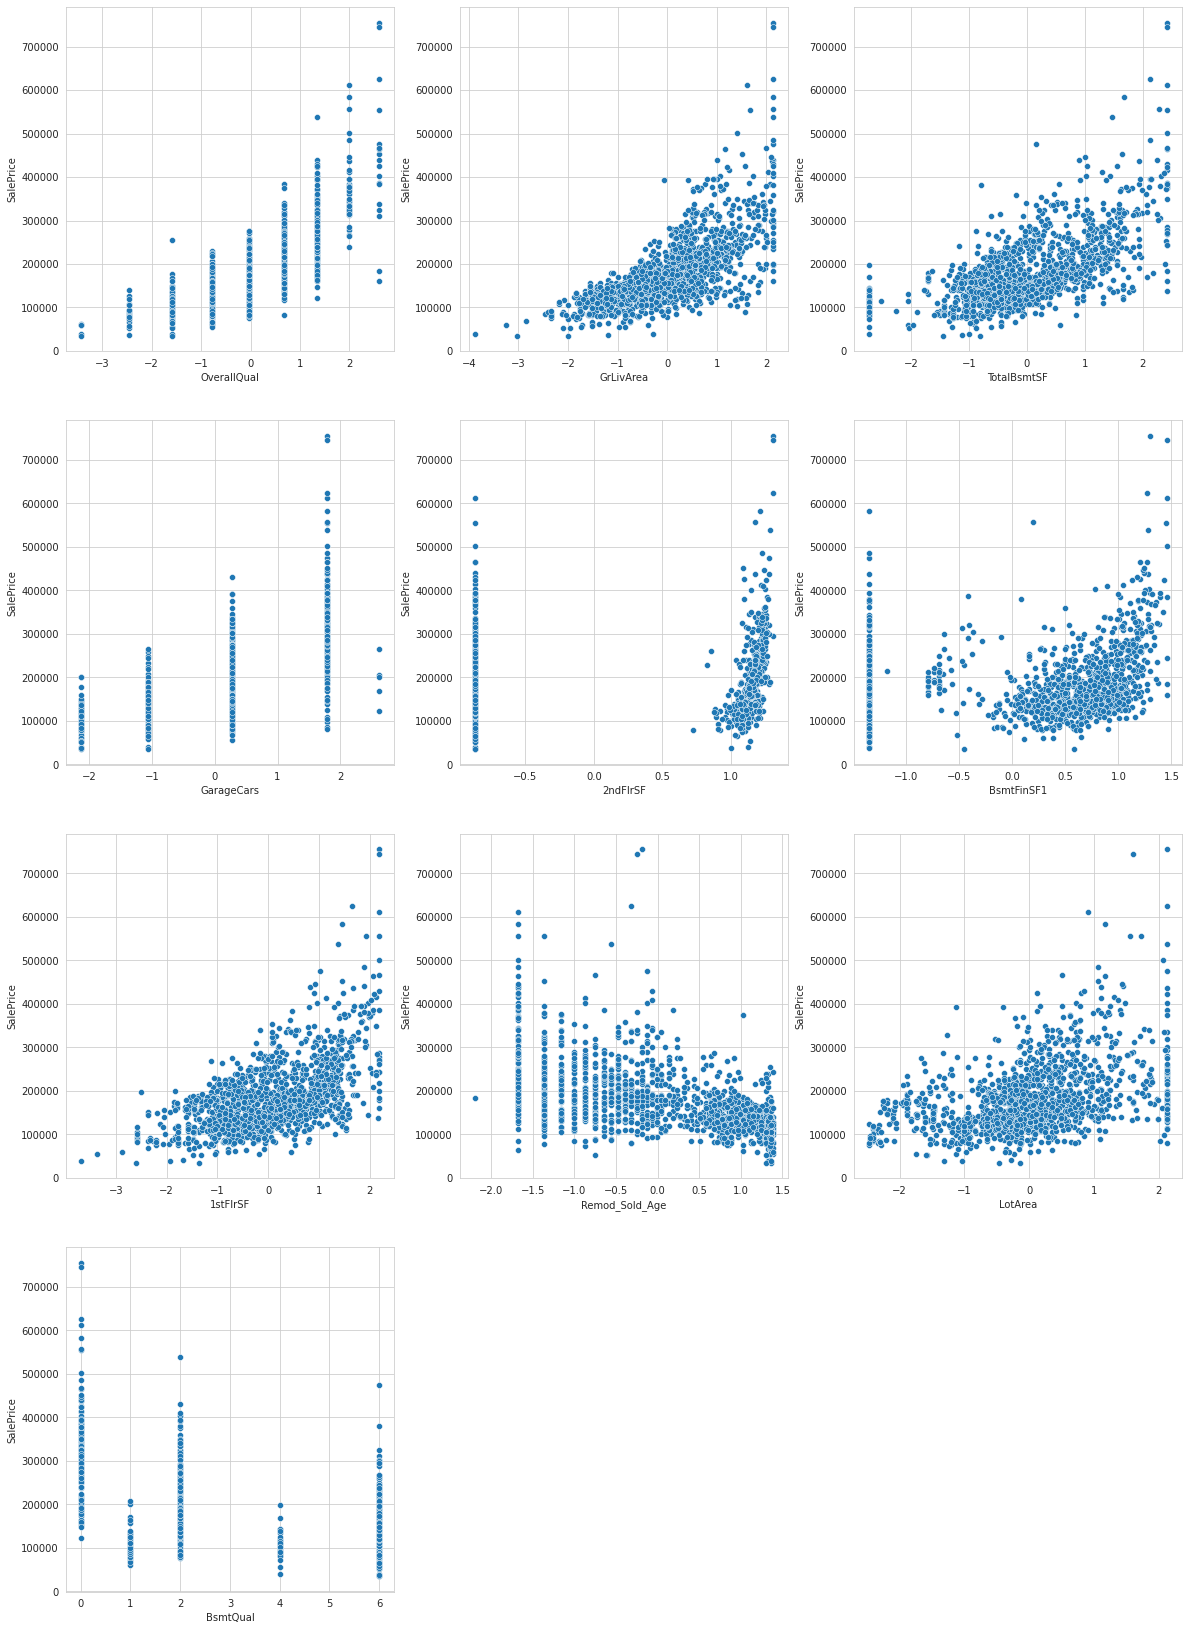

In [83]:
#  Scatterplot for numerical features

plt.figure(figsize=(20,90))
for i in range(len(cols)):
    plt.subplot(12, 3, i+1)
    sns.scatterplot(x=enc_df[cols[i]], y=target)

plt.show()

# STORY TELLING FROM THE ABOVE PLOTS

* Houses with a good overall condition, with a greater living room which is above ground along with a greater basement area are expensive houses. 

* People are preferring those houses that has furnished basement with a greater area with a garage having capacity of storing more cars.

* It seems that most of the people prefer to buy two story houses, with greater floor area. 

* Big houses or a mansions with a greater area are even more expensive.

* It seems that people are preferring the houses that has been recently remodeled or reconstructed.

***************
## MORAL OF THE STORY

* Buy a **big 2-floored** house with a **good overall condition**, with a **greater furnished basement area** along with a **wide garage** and which has been remodelled recently.